In [1]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
import progressbar
import dill as pickle
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging
from adjustText import adjust_text
sys.path = ["../"] + sys.path

print(sys.path)

%autoreload 2
from pIMZ.regions import SpectraRegion, ProteinWeights
%autoreload 2
from pIMZ.imzml import IMZMLExtract
%autoreload 2
from pIMZ.comparative import CombinedSpectra

import pIMZ

print(pIMZ.__file__)



['../', '/mnt/f/dev/git/pyIMS/examples', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/mjoppich/.local/lib/python3.8/site-packages', '/home/mjoppich/.local/lib/python3.8/site-packages/pIMZ-1.0-py3.8-linux-x86_64.egg', '/home/mjoppich/.local/lib/python3.8/site-packages/progressbar-2.5-py3.8.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/mpld3-0.3.1.dev1-py3.8.egg', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython']
../pIMZ/__init__.py


Load an imzML file

In [4]:
imze = IMZMLExtract("/mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML")

Opening regions file for /mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML
0 356 400 215 273
1 436 478 632 687
2 1572 1612 608 666
3 1149 1197 142 205
4 618 666 211 266
5 633 684 630 688
6 1357 1400 628 686


Explore which regions are there?

0 ((356, 400, 215, 273), 2655)
1 ((436, 478, 632, 687), 2408)
2 ((1572, 1612, 608, 666), 2419)
3 ((1149, 1197, 142, 205), 3136)
4 ((618, 666, 211, 266), 2744)
5 ((633, 684, 630, 688), 3068)
6 ((1357, 1400, 628, 686), 2596)


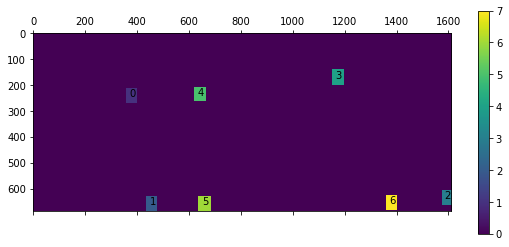

In [5]:
_ = imze.list_regions()

In [6]:
min(imze.mzValues),max(imze.mzValues)

(2997.607047277772, 30009.582432568535)

Start with prozessing the first region , region 0

In [5]:
spectra0_orig = imze.get_region_array(0, makeNullLine=True)
spectra0_intra = imze.normalize_region_array(spectra0_orig, normalize="intra_median")
spectra0 = imze.normalize_region_array(spectra0_intra, normalize="inter_median")

Fetching region range
Fetching region shape
Found region 0 with shape (45, 59, 17900)
Fetching region spectra
100% |########################################################################|
100% |########################################################################|
Started Log Value: 0.14000733569264412
100% |########################################################################|
Got 2655 median-enabled pixels
5-Number stats for medians: (2655, 2655, 0.2905536462232088, 0.5712127712945096, 0.6654297160132764, 0.7571640240536153, 1.119313296797138)
Started Log Value: 0.21725614592432976
100% |########################################################################|
Got a total of 47524500 fold changes
Median elements [23762250]
Median elements
Global Median 0.64579


In [6]:
spectra1_orig = imze.get_region_array(1, makeNullLine=True)
spectra1_intra = imze.normalize_region_array(spectra1_orig, normalize="intra_median")
spectra1 = imze.normalize_region_array(spectra1_intra, normalize="inter_median")

Fetching region range
Fetching region shape
Found region 1 with shape (43, 56, 17900)
Fetching region spectra
100% |########################################################################|
100% |########################################################################|
Started Log Value: 0.17063884288072587
100% |########################################################################|
Got 2408 median-enabled pixels
5-Number stats for medians: (2408, 2408, 0.3039763115205163, 0.5889737648019792, 0.6580512343895084, 0.7246390240951075, 1.0161616910876121)
Started Log Value: 0.2648863598704338
100% |########################################################################|
Got a total of 43103200 fold changes
Median elements [21551600]
Median elements
Global Median 0.64556


Started Log Value: 0.14000733569264412
Pixel (5, 30): (17900, 17378, 0.0, 0.3000152855836411, 0.5135824924264395, 0.7344595654119753, 2.2611690493488)
Pixel (10, 30): (17900, 17415, 0.0, 0.39868049486880436, 0.6664889512482384, 0.9484701114184119, 3.3750518583494378)
Pixel (20, 30): (17900, 17383, 0.0, 0.30503601128090446, 0.5314185949485604, 0.7923220497239329, 6.235906349286949)
Pixel (25, 30): (17900, 17428, 0.0, 0.3950999459189633, 0.6885953705312867, 1.0240869960679142, 9.995899992013957)
Pixel (35, 30): (17900, 17418, 0.0, 0.4646819976734369, 0.7766157701380663, 1.1079077863432891, 3.830067904466957)
Pixel (40, 30): (17900, 17481, 0.0, 0.46623002417433723, 0.7784697915953906, 1.1195665739896818, 2.987418624579341)


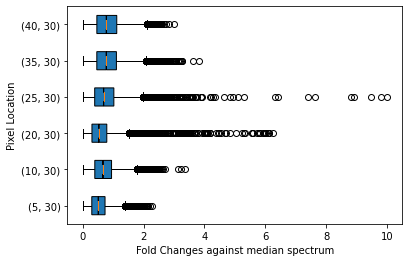

In [7]:
imze.plot_fcs(spectra0_orig, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.21725614592432976
Pixel (5, 30): (17900, 17378, 0.0, 0.37675724844892067, 0.6453180876809363, 0.9261143633247905, 2.831509828912601)
Pixel (10, 30): (17900, 17415, 0.0, 0.3856033876806081, 0.6457432895466224, 0.9189111654645739, 3.336080855033527)
Pixel (20, 30): (17900, 17383, 0.0, 0.3701320966161331, 0.6460637676616463, 0.9644029829947063, 7.795461219782701)
Pixel (25, 30): (17900, 17428, 0.0, 0.37031708224993964, 0.6447782875497908, 0.9626202807074953, 9.664760037736253)
Pixel (35, 30): (17900, 17418, 0.0, 0.38559963415332804, 0.6451473899885882, 0.9213887462593586, 3.263557276825085)
Pixel (40, 30): (17900, 17481, 0.0, 0.3861231456557213, 0.6451822294317222, 0.9298251075901888, 2.45048607225067)


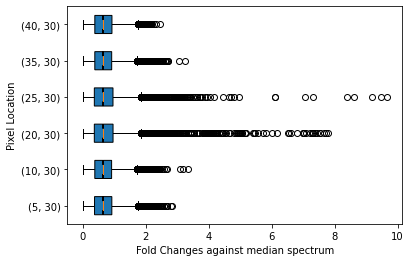

In [8]:
imze.plot_fcs(spectra0_intra, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.3364191856862599
Pixel (5, 30): (17900, 17378, 0.0, 0.37675724844892067, 0.6453180876809363, 0.9261143633247904, 2.831509828912601)
Pixel (10, 30): (17900, 17415, 0.0, 0.38560338768060815, 0.6457432895466224, 0.9189111654645739, 3.336080855033527)
Pixel (20, 30): (17900, 17383, 0.0, 0.3701320966161331, 0.6460637676616463, 0.9644029829947063, 7.795461219782701)
Pixel (25, 30): (17900, 17428, 0.0, 0.37031708224993964, 0.6447782875497907, 0.9626202807074953, 9.664760037736254)
Pixel (35, 30): (17900, 17418, 0.0, 0.385599634153328, 0.6451473899885881, 0.9213887462593586, 3.263557276825085)
Pixel (40, 30): (17900, 17481, 0.0, 0.38612314565572137, 0.6451822294317222, 0.9298251075901889, 2.45048607225067)


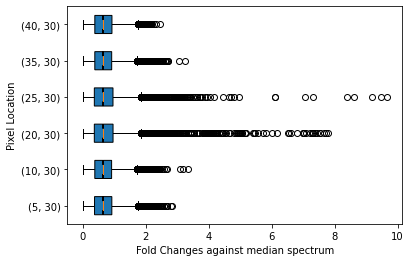

In [9]:
imze.plot_fcs(spectra0, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.17063884288072587
Pixel (5, 30): (17900, 17392, 0.0, 0.28143266150713453, 0.46666477704943293, 0.671020570198586, 3.0481045450800455)
Pixel (10, 30): (17900, 17440, 0.0, 0.42338556277023276, 0.7149961931907834, 1.0190457174065637, 2.8927352113010523)
Pixel (20, 30): (17900, 17405, 0.0, 0.31021863347897666, 0.5293111750469717, 0.7750455076113096, 7.9786457932683135)
Pixel (25, 30): (17900, 17430, 0.0, 0.3844426277731959, 0.6502268785645964, 0.9530765679916557, 4.5151675253395345)
Pixel (35, 30): (17900, 17421, 0.0, 0.332916761761625, 0.5561829978292923, 0.7813345322713304, 2.646756292530384)
Pixel (40, 30): (17900, 17426, 0.0, 0.4260299237761488, 0.7368415904314141, 1.071674533592446, 3.213438587303454)


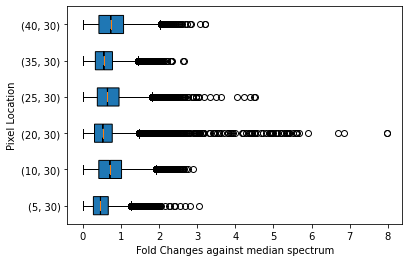

In [10]:
imze.plot_fcs(spectra1_orig, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.2648863598704338
Pixel (5, 30): (17900, 17392, 0.0, 0.3892705359761788, 0.6467499934087995, 0.9269501125579998, 4.222170019528735)
Pixel (10, 30): (17900, 17440, 0.0, 0.38157493567832057, 0.6449443638642706, 0.9198495374666621, 2.6203658737841895)
Pixel (20, 30): (17900, 17405, 0.0, 0.37842562592529916, 0.6454877237708321, 0.9478771701190776, 9.734213650794924)
Pixel (25, 30): (17900, 17430, 0.0, 0.38097820053501863, 0.6443538964010982, 0.947805845389959, 4.487116618164834)
Pixel (35, 30): (17900, 17421, 0.0, 0.3869009187217882, 0.6461813799377314, 0.9084339047891007, 3.0700399978463206)
Pixel (40, 30): (17900, 17426, 0.0, 0.3726824206803851, 0.6454569260193321, 0.93867117495063, 2.851782815704191)


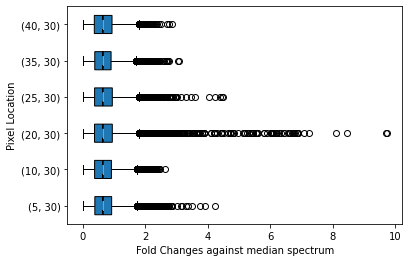

In [11]:
imze.plot_fcs(spectra1_intra, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.4103202798662151
Pixel (5, 30): (17900, 17392, 0.0, 0.3892705359761787, 0.6467499934087995, 0.9269501125579998, 4.222170019528736)
Pixel (10, 30): (17900, 17440, 0.0, 0.38157493567832057, 0.6449443638642706, 0.9198495374666622, 2.6203658737841895)
Pixel (20, 30): (17900, 17405, 0.0, 0.37842562592529916, 0.6454877237708321, 0.9478771701190776, 9.734213650794924)
Pixel (25, 30): (17900, 17430, 0.0, 0.3809782005350187, 0.6443538964010982, 0.9478058453899592, 4.487116618164834)
Pixel (35, 30): (17900, 17421, 0.0, 0.3869009187217882, 0.6461813799377314, 0.9084339047891007, 3.0700399978463206)
Pixel (40, 30): (17900, 17426, 0.0, 0.3726824206803851, 0.6454569260193321, 0.93867117495063, 2.8517828157041913)


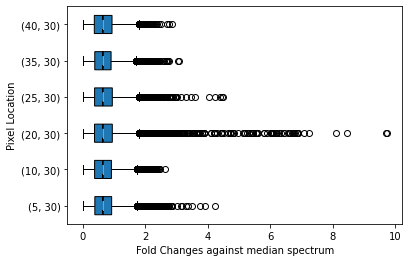

In [12]:
imze.plot_fcs(spectra1, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

We can now ensure that the normalized spectra are indeed comparable.

Where are the highest peaks? This may give a hint on whether or not a normalization by max intensity would also have worked. => here: most probably yes!

3454.87441091502 39
3456.383544128344 278
3457.8926773416683 2332
4965.516757452595 2
14980.124761072322 2
14981.633894285647 2


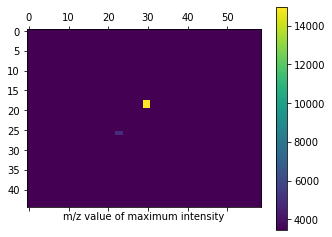

2655 45.060471276429595 282.8224196423905 133.18045036950951


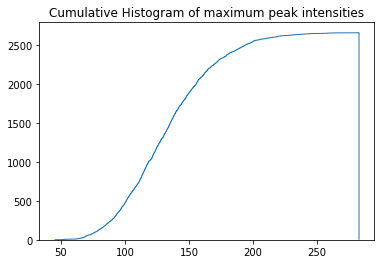

In [13]:
imze.list_highest_peaks(spectra0, counter=True)

Let's plot the norm of each spectrum

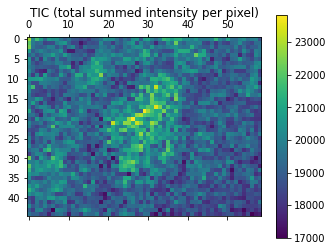

In [14]:
imze.plot_tic(spectra0)

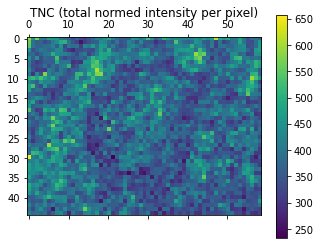

In [15]:
imze.plot_tnc(spectra0)

## Protein m/z to name

For any combination of sequencing results with these IMS analyses, knowing which protein was measured is of interest.

Using a previously performed LC-MS/MS experiment, which delivers detected proteins together with the masses, allows an easy translation of m/z values to protein name.
This work is done in the ProteinWeights object.

In [7]:
(2997.607047277772, 30009.582432568535)

(2997.607047277772, 30009.582432568535)

In [2]:
pw_theo = ProteinWeights("protein_weights.theo.tsv")

2021-04-15 11:16:20,296  ProteinWeights  INFO: Loaded a total of 21506 proteins with 36368 masses


In [3]:
pw_theo = ProteinWeights("protein_weights.theo.tsv", min_mass=2990, max_mass=30012)

2021-04-15 11:19:39,794  ProteinWeights  INFO: Loaded a total of 7280 proteins with 10181 masses
2021-04-15 11:19:39,794  ProteinWeights  INFO: Loaded a total of 7280 proteins with 10181 masses


In [4]:
pw_theo.print_collisions(print_proteins=False)

2021-04-15 11:19:46,922  ProteinWeights  INFO:          Number of total protein/genes: 7280
2021-04-15 11:19:46,922  ProteinWeights  INFO:          Number of total protein/genes: 7280
2021-04-15 11:19:46,923  ProteinWeights  INFO:            Number of total masses: 10181
2021-04-15 11:19:46,923  ProteinWeights  INFO:            Number of total masses: 10181
2021-04-15 11:19:46,925  ProteinWeights  INFO: Number of proteins/genes with collision: 6316
2021-04-15 11:19:46,925  ProteinWeights  INFO: Number of proteins/genes with collision: 6316
2021-04-15 11:19:46,930  ProteinWeights  INFO:         Mean Number of collisions: 2.8738125395820138
2021-04-15 11:19:46,930  ProteinWeights  INFO:         Mean Number of collisions: 2.8738125395820138
2021-04-15 11:19:46,938  ProteinWeights  INFO:       Median Number of collisions: 2.0
2021-04-15 11:19:46,938  ProteinWeights  INFO:       Median Number of collisions: 2.0
2021-04-15 11:19:46,942  ProteinWeights  INFO: Proteins/genes with collision: [(

In [5]:
pw_theo.print_collisions(maxdist=1.0, print_proteins=False)

2021-04-15 11:20:56,230  ProteinWeights  INFO:          Number of total protein/genes: 7280
2021-04-15 11:20:56,230  ProteinWeights  INFO:          Number of total protein/genes: 7280
2021-04-15 11:20:56,232  ProteinWeights  INFO:            Number of total masses: 10181
2021-04-15 11:20:56,232  ProteinWeights  INFO:            Number of total masses: 10181
2021-04-15 11:20:56,234  ProteinWeights  INFO: Number of proteins/genes with collision: 4881
2021-04-15 11:20:56,234  ProteinWeights  INFO: Number of proteins/genes with collision: 4881
2021-04-15 11:20:56,237  ProteinWeights  INFO:         Mean Number of collisions: 1.9096496619545176
2021-04-15 11:20:56,237  ProteinWeights  INFO:         Mean Number of collisions: 1.9096496619545176
2021-04-15 11:20:56,241  ProteinWeights  INFO:       Median Number of collisions: 2.0
2021-04-15 11:20:56,241  ProteinWeights  INFO:       Median Number of collisions: 2.0
2021-04-15 11:20:56,246  ProteinWeights  INFO: Proteins/genes with collision: [(

With the m/z->protein object we can now find all marker masses for the 15 detected regions

For example we can also try to find out, which protein corresponds to mass 14954 ! (it's Ifitm3 ...)

In [19]:
pw_theo.get_protein_from_mass(14954)

[('Ifitm3', 14954.185999999994), ('Tnfrsf12a', 14952.97469999999)]

It can be seen that the norm of the spectra differs. However, given that intensities should be comparable, and that there was sample everywhere => just continue

In [20]:
spec = SpectraRegion(spectra0, imze.mzValues)

In [21]:
spec.calculate_similarity(mode="spectra_log")

2021-02-17 10:55:40,443  SpectraRegion  INFO: dimensions inputarray: 17900
2021-02-17 10:55:40,444  SpectraRegion  INFO: Creating C++ obj
2021-02-17 10:55:40,444  SpectraRegion  INFO: 17900 (45, 59, 17900)
2021-02-17 10:55:40,445  SpectraRegion  INFO: dimensions 17900
2021-02-17 10:55:40,445  SpectraRegion  INFO: input dimensions (45, 59, 17900)
2021-02-17 10:55:40,446  SpectraRegion  INFO: Switching to dot mode
2021-02-17 10:55:40,504  SpectraRegion  INFO: Starting calc similarity c++
2021-02-17 10:55:49,133  SpectraRegion  INFO: outclust dimensions (2655, 2655)
2021-02-17 10:55:49,134  SpectraRegion  INFO: Calculating spectra similarity
2021-02-17 10:55:49,268  SpectraRegion  INFO: Calculating spectra similarity done


array([[1.        , 0.97618073, 0.9691782 , ..., 0.83840245, 0.8406169 ,
        0.85142994],
       [0.97618073, 1.        , 0.98342717, ..., 0.88986284, 0.8919327 ,
        0.90145195],
       [0.9691782 , 0.98342717, 1.        , ..., 0.90628433, 0.9039524 ,
        0.91665334],
       ...,
       [0.83840245, 0.88986284, 0.90628433, ..., 1.        , 0.9589327 ,
        0.96420807],
       [0.8406169 , 0.8919327 , 0.9039524 , ..., 0.9589327 , 1.        ,
        0.9649949 ],
       [0.85142994, 0.90145195, 0.91665334, ..., 0.96420807, 0.9649949 ,
        1.        ]], dtype=float32)

There are various (unsupervised) clustering techniques. Like UMAP+HDBSCAN

In [22]:
spec.segment(method="UMAP_DBSCAN", number_of_regions=15, min_cluster_size=9, num_samples=3000)

2021-02-17 10:55:49,294  SpectraRegion  INFO: Calculating clusters
2021-02-17 10:55:49,294  SpectraRegion  INFO: Elem Matrix of shape: (2655, 17900)
2021-02-17 10:55:49,351  SpectraRegion  INFO: UMAP reduction
2021-02-17 10:56:15,179  SpectraRegion  INFO: HDBSCAN reduction
2021-02-17 10:56:15,180  SpectraRegion  INFO: HDBSCAN reduction num_samples reset: 2655
2021-02-17 10:56:15,181  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (2655, 2)
2021-02-17 10:56:15,247  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (2655, 2)
2021-02-17 10:56:15,795  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (2655, 61)
2021-02-17 10:56:15,796  SpectraRegion  INFO: HDBSCAN Soft Clusters: (2655, 61)
2021-02-17 10:56:15,797  SpectraRegion  INFO: HDBSCAN Labeling
2021-02-17 10:56:15,802  SpectraRegion  INFO: Cluster Reduction for UMAP Result
2021-02-17 10:56:15,803  SpectraRegion  INFO: Cluster Reduction
2021-02-17 10:56:15,804  SpectraRegion  INFO: Calculating consensus spectra
202

[[5.85606206e-07 9.99924275e-01 4.37104184e-06 ... 1.03181175e-06
  1.29626118e-06 1.23519055e-06]
 [0.00000000e+00 9.99999999e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.37366894e-04 9.87866827e-02 4.98646733e-02 ... 1.65624380e-03
  2.09303585e-03 1.98502156e-03]
 ...
 [9.55220116e-06 2.42800641e-03 2.53236324e-03 ... 5.51570348e-03
  5.52172109e-03 6.87937464e-03]
 [5.77288622e-48 1.96255999e-46 2.04495422e-46 ... 1.20086369e-02
  1.17557667e-02 1.48347541e-02]
 [4.94866225e-25 1.74983859e-23 1.83504530e-23 ... 1.21711041e-02
  1.23605638e-02 1.55668363e-02]]


2021-02-17 10:56:21,703  SpectraRegion  INFO: Calculating clusters done
2021-02-17 10:56:21,728  SpectraRegion  INFO: Calculating clusters saved


array([[8, 8, 8, ..., 4, 4, 4],
       [8, 5, 5, ..., 3, 4, 7],
       [8, 5, 4, ..., 1, 4, 7],
       ...,
       [8, 5, 4, ..., 7, 7, 4],
       [8, 5, 4, ..., 7, 7, 4],
       [5, 4, 4, ..., 4, 4, 4]], dtype=int16)

In [23]:
spec.redo_hdbscan_on_dimred(number_of_regions=15, min_cluster_size=10, num_samples=3000)

2021-02-17 10:56:21,768  SpectraRegion  INFO: HDBSCAN reduction
2021-02-17 10:56:21,769  SpectraRegion  INFO: HDBSCAN reduction num_samples reset: 2655
2021-02-17 10:56:21,771  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (2655, 2)
2021-02-17 10:56:21,833  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (2655, 2)
2021-02-17 10:56:22,269  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (2655, 50)
2021-02-17 10:56:22,270  SpectraRegion  INFO: HDBSCAN Soft Clusters: (2655, 50)
2021-02-17 10:56:22,271  SpectraRegion  INFO: HDBSCAN Labeling
2021-02-17 10:56:22,276  SpectraRegion  INFO: Cluster Reduction for UMAP Result
2021-02-17 10:56:22,276  SpectraRegion  INFO: Cluster Reduction
2021-02-17 10:56:22,277  SpectraRegion  INFO: Calculating consensus spectra
2021-02-17 10:56:22,310  SpectraRegion  INFO: Setting consensus spectra
2021-02-17 10:56:22,311  SpectraRegion  INFO: Calculating consensus spectra done


[[0.00000000e+00 9.99999999e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.99999999e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.17912603e-20 1.29405079e-01 6.29230346e-02 ... 2.47537269e-18
  2.27006344e-18 2.30304051e-18]
 ...
 [7.50599952e-15 5.04267629e-03 5.26777019e-03 ... 8.54075291e-03
  6.89065783e-03 7.49039323e-03]
 [1.85563272e-34 3.37967464e-33 3.52674252e-33 ... 1.84237770e-02
  1.50403268e-02 1.62562243e-02]
 [1.17011459e-21 2.21670749e-20 2.32822161e-20 ... 1.95685748e-02
  1.53728426e-02 1.68698424e-02]]


In [24]:
len(spec.dimred_labels)

2655

2021-02-17 10:56:22,452  SpectraRegion  INFO: Pixels    : 2655
2021-02-17 10:56:22,453  SpectraRegion  INFO: Unassigned: 0


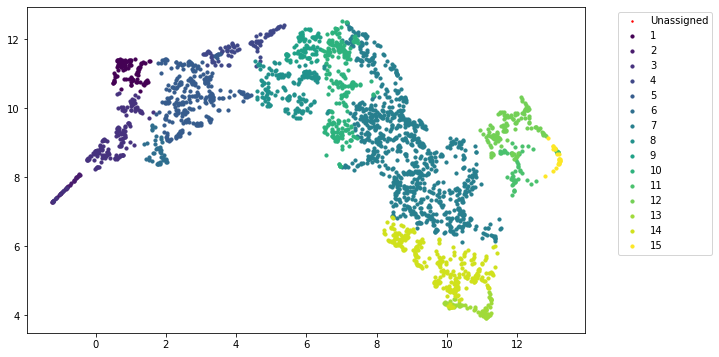

In [25]:
mpl.rcParams['figure.figsize'] = (10,6)
spec.vis_umap(legend=True)
mpl.rcParams['figure.figsize'] = (6,4)

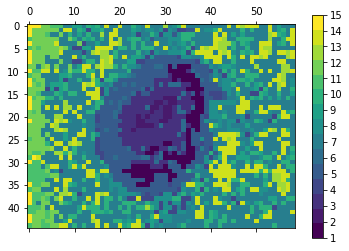

In [26]:
spec.plot_segments()

In [27]:
spec.filter_clusters(method='merge_background', bg_x=5, bg_y=5)
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='remove_islands')

2021-02-17 10:56:22,925  SpectraRegion  INFO: Assigning clusters to background: {4, 7, 9, 10, 11, 12, 14, 15}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

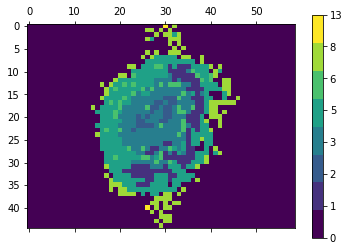

In [28]:
spec.plot_segments()

In [29]:
spec.set_background(8)

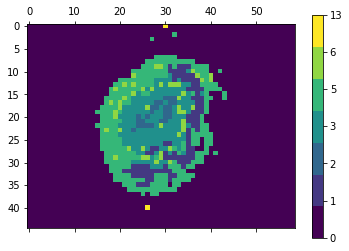

In [30]:
spec.plot_segments()

2021-02-17 10:56:23,211  SpectraRegion  INFO: Pixels    : 2655
2021-02-17 10:56:23,212  SpectraRegion  INFO: Unassigned: 0


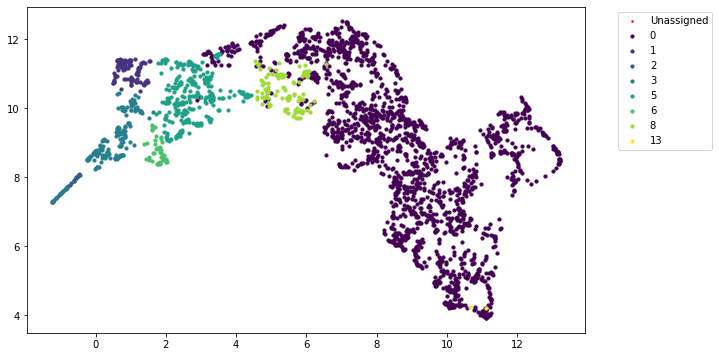

In [31]:
mpl.rcParams['figure.figsize'] = (10,6)
spec.vis_umap(legend=True)
mpl.rcParams['figure.figsize'] = (6,4)

Which may or may not work well - more robustly, and maybe faster is a classic clustering of the similarity scores:

In [32]:
spec.segment(method="WARD", number_of_regions=15)

2021-02-17 10:56:23,361  SpectraRegion  INFO: Calculating clusters
2021-02-17 10:56:23,493  SpectraRegion  INFO: Calculating clusters done
2021-02-17 10:56:23,510  SpectraRegion  INFO: Calculating clusters saved


array([[6, 6, 6, ..., 2, 2, 4],
       [6, 6, 7, ..., 2, 4, 4],
       [6, 6, 7, ..., 1, 4, 4],
       ...,
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 7, ..., 4, 4, 4]], dtype=int16)

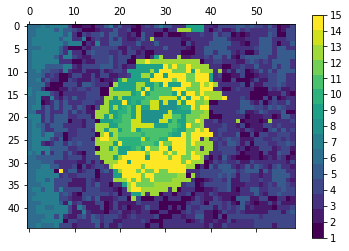

In [33]:
spec.plot_segments()

In [34]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')
spec.filter_clusters(method='remove_islands')

2021-02-17 10:56:23,664  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 5, 6, 7}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

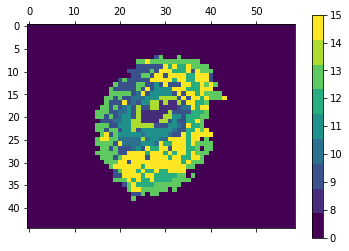

In [35]:
spec.plot_segments()

A manual curation of the segmentation is still possible!

In [36]:
spec.segmented[0:6,] = 0

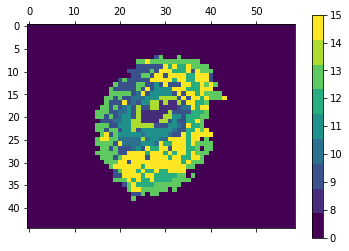

In [37]:
spec.plot_segments()

In [38]:
#with open("slided_0.spectra.npy", 'wb') as f:
#    np.save(f, spectra0)
    
#with open("slided_0.mzval.npy", 'wb') as f:
#    np.save(f, imze.mzValues)
    
#with open("slided_0.segments.npy", 'wb') as f:
#    np.save(f, spec.segmented)

In [39]:
#with open('slided_0.spectra.npy', 'rb') as f:
#    spectra0 = np.load(f)
    
#with open('slided_0.mzval.npy', 'rb') as f:
#    mzValues = np.load(f)
    
#with open('slided_0.segments.npy', 'rb') as f:
#    segmented = np.load(f)

Consensus Analysis

In [40]:
spec.consensus_spectra()

2021-02-17 10:56:23,998  SpectraRegion  INFO: Calculating consensus spectra
2021-02-17 10:56:24,030  SpectraRegion  INFO: Setting consensus spectra
2021-02-17 10:56:24,031  SpectraRegion  INFO: Calculating consensus spectra done


{0: array([0.67580456, 0.67580456, 0.67580456, ..., 0.28381686, 0.28381686,
        0.28381686]),
 9: array([0.65775871, 0.65775871, 0.65775871, ..., 0.3040875 , 0.3040875 ,
        0.3040875 ]),
 13: array([0.57613317, 0.57613317, 0.57613317, ..., 0.32186837, 0.32186837,
        0.32186837]),
 15: array([0.59695091, 0.59695091, 0.59695091, ..., 0.31012577, 0.31012577,
        0.31012577]),
 12: array([0.75340538, 0.75340538, 0.75340538, ..., 0.28799026, 0.28799026,
        0.28799026]),
 11: array([1.03077652, 1.03077652, 1.03077652, ..., 0.27485947, 0.27485947,
        0.27485947]),
 10: array([0.64412435, 0.64412435, 0.64412435, ..., 0.26182433, 0.26182433,
        0.26182433]),
 14: array([0.79604846, 0.79604846, 0.79604846, ..., 0.22558753, 0.22558753,
        0.22558753]),
 8: array([0.92792216, 0.92792216, 0.92792216, ..., 0.25138255, 0.25138255,
        0.25138255])}

In [41]:
spec.consensus_similarity()

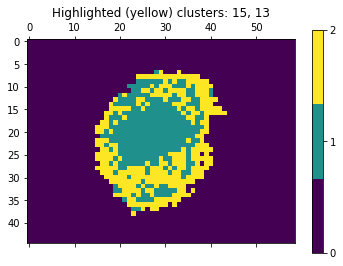

In [42]:
spec.plot_segments(highlight=[15,13])

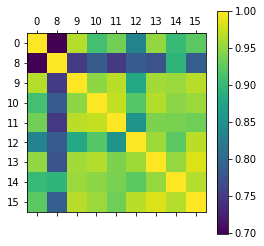

In [43]:
spec.plot_consensus_similarity()

2021-02-17 10:56:24,389  SpectraRegion  INFO: Found clusterLabels [0, 8, 9, 10, 11, 12, 13, 14, 15]
2021-02-17 10:56:24,390  SpectraRegion  INFO: Processing clusterLabel 0
2021-02-17 10:56:24,948  SpectraRegion  INFO: Processing clusterLabel 8
2021-02-17 10:56:24,949  SpectraRegion  INFO: Processing clusterLabel 9
2021-02-17 10:56:24,951  SpectraRegion  INFO: Processing clusterLabel 10
2021-02-17 10:56:24,952  SpectraRegion  INFO: Processing clusterLabel 11
2021-02-17 10:56:24,953  SpectraRegion  INFO: Processing clusterLabel 12
2021-02-17 10:56:24,954  SpectraRegion  INFO: Processing clusterLabel 13
2021-02-17 10:56:24,957  SpectraRegion  INFO: Processing clusterLabel 14
2021-02-17 10:56:24,958  SpectraRegion  INFO: Processing clusterLabel 15


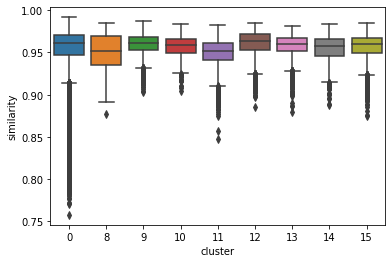

In [44]:
spec.plot_consensus_similarity(mode="spectra")

All clusters hare a 95% similarity in median. Cluster 0 (background) is the most heterogeneous one.

In [45]:
#spec.plot_inter_consensus_similarity()

2021-02-17 10:56:26,113  SpectraRegion  INFO: Processing Mass 12478 with best existing mass 12477.981893380715


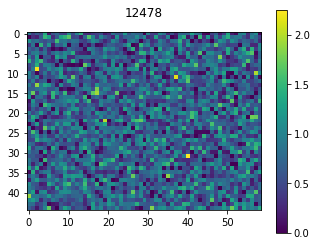

array([[0.89098611, 0.42600214, 0.63789896, ..., 0.84346678, 1.08623662,
        0.03814456],
       [0.        , 0.30615459, 0.20707593, ..., 0.98815546, 0.76648459,
        0.39656919],
       [1.14467647, 0.76193964, 0.86135823, ..., 0.49728898, 0.78187405,
        0.28662613],
       ...,
       [1.08764609, 1.26740949, 0.95459563, ..., 1.08937334, 0.59542704,
        0.6711442 ],
       [0.82855809, 0.81543693, 0.37041644, ..., 1.1150713 , 0.0438142 ,
        0.63432558],
       [0.68790783, 0.48452746, 0.14090304, ..., 1.03100806, 0.84850002,
        1.37623054]])

In [46]:
spec.mass_heatmap(12478)


2021-02-17 10:56:26,242  SpectraRegion  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


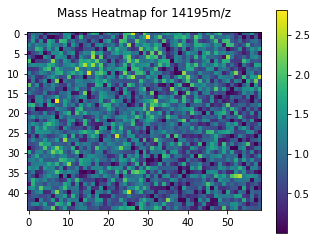

2021-02-17 10:56:26,357  SpectraRegion  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


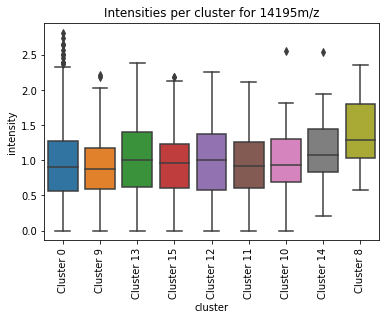

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


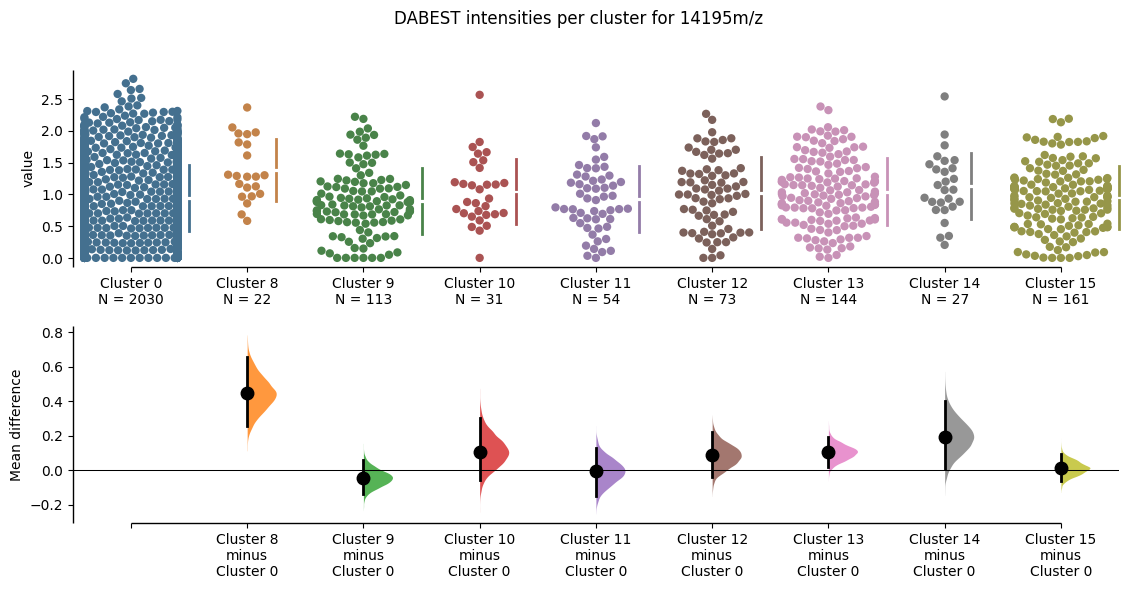

In [47]:
spec.mass_heatmap(14195, min_cut_off=0.0025, title="Mass Heatmap for {mz}m/z")
dfobj = spec.mass_dabest(14195)

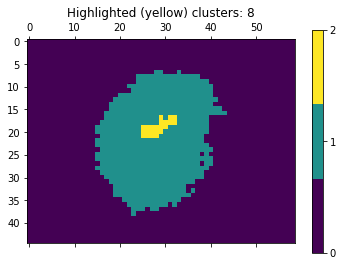

In [48]:
spec.plot_segments(highlight=[8])

15271.877899999985 [('Il11', 15271.877899999985)]


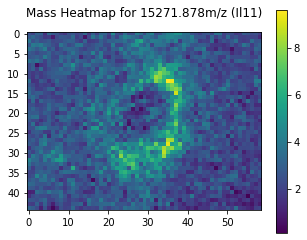

14107.345999999974 [('Il13', 14107.345999999974), ('Tnfrsf18', 14106.149199999985)]


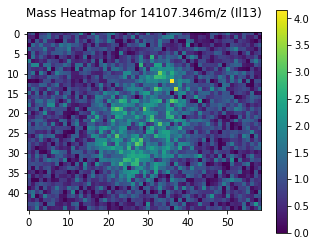

10167.716399999996 [('Ccl4', 10167.716399999996), ('Rad54b', 10169.499699999991)]


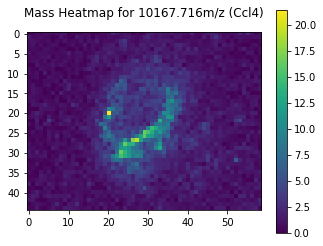

10254.250199999993 [('Cxcl1', 10254.250199999993)]


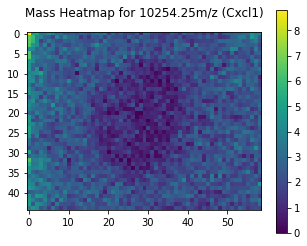

21899.871200000005 [('Il18bp', 21899.871200000005), ('Psmb1', 21900.825699999972)]


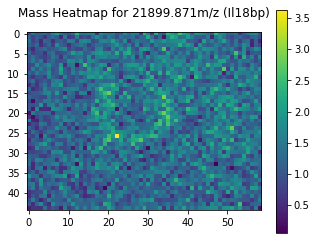

11199.70799999999 [('Il31', 11199.70799999999), ('Ss18l2', 11201.606299999994)]


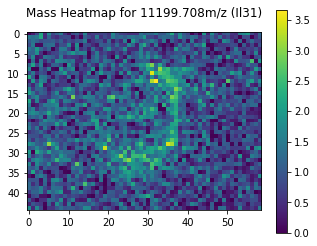

18119.635499999997 [('Il31', 18119.635499999997), ('Tpo', 18119.2567)]


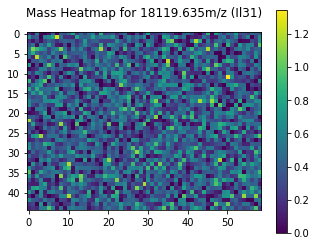

In [49]:
for y in pw_theo.protein2mass:
    
    if not y in ["Il11","Il13","Ccl4","Cxcl1","Il18bp","Il31"]:
        continue
    
    for x in pw_theo.get_masses_for_protein(y):
        massprots = pw_theo.get_protein_from_mass(x)
        
        if len(massprots) <= 2:
            print(x, massprots)
            spec.mass_heatmap(x, title="Mass Heatmap for {mz}m/z ("+y+")")
            
            

# Differential Analysis

One of the stand-alone features of pyIMS is the integration with differential expression analysis. Here several key-features are presented.

First, single masses are looked at:

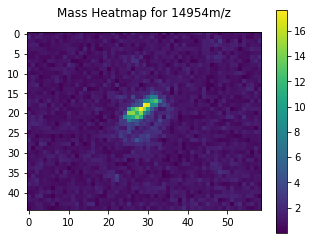

array([[0.82385149, 0.86264522, 0.49721109, ..., 0.24492729, 0.86041828,
        0.65921243],
       [1.87043287, 0.78807366, 1.3411693 , ..., 0.4120491 , 0.9107944 ,
        1.00745731],
       [0.95879405, 1.16647921, 0.54069431, ..., 0.90882606, 0.74983204,
        1.82300519],
       ...,
       [1.20795686, 0.93115886, 0.90644756, ..., 0.73014098, 1.17134226,
        1.13743474],
       [0.62210889, 0.69715361, 1.27652689, ..., 1.65667113, 0.7134432 ,
        1.15874405],
       [0.26637443, 0.77544398, 1.02433959, ..., 0.29809782, 0.75653545,
        1.09764161]])

In [50]:
spec.mass_heatmap(14954, min_cut_off=0.0025, title="Mass Heatmap for {mz}m/z")

In [51]:
pw_theo.get_protein_from_mass(14954)

[('Ifitm3', 14954.185999999994), ('Tnfrsf12a', 14952.97469999999)]

In [52]:
pw_theo.get_masses_for_protein("Ifitm3")

{14954.185999999994}

The mass with m/z-value 14954 apparently is most active within the aorta structure (center of the image). Is this specific to a specific cluster

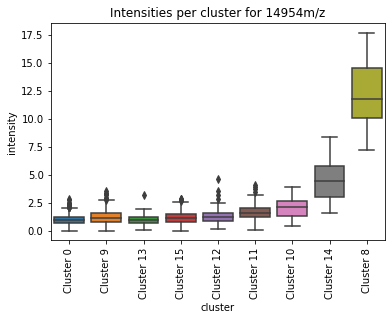

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


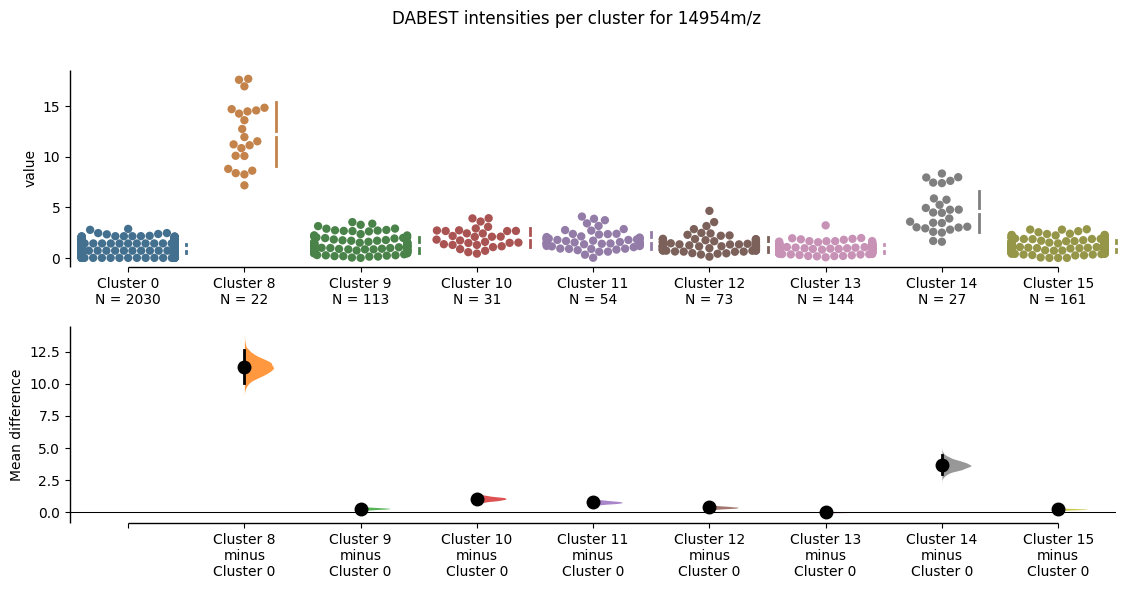

In [53]:
dfobj = spec.mass_dabest(14954)

The DABEST-Plot also clearly reveals that in contrast to the background, cluster 8 intensity values for this mass are quite higher than for all other clusters.

Abviously this mass is most intense in Cluster 8, but also cluster 14. We can now take a look at this mass by setting cluster 14 as reference cluster

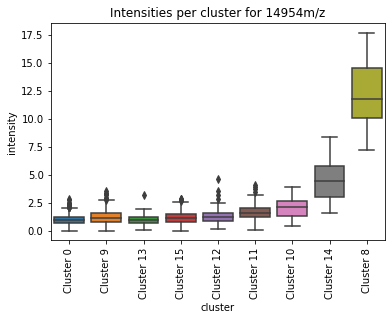

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


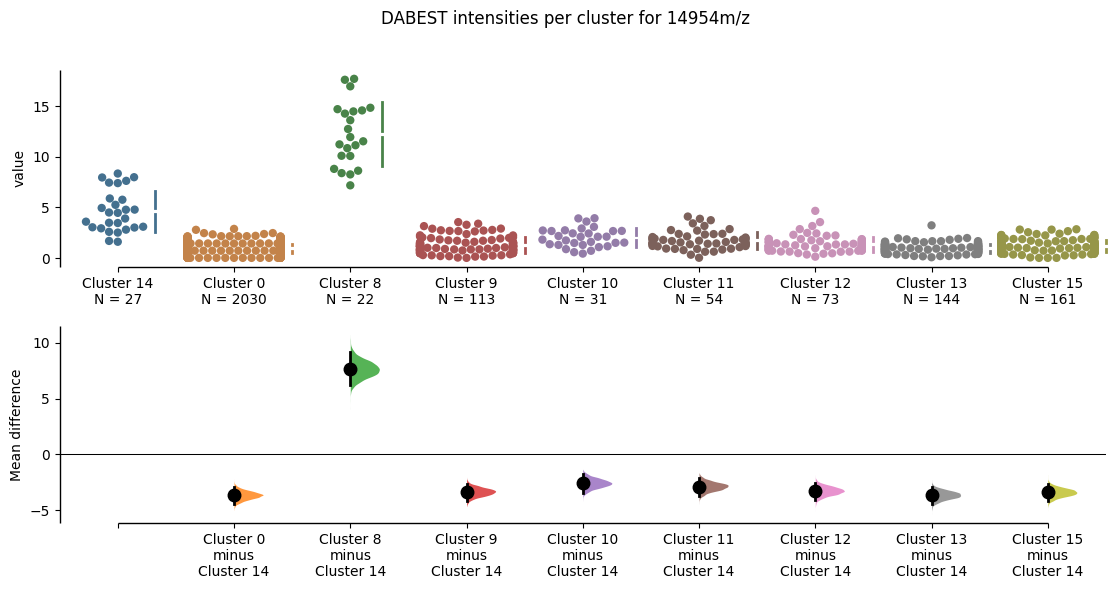

In [54]:
spec.mass_dabest(14954, background=14)

Not knowing where this cluster 8 is, we can highlight it specifically:

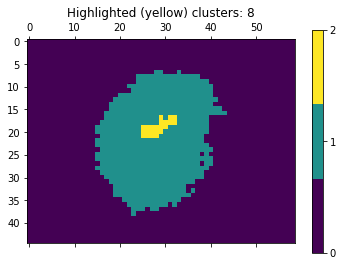

In [55]:
spec.plot_segments(highlight=8)

Or together with cluster 14, where this mass is also prevalent.

On a sidenote: background is set to 0, other regions == 1, and the target region is set to 2

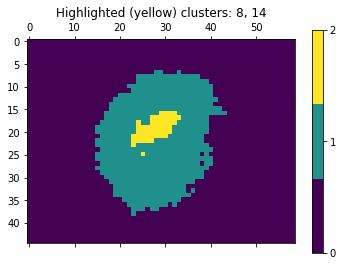

In [56]:
spec.plot_segments(highlight=[8,14])

Just for the sake of clarity: we now remove all differential expression results!

In [57]:
spec.clear_de_results()

Marker masses/proteins/genes are genes which are differentially regulated when compared to the specific cluster and all other clusters (including or excluding the background cluster).

Making the distinction regarding the background cluster might be required if the target tissue is embedded in another tissue. Excluding the background might then deliver more sensitive results.

In [58]:
mgenes = spec.find_all_markers(pw_theo, includeBackground=False, backgroundCluster=[0],
                               replaceExisting=False,
                               outdirectory="./deresults/",
                               use_methods=["ttest"]) #, "rank"

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
100% |########################################################################|
100% |########################################################################|


In [59]:
spec.list_de_results()

[('ttest', ((9,), (8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (9, 10, 11, 12, 13, 14, 15)))]

In [60]:
for x in spec.df_results_all:
    for y in spec.df_results_all[x]:
        if x != "ttest":
            continue
        
        print(x,y)
        
        spec.export_deres(x, y, "./deresults/deres.{}.{}.html".format("_".join([str(j) for j in y[0]]), "_".join([str(j) for j in y[1]])))
        

ttest ((9,), (8, 10, 11, 12, 13, 14, 15))
ttest ((13,), (8, 9, 10, 11, 12, 14, 15))
ttest ((15,), (8, 9, 10, 11, 12, 13, 14))
ttest ((12,), (8, 9, 10, 11, 13, 14, 15))
ttest ((11,), (8, 9, 10, 12, 13, 14, 15))
ttest ((10,), (8, 9, 11, 12, 13, 14, 15))
ttest ((14,), (8, 9, 10, 11, 12, 13, 15))
ttest ((8,), (9, 10, 11, 12, 13, 14, 15))


In [61]:
mgenes_bg = spec.find_all_markers(pw_theo, includeBackground=True, backgroundCluster=[0], replaceExisting=False, use_methods = ["ttest"])#, "rank"

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
100% |########################################################################|


In [62]:
def judge_de_masses(so, row):
    prot = row["gene"]
    mass = float(row["gene_mass"])
    massIdx = spec.idx_for_mass(mass)

    bgMass = spec.consensus[0][massIdx]
    allMedianMasses = [spec.consensus[x][massIdx] for x in sorted(spec.consensus)]
    allMedienPercs = sorted([abs((x/bgMass)-1.0) for x in allMedianMasses if not x == bgMass])
    
    
    if max(allMedianMasses) == bgMass and allMedienPercs[0] > 0.1: #  and 
        #print(prot, mass,bgMass, allMedienPercs[0], allMedianMasses)
        return False
    
    return True

spec.judge_de_masses( judge_de_masses )

After both find_all_markers runs we can list all DE results, which are then printed.
Each row shows one contained DE results beginning with the test performed and then a tuple of two region/cluster IDs. In the first row here:

a t-test was performed on cluster 9 versus clusters 8,10,11,12,13,14,15 .

In [63]:
spec.list_de_results()

[('ttest', ((9,), (8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (9, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((0,), (8, 9, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((9,), (0, 8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (0, 8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (0, 8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (0, 8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (0, 8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (0, 8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (0, 8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (0, 9, 10, 11, 12, 13, 14, 15)))]

It's also easy to save the result to disk:

In [64]:
markerGenes = pd.DataFrame()

for comp in spec.df_results_all["ttest"]:
    
    if 0 in comp[0] or 0 in comp[1]:
        print("skip", comp)
        continue
    
    resDF = spec.df_results_all["ttest"][comp]
    resDF = resDF.loc[resDF.de_judge == True,]
    markerGenes = pd.concat([markerGenes, resDF], sort=False)

markerGenes.to_csv("deresults/marker_genes.tsv", sep="\t", index=False)

skip ((0,), (8, 9, 10, 11, 12, 13, 14, 15))
skip ((9,), (0, 8, 10, 11, 12, 13, 14, 15))
skip ((13,), (0, 8, 9, 10, 11, 12, 14, 15))
skip ((15,), (0, 8, 9, 10, 11, 12, 13, 14))
skip ((12,), (0, 8, 9, 10, 11, 13, 14, 15))
skip ((11,), (0, 8, 9, 10, 12, 13, 14, 15))
skip ((10,), (0, 8, 9, 11, 12, 13, 14, 15))
skip ((14,), (0, 8, 9, 10, 11, 12, 13, 15))
skip ((8,), (0, 9, 10, 11, 12, 13, 14, 15))


In [65]:
markerGenes

clusterID               gene_ident     gene_mass  de_judge    gene  \
0            9   mass_3447_328744848399   3447.328745      True   Fxyd3   
1            9   mass_3448_837878061723   3448.837878      True   Fxyd3   
6            9   mass_3456_383544128344   3456.383544      True   Rpl41   
7            9  mass_3457_8926773416683   3457.892677      True   Rpl41   
8            9  mass_3536_3676044345293   3536.367604      True  Ggnbp1   
...        ...                      ...           ...       ...     ...   
3948         8   mass_29947_70797082224  29947.707971      True  Capn10   
3949         8  mass_29949_217104035568  29949.217104      True  Exosc8   
3950         8  mass_29949_217104035568  29949.217104      True  Tollip   
3951         8   mass_29950_72623724889  29950.726237      True  Exosc8   
3952         8   mass_29950_72623724889  29950.726237      True  Tollip   

      protein_mass  avg_logFC        qvalue  num  anum        mean  \
0        3450.0089   0.515087  5.697727e-14  113   113    5.209013   
1        3450.0089   0.548282  6.445610e-16  113   113    5.374649   
6        3456.3183   0.540669  4.165329e-30  113   113  131.544631   
7        3456.3183   0.513741  1.361453e-27  113   113  152.614760   
8        3538.0160   0.523572  1.479116e-13  113   113    4.065103   
...            ...        ...           ...  ...   ...         ...   
3948    29946.0126   0.759363  4.251159e-03   22    22    0.532271   
3949    29948.9162   0.692339  1.219412e-02   22    22    0.512144   
3950    29948.0327   0.692339  1.219412e-02   22    22    0.512144   
3951    29948.9162   0.638204  2.212891e-02   22    22    0.499968   
3952    29948.0327   0.638204  2.212891e-02   22    22    0.499968   

          median  num_bg  anum_bg     mean_bg   median_bg  
0       5.202022     512      512    3.645011    3.657542  
1       5.412235     512      512    3.675370    3.560427  
6     123.444582     512      512   90.430570   89.349045  
7     144.543150     512      512  106.891950  104.068272  
8       4.047986     512      512    2.827879    2.793763  
...          ...     ...      ...         ...         ...  
3948    0.524174     603      564    0.314443    0.302384  
3949    0.526945     603      568    0.316940    0.297317  
3950    0.526945     603      568    0.316940    0.297317  
3951    0.485754     603      569    0.321236    0.290991  
3952    0.485754     603      569    0.321236    0.290991  

[9721 rows x 16 columns]

In [66]:
markerGenesBG = pd.DataFrame()

for comp in spec.df_results_all["ttest"]:
    if not (0 in comp[0] or 0 in comp[1]):
        continue
    
    resDF = spec.df_results_all["ttest"][comp]
    resDF = resDF.loc[resDF.de_judge == True,]
    markerGenesBG = pd.concat([markerGenesBG, resDF], sort=False)

markerGenesBG.to_csv("deresults/marker_genes_bg.tsv", sep="\t", index=False)

In [67]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(mgenes["ttest"]["gene"]))))

Number of unique, differentially detected proteins (from masses): 1769


In [68]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(mgenes_bg["ttest"]["gene"]))))

Number of unique, differentially detected proteins (from masses): 2709


In order to save the results, the SpectraRegion object can be pickled:

In [69]:
with open("slideD_region_0.spec.pickle", "wb") as fout:
    pickle.dump(spec, fout)

# Cell-type detection

Cell-type detection requires analyseMarkers.py from https://github.com/mjoppich/scrnaseq_celltype_prediction .

One (obvious) question is: what can I do with those marker proteins? Well, a lot!

First, these are the proteins which you are interested in: these define your clusters, because they are present.

Second, these proteins give a clue about which cell types might be present, if cell-type specific genes were found.

Using the scrnaseq-celltype-prediction tool, this can be analysed! Let's download it first (requires wget, python3 and several other libraries - maybe).
Did you know? This tool achieves better predictions than SingleR :)

Because we know what kind of sample we got (aorta embedded in liver), we can specify organs to specifically check for cell types.
Organs to be considered are "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver".
This allows a context-specific evaluation!

In [70]:
! ls analyseMarkers.py

analyseMarkers.py


In [71]:
! wget https://raw.githubusercontent.com/mjoppich/scrnaseq_celltype_prediction/master/analyseMarkers.py

--2021-02-17 11:17:30--  https://raw.githubusercontent.com/mjoppich/scrnaseq_celltype_prediction/master/analyseMarkers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20292 (20K) [text/plain]
Saving to: ‘analyseMarkers.py.3’

analyseMarkers.py.3 100%[===================>]  19.82K  --.-KB/s    in 0.003s  

2021-02-17 11:17:30 (6.96 MB/s) - ‘analyseMarkers.py.3’ saved [20292/20292]



In [72]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes.tsv -n 3

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IL1RN', 'IFITM3'}	{'RGS2', 'LY6C1', 'IL1RN', 'IFITM3'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'ELK3', 'APLN', 'RBP7', 'CLIC4', 'IFI27', 'GLYCAM1'}	{'ID1', 'ELK3', 'APLN', 'LY6C1', 'RBP7', 'CLIC4', 'IFI27', 'GLYCAM1'}
8	Hepatocytes;Liver	5.704189582427714	11	13	6	8	{'MRPS18C', 'GRP', 'APOA5', 'ANG', 'OCIAD1', 'TM7SF2'}	{'MRPS18C', 'GRP', 'APOC3', 'APOA5', 'ANG', 'TTR', 'SLPI', 'SAT2', 'OCIAD1', 'TM7SF2', 'HSD11B1'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'HEBP2', 'S100A14'}
9	T me

In [73]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_bg.tsv -n 3

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 9 clusters.
Starting analysis
Loaded Databases
known genes 493
known (celltype, organ) 147
0	Mast cells;Immune system	0.28310110562942586	5	16	1	5	{'SLC31A2'}	{'FCER1A', 'RGS13', 'IL4', 'SLC31A2', 'PCP4L1'}
0	Basophils;Immune system	0.1255634596929066	5	11	1	3	{'DEFB40'}	{'FCER1A', 'IL4', 'CCL9', 'DEFB40', 'CCL4'}
0	Basal cells;Epithelium	0.07815107601329994	3	6	1	3	{'HEBP2'}	{'RAB38', 'HEBP2', 'S100A14'}
8	Macrophages;Immune system	9.998087912449986	17	19	3	3	{'TYROBP', 'CD209F', 'HILPDA'}	{'CCL6', 'CYTH4', 'HILPDA', 'RAB7B', 'H2-DMA', 'SCIMP', 'CCL5', 'CCL9', 'LGALS2', 'LY6C1', 'CD209A', 'TREML4', 'CD209F', 'TYROBP', 'RETNLA', 'NMB', 'WFDC17'}
8	Smooth muscle cells;Smooth muscle	5.5771866552352005	8	12	3	4	{'MSRB3', 'SEC24D', 'SSPN'}	

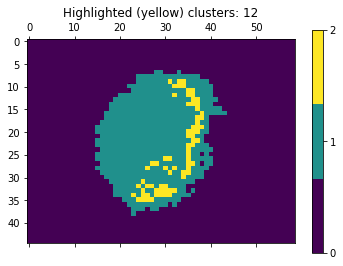

In [74]:
spec.plot_segments(highlight=[12])

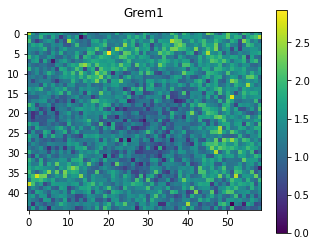

In [75]:
_ = spec.mass_heatmap("Grem1", pw=pw_theo)

This is quite interesting. For cluster 8 this tool predicts mainly monocytes or gamma delta t cells - cells which do not migrate into other tissues.

This makes sense, because one would expect these cell-types in the inner of the vessel.

H2AFX is known to be upregulated in lymphoblasts (check wikipedia ;) ).
Ifitm3 is highly expressed in both, Liver and Monocytes: https://www.proteinatlas.org/ENSG00000142089-IFITM3/tissue (Consensus dataset)spec.plot_segments(highlight=(10))

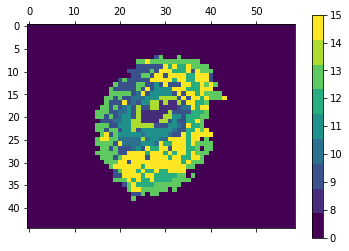

In [76]:
spec.plot_segments()

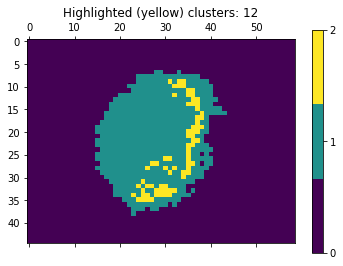

In [77]:
spec.plot_segments(highlight=(12))

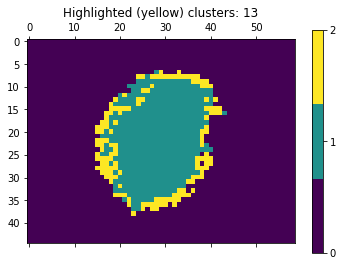

In [78]:
spec.plot_segments(highlight=(13))

In [79]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_bg.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 9 clusters.
Starting analysis
Loaded Databases
known genes 493
known (celltype, organ) 147
0	Mast cells;Immune system	0.28310110562942586	5	16	1	5	{'SLC31A2'}	{'SLC31A2', 'IL4', 'FCER1A', 'RGS13', 'PCP4L1'}
0	Basophils;Immune system	0.1255634596929066	5	11	1	3	{'DEFB40'}	{'IL4', 'DEFB40', 'CCL4', 'FCER1A', 'CCL9'}
8	Hepatocytes;Liver	20.2528741770176	13	17	8	10	{'SLBP', 'MRPS18C', 'OCIAD1', 'TM7SF2', 'APOA2', 'APOA5', 'ANG', 'GRP'}	{'SLBP', 'MRPS18C', 'TTR', 'SAT2', 'APOC3', 'OCIAD1', 'TM7SF2', 'APOA2', 'APOA5', 'SLPI', 'HSD11B1', 'ANG', 'GRP'}
8	Macrophages;Immune system	9.998087912449986	17	19	3	3	{'HILPDA', 'TYROBP', 'CD209F'}	{'HILPDA', 'LGALS2', 'WFDC17', 'CD209F', 'RETNLA', 'TYROBP', 'H2-DMA', 'CCL6', 'TREML4', 'SCIMP', 'CCL5', 'R

In this analysis, the background was kept in. More differential genes are found, but also more liver-related cell types are found.

This suggests that the analysis which includes the liver background has influenced the found differential proteins too much.

Nonetheless, the results remain consistent. For cluster 8, the missing monocytes are replaced by hepatocytes, which are monocyte-like cells residing in the liver.

Cluster 9 showing high amounds of cardiomyocytes is also not unlikely, given its location at the outer area of the aorta.

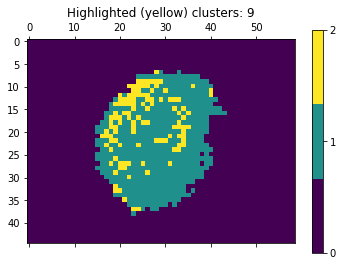

In [80]:
spec.plot_segments(highlight=(9))

Finally the SpectraRegion can also be exported to Aorta3D.

In [81]:
#spec.to_aorta3d("./slided_test/", "slided", 0, protWeights=pw, nodf=False, pathPrefix="../data/test_msi/")

In [82]:
!ls slided_test

slided.0.0.tsv	 slided.0.12.tsv  slided.0.15.tsv  slided.0.info
slided.0.10.tsv  slided.0.13.tsv  slided.0.8.tsv   slided.0.upgma.png
slided.0.11.tsv  slided.0.14.tsv  slided.0.9.tsv


# Preparations for CombinedSpectra - A comparative analysis

So far the results were only for one IMS sample.

Now the idea is to integrate multiple samples, in order to compare the different samples which were measured on the same slide.

Hence the remaining samples are processed, all in the same fashion. With the inter and intro normalization, the sample are made comparable.

In [85]:
# this uses theo!
pw = ProteinWeights("protein_weights.theo.tsv")

def judge_de_masses(spec, row):
    prot = row["gene"]
    mass = float(row["gene_mass"])
    massIdx = spec.idx_for_mass(mass)

    bgMass = spec.consensus[0][massIdx]
    allMedianMasses = [spec.consensus[x][massIdx] for x in sorted(spec.consensus)]
    allMedienPercs = sorted([abs((x/bgMass)-1.0) for x in allMedianMasses if not x == bgMass])
    
    
    if max(allMedianMasses) == bgMass and allMedienPercs[0] > 0.1: #  and 
        #print(prot, mass,bgMass, allMedienPercs[0], allMedianMasses)
        return False
    
    return True


def process_imzeregion(imze, regionID, basename):
    
    print("Processing regionID", regionID, "for basename", basename)
    
    spectra_orig = imze.get_region_array(regionID, makeNullLine=True)
    spectra_intra = imze.normalize_region_array(spectra_orig, normalize="intra_median")
    spectra = imze.normalize_region_array(spectra_intra, normalize="inter_median")
    
    rspec = SpectraRegion(spectra, imze.mzValues, name=basename + "_" + str(regionID))
    rspec.calculate_similarity(mode="spectra_log_dist")
    rspec.segment(method="WARD", number_of_regions=15)
    rspec.plot_segments()
    
    rspec.filter_clusters(method='remove_singleton')
    rspec.filter_clusters(method='merge_background')
    rspec.filter_clusters(method='remove_islands')
    rspec.filter_clusters(method='remove_islands', minIslandSize=15)
    rspec.plot_segments()
    
    rspec.consensus_spectra()
    #rspec.consensus_similarity()
    #rspec.plot_consensus_similarity()

    mgenes = rspec.find_all_markers(pw, includeBackground=False, replaceExisting=False, use_methods = ["ttest"])
    mgenes_bg = rspec.find_all_markers(pw, includeBackground=True, replaceExisting=False, use_methods = ["ttest"])
    
    rspec.judge_de_masses( judge_de_masses )

    
    markerGenes = pd.DataFrame()
    for comp in rspec.df_results_all["ttest"]:

        if 0 in comp[0] or 0 in comp[1]:
            print("skip", comp)
            continue

        resDF = rspec.df_results_all["ttest"][comp]
        resDF = resDF.loc[resDF.de_judge == True,]
        markerGenes = pd.concat([markerGenes, resDF], sort=False)
        

    markerGenesBG = pd.DataFrame()
    for comp in rspec.df_results_all["ttest"]:

        if not (0 in comp[0] or 0 in comp[1]):
            print("skip", comp)
            continue

        resDF = rspec.df_results_all["ttest"][comp]
        resDF = resDF.loc[resDF.de_judge == True,]
        markerGenesBG = pd.concat([markerGenesBG, resDF], sort=False)
    
    return rspec, markerGenes, markerGenesBG
    

First set the logging level to warn, to remove too many messages ...

In [84]:
#loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
#for logger in loggers:
#    logger.setLevel(logging.WARN)

Processing regionID 0 for basename slideD


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


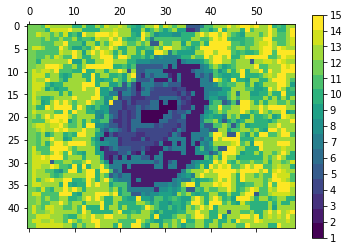

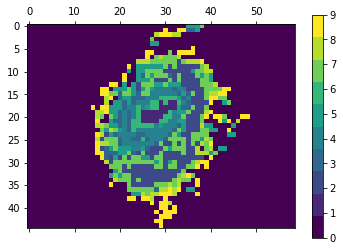

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
100% |########################################################################|


skip ((0,), (1, 2, 3, 4, 5, 6, 7, 8, 9))
skip ((5,), (0, 1, 2, 3, 4, 6, 7, 8, 9))
skip ((7,), (0, 1, 2, 3, 4, 5, 6, 8, 9))
skip ((9,), (0, 1, 2, 3, 4, 5, 6, 7, 8))
skip ((3,), (0, 1, 2, 4, 5, 6, 7, 8, 9))
skip ((8,), (0, 1, 2, 3, 4, 5, 6, 7, 9))
skip ((2,), (0, 1, 3, 4, 5, 6, 7, 8, 9))
skip ((4,), (0, 1, 2, 3, 5, 6, 7, 8, 9))
skip ((6,), (0, 1, 2, 3, 4, 5, 7, 8, 9))
skip ((1,), (0, 2, 3, 4, 5, 6, 7, 8, 9))
skip ((5,), (1, 2, 3, 4, 6, 7, 8, 9))
skip ((7,), (1, 2, 3, 4, 5, 6, 8, 9))
skip ((9,), (1, 2, 3, 4, 5, 6, 7, 8))
skip ((3,), (1, 2, 4, 5, 6, 7, 8, 9))
skip ((8,), (1, 2, 3, 4, 5, 6, 7, 9))
skip ((2,), (1, 3, 4, 5, 6, 7, 8, 9))
skip ((4,), (1, 2, 3, 5, 6, 7, 8, 9))
skip ((6,), (1, 2, 3, 4, 5, 7, 8, 9))
skip ((1,), (2, 3, 4, 5, 6, 7, 8, 9))
Processing regionID 1 for basename slideD


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


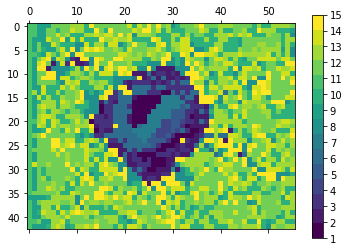

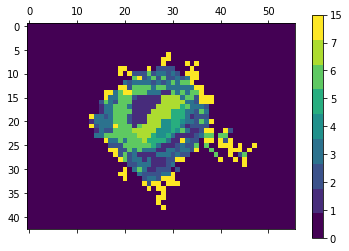

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
100% |########################################################################|
100% |########################################################################|


skip ((0,), (1, 2, 3, 4, 5, 6, 7, 15))
skip ((15,), (0, 1, 2, 3, 4, 5, 6, 7))
skip ((2,), (0, 1, 3, 4, 5, 6, 7, 15))
skip ((6,), (0, 1, 2, 3, 4, 5, 7, 15))
skip ((3,), (0, 1, 2, 4, 5, 6, 7, 15))
skip ((1,), (0, 2, 3, 4, 5, 6, 7, 15))
skip ((7,), (0, 1, 2, 3, 4, 5, 6, 15))
skip ((5,), (0, 1, 2, 3, 4, 6, 7, 15))
skip ((4,), (0, 1, 2, 3, 5, 6, 7, 15))
skip ((15,), (1, 2, 3, 4, 5, 6, 7))
skip ((2,), (1, 3, 4, 5, 6, 7, 15))
skip ((6,), (1, 2, 3, 4, 5, 7, 15))
skip ((3,), (1, 2, 4, 5, 6, 7, 15))
skip ((1,), (2, 3, 4, 5, 6, 7, 15))
skip ((7,), (1, 2, 3, 4, 5, 6, 15))
skip ((5,), (1, 2, 3, 4, 6, 7, 15))
skip ((4,), (1, 2, 3, 5, 6, 7, 15))
Processing regionID 4 for basename slideD


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


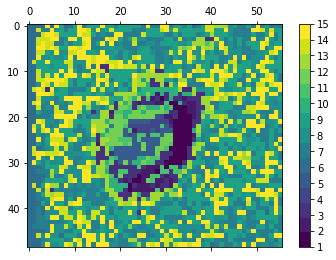

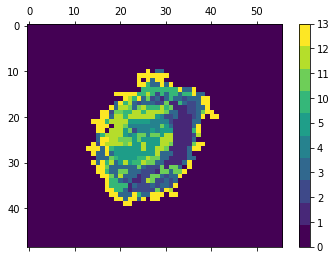

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
100% |########################################################################|


skip ((0,), (1, 2, 3, 4, 5, 10, 11, 12, 13))
skip ((13,), (0, 1, 2, 3, 4, 5, 10, 11, 12))
skip ((3,), (0, 1, 2, 4, 5, 10, 11, 12, 13))
skip ((10,), (0, 1, 2, 3, 4, 5, 11, 12, 13))
skip ((12,), (0, 1, 2, 3, 4, 5, 10, 11, 13))
skip ((2,), (0, 1, 3, 4, 5, 10, 11, 12, 13))
skip ((11,), (0, 1, 2, 3, 4, 5, 10, 12, 13))
skip ((1,), (0, 2, 3, 4, 5, 10, 11, 12, 13))
skip ((5,), (0, 1, 2, 3, 4, 10, 11, 12, 13))
skip ((4,), (0, 1, 2, 3, 5, 10, 11, 12, 13))
skip ((13,), (1, 2, 3, 4, 5, 10, 11, 12))
skip ((3,), (1, 2, 4, 5, 10, 11, 12, 13))
skip ((10,), (1, 2, 3, 4, 5, 11, 12, 13))
skip ((12,), (1, 2, 3, 4, 5, 10, 11, 13))
skip ((2,), (1, 3, 4, 5, 10, 11, 12, 13))
skip ((11,), (1, 2, 3, 4, 5, 10, 12, 13))
skip ((1,), (2, 3, 4, 5, 10, 11, 12, 13))
skip ((5,), (1, 2, 3, 4, 10, 11, 12, 13))
skip ((4,), (1, 2, 3, 5, 10, 11, 12, 13))
Processing regionID 5 for basename slideD


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


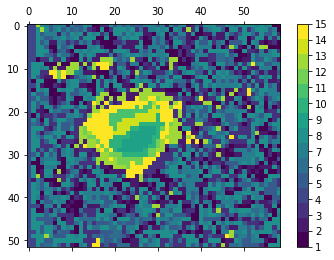

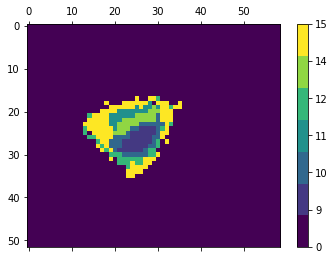

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


skip ((0,), (9, 10, 11, 12, 14, 15))
skip ((15,), (0, 9, 10, 11, 12, 14))
skip ((12,), (0, 9, 10, 11, 14, 15))
skip ((11,), (0, 9, 10, 12, 14, 15))
skip ((14,), (0, 9, 10, 11, 12, 15))
skip ((10,), (0, 9, 11, 12, 14, 15))
skip ((9,), (0, 10, 11, 12, 14, 15))
skip ((15,), (9, 10, 11, 12, 14))
skip ((12,), (9, 10, 11, 14, 15))
skip ((11,), (9, 10, 12, 14, 15))
skip ((14,), (9, 10, 11, 12, 15))
skip ((10,), (9, 11, 12, 14, 15))
skip ((9,), (10, 11, 12, 14, 15))


In [86]:
slided_0, slided0_mgenes, slided0_mgenes_bg = process_imzeregion(imze=imze, regionID= 0, basename="slideD")
slided_1, slided1_mgenes, slided1_mgenes_bg = process_imzeregion(imze=imze, regionID= 1, basename="slideD")

slided_4, slided4_mgenes, slided4_mgenes_bg = process_imzeregion(imze=imze, regionID= 4, basename="slideD")
slided_5, slided5_mgenes, slided5_mgenes_bg = process_imzeregion(imze=imze, regionID= 5, basename="slideD")

In [76]:
markerGenes0 = slided0_mgenes
markerGenes0.to_csv("deresults/marker_genes_region_0.tsv", sep="\t", index=False)
markerGenes1 = slided1_mgenes
markerGenes1.to_csv("deresults/marker_genes_region_1.tsv", sep="\t", index=False)
markerGenes4 = slided4_mgenes
markerGenes4.to_csv("deresults/marker_genes_region_4.tsv", sep="\t", index=False)
markerGenes5 = slided5_mgenes
markerGenes5.to_csv("deresults/marker_genes_region_5.tsv", sep="\t", index=False)


In [77]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_0.tsv --aorta3d --output deresults/marker_genes_region_0.pred.tsv 
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_1.tsv --aorta3d --output deresults/marker_genes_region_1.pred.tsv 
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_4.tsv --aorta3d --output deresults/marker_genes_region_4.pred.tsv 
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_5.tsv --aorta3d --output deresults/marker_genes_region_5.pred.tsv 

Setting number of predictions to 1
Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
Setting number of predictions to 1
Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
Setting number of predictions to 1
Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from n

In [78]:
slided_0.to_aorta3d("./aorta3d/slided/", "slided", 0, protWeights=pw, ctpred="deresults/marker_genes_region_0.pred.tsv")
slided_1.to_aorta3d("./aorta3d/slided/", "slided", 1, protWeights=pw, ctpred="deresults/marker_genes_region_1.pred.tsv")
slided_4.to_aorta3d("./aorta3d/slided/", "slided", 4, protWeights=pw, ctpred="deresults/marker_genes_region_4.pred.tsv")
slided_5.to_aorta3d("./aorta3d/slided/", "slided", 5, protWeights=pw, ctpred="deresults/marker_genes_region_5.pred.tsv")

2020-12-13 20:59:13,797  SpectraRegion  INFO: Cell-type assigned: 8 -> Monocytes;Immune system
2020-12-13 20:59:13,797  SpectraRegion  INFO: Cell-type assigned: 9 -> B cells;Immune system
2020-12-13 20:59:13,798  SpectraRegion  INFO: Cell-type assigned: 10 -> Smooth muscle cells;Smooth muscle
2020-12-13 20:59:13,798  SpectraRegion  INFO: Cell-type assigned: 11 -> Macrophages;Immune system
2020-12-13 20:59:13,799  SpectraRegion  INFO: Cell-type assigned: 12 -> Satellite cells;Skeletal muscle
2020-12-13 20:59:13,799  SpectraRegion  INFO: Cell-type assigned: 13 -> Mast cells;Immune system
2020-12-13 20:59:13,800  SpectraRegion  INFO: Cell-type assigned: 14 -> B cells naive;Immune system
2020-12-13 20:59:13,801  SpectraRegion  INFO: Cell-type assigned: 15 -> Basal cells;Epithelium
2020-12-13 20:59:13,805  SpectraRegion  INFO: Segment Image: ./aorta3d/slided/slided.0.clustering.png
2020-12-13 20:59:13,813  SpectraRegion  INFO: Segment Matrix: /mnt/f/dev/git/pyIMS/examples/aorta3d/slided/sli

In [87]:
! python3 /mnt/f/dev/git/Aorta3D/files2model/register/register_pimz.py --id slided \
--files \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.1.info \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.0.info \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.4.info \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.5.info \
--output /mnt/f/dev/git/pyIMS/examples/aorta3d/slided/registered/slided_server.conf

2021-02-17 14:17:20.002523: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2021-02-17 14:17:20.002566: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
<frozen importlib._bootstrap>:219: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.1.info
['region', 'path_upgma', 'info', 'segment_file', 'hdf5_file']
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.0.info
['region', 'path_upgma', 'info', 'segment_file', 'hdf5_file']
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.4.info
['region', 'path_upgma', 'info', 'segment_file', 'hdf5_file']
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.

In [88]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_0.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IL1RN', 'IFITM3'}	{'IL1RN', 'LY6C1', 'IFITM3', 'RGS2'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'IFI27', 'GLYCAM1', 'ELK3', 'RBP7', 'CLIC4', 'APLN'}	{'LY6C1', 'IFI27', 'ID1', 'GLYCAM1', 'ELK3', 'RBP7', 'CLIC4', 'APLN'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'HEBP2', 'S100A14'}
10	Smooth muscle cells;Smooth muscle	6.30809942596703	3	9	2	3	{'SEC24D', 'MSRB3'}	{'SEC24D', 'RGS5', 'MSRB3'}
10	Dendritic cells;Immune system	1.4120186433259918	4	12	1	3	{'CLEC9A'}	{'LST1', 'CLEC9A', 'H2-DM

In [89]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_1.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IFITM3', 'IL1RN'}	{'RGS2', 'IFITM3', 'IL1RN', 'LY6C1'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'CLIC4', 'ELK3', 'IFI27', 'APLN', 'RBP7', 'GLYCAM1'}	{'CLIC4', 'ELK3', 'IFI27', 'RBP7', 'APLN', 'GLYCAM1', 'LY6C1', 'ID1'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'HEBP2', 'S100A14'}
10	Smooth muscle cells;Smooth muscle	6.30809942596703	3	9	2	3	{'SEC24D', 'MSRB3'}	{'SEC24D', 'RGS5', 'MSRB3'}
10	Dendritic cells;Immune system	1.4120186433259918	4	12	1	3	{'CLEC9A'}	{'H2-DMA', 'MIF', 'LST1',

In [90]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_4.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IL1RN', 'IFITM3'}	{'LY6C1', 'IL1RN', 'IFITM3', 'RGS2'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'APLN', 'ELK3', 'GLYCAM1', 'RBP7', 'IFI27', 'CLIC4'}	{'APLN', 'ID1', 'GLYCAM1', 'ELK3', 'RBP7', 'LY6C1', 'IFI27', 'CLIC4'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'HEBP2', 'S100A14'}
10	Smooth muscle cells;Smooth muscle	6.30809942596703	3	9	2	3	{'MSRB3', 'SEC24D'}	{'MSRB3', 'RGS5', 'SEC24D'}
10	Dendritic cells;Immune system	1.4120186433259918	4	12	1	3	{'CLEC9A'}	{'H2-DMA', 'LST1', 'CLEC9

In [91]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_5.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IFITM3', 'IL1RN'}	{'LY6C1', 'IFITM3', 'IL1RN', 'RGS2'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'CLIC4', 'GLYCAM1', 'ELK3', 'RBP7', 'APLN', 'IFI27'}	{'CLIC4', 'ID1', 'GLYCAM1', 'ELK3', 'RBP7', 'LY6C1', 'APLN', 'IFI27'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'HEBP2', 'S100A14'}
10	Smooth muscle cells;Smooth muscle	6.30809942596703	3	9	2	3	{'SEC24D', 'MSRB3'}	{'RGS5', 'SEC24D', 'MSRB3'}
10	Dendritic cells;Immune system	1.4120186433259918	4	12	1	3	{'CLEC9A'}	{'H2-DMA', 'LST1', 'CLEC9

From these cell type predictions it can be seen that mostly atherosclerosis relates cell types are showing up.

# Creating a CombinedSpectra

In [92]:
slided_0.name = "slided_0"
slided_1.name = "slided_1"
slided_4.name = "slided_4"
slided_5.name = "slided_5"

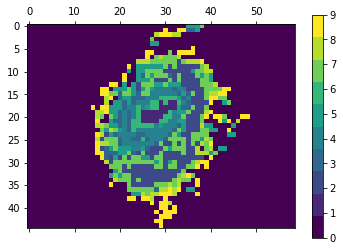

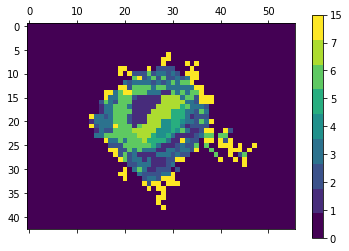

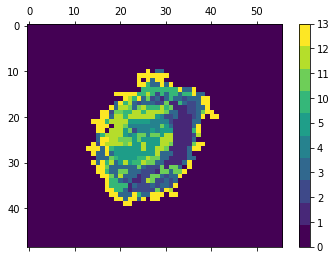

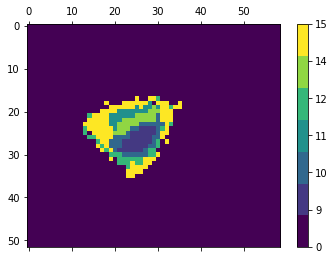

In [93]:
slided_0.plot_segments()
slided_1.plot_segments()
slided_4.plot_segments()
slided_5.plot_segments()

In [ ]:
#slided_0 = SpectraRegion.from_pickle("slideD_region_0.pickle")
#slided_1 = SpectraRegion.from_pickle("slideD_region_1.pickle")
#slided_4 = SpectraRegion.from_pickle("slideD_region_4.pickle")
#slided_5 = SpectraRegion.from_pickle("slideD_region_5pickle")

Of course a SpectraRegion can also be re-processed to yield a more realistic clustering.

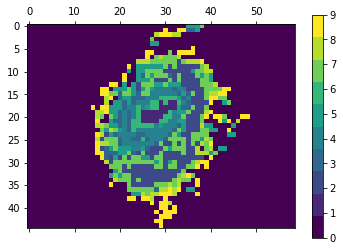

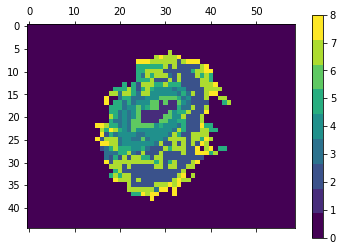

In [94]:
slided_0.plot_segments()
slided_0.set_background(9)
slided_0.segmented[0:5, ] = 0
slided_0.filter_clusters(method='remove_islands')
slided_0.plot_segments()

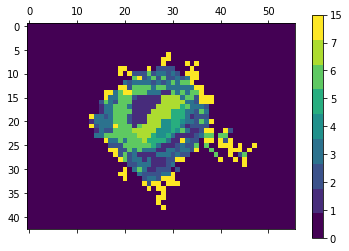

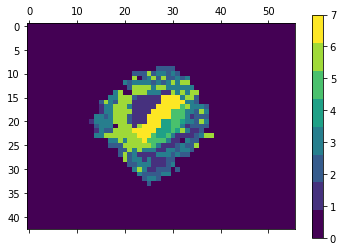

In [95]:
slided_1.plot_segments()
slided_1.set_background(15)
slided_1.filter_clusters(method='remove_islands')
slided_1.plot_segments()

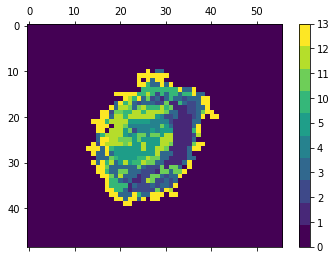

In [96]:
slided_4.plot_segments()

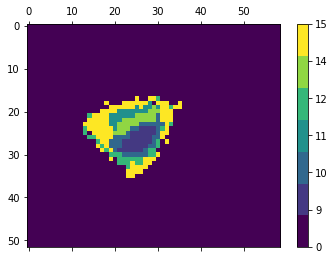

In [97]:
slided_5.plot_segments()

Here a CombinedSpectra is creates. This class allows to compare multiple SpectraRegions

In [98]:
combSpec = CombinedSpectra({0: slided_0, 1: slided_1, 4: slided_4, 5: slided_5})

['slided_0', 'slided_1', 'slided_4', 'slided_5']


100% |########################################################################|


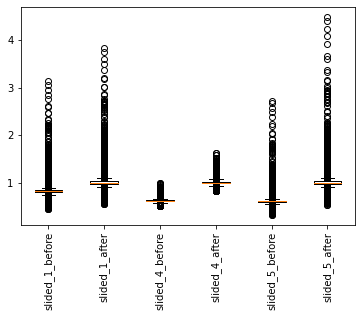

In [99]:
combSpec.get_internormed_regions()

The consensus_smilarity() function calculates the similarity between all the contained spectra's regions using the average cluster/region spectra.

In [100]:
combSpec.consensus_similarity()

In [101]:
combSpec.consensus_similarity_matrix

(slided_0, 0)  (slided_0, 1)  (slided_0, 2)  (slided_0, 3)  \
(slided_0, 0)        1.000000       0.698640       0.868351       0.927293   
(slided_0, 1)        0.698640       1.000000       0.790356       0.792716   
(slided_0, 2)        0.868351       0.790356       1.000000       0.958746   
(slided_0, 3)        0.927293       0.792716       0.958746       1.000000   
(slided_0, 4)        0.936375       0.760136       0.895306       0.978516   
(slided_0, 5)        0.966391       0.738648       0.903048       0.949694   
(slided_0, 6)        0.903673       0.895901       0.942304       0.960109   
(slided_0, 7)        0.952160       0.779704       0.969895       0.977655   
(slided_0, 8)        0.938510       0.770766       0.971052       0.971331   
(slided_1, 0)        0.978866       0.722716       0.892657       0.935801   
(slided_1, 1)        0.836560       0.781204       0.989884       0.947748   
(slided_1, 2)        0.931743       0.768459       0.964377       0.969777   
(slided_1, 3)        0.915220       0.775927       0.973239       0.984840   
(slided_1, 4)        0.825169       0.716445       0.892673       0.929695   
(slided_1, 5)        0.802698       0.624623       0.782435       0.879215   
(slided_1, 6)        0.938229       0.727546       0.897101       0.960924   
(slided_1, 7)        0.877778       0.723109       0.891824       0.932738   
(slided_4, 0)        0.995704       0.712081       0.881637       0.936978   
(slided_4, 1)        0.847646       0.740338       0.944157       0.953874   
(slided_4, 2)        0.827785       0.782662       0.993854       0.948123   
(slided_4, 3)        0.903783       0.787587       0.987269       0.985728   
(slided_4, 4)        0.769036       0.914067       0.948262       0.901958   
(slided_4, 5)        0.894024       0.846611       0.960576       0.983600   
(slided_4, 10)       0.924374       0.747052       0.927419       0.988209   
(slided_4, 11)       0.936577       0.789544       0.951661       0.977970   
(slided_4, 12)       0.945051       0.740933       0.891006       0.969738   
(slided_4, 13)       0.961558       0.762101       0.951232       0.981237   
(slided_5, 0)        0.972038       0.729431       0.902334       0.941673   
(slided_5, 9)        0.692741       0.595188       0.758347       0.819444   
(slided_5, 10)       0.825437       0.643060       0.803602       0.901665   
(slided_5, 11)       0.804393       0.774189       0.976576       0.931443   
(slided_5, 12)       0.875832       0.755048       0.944479       0.970890   
(slided_5, 14)       0.864896       0.720240       0.892360       0.932830   
(slided_5, 15)       0.919130       0.740097       0.914753       0.975159   

                (slided_0, 4)  (slided_0, 5)  (slided_0, 6)  (slided_0, 7)  \
(slided_0, 0)        0.936375       0.966391       0.903673       0.952160   
(slided_0, 1)        0.760136       0.738648       0.895901       0.779704   
(slided_0, 2)        0.895306       0.903048       0.942304       0.969895   
(slided_0, 3)        0.978516       0.949694       0.960109       0.977655   
(slided_0, 4)        1.000000       0.964751       0.947501       0.955569   
(slided_0, 5)        0.964751       1.000000       0.947172       0.978817   
(slided_0, 6)        0.947501       0.947172       1.000000       0.967164   
(slided_0, 7)        0.955569       0.978817       0.967164       1.000000   
(slided_0, 8)        0.925146       0.926168       0.937774       0.976516   
(slided_1, 0)        0.939326       0.970019       0.922586       0.964574   
(slided_1, 1)        0.881340       0.875349       0.932120       0.950012   
(slided_1, 2)        0.949323       0.971458       0.962714       0.992164   
(slided_1, 3)        0.953304       0.945085       0.956224       0.982569   
(slided_1, 4)        0.902899       0.837423       0.874826       0.887623   
(slided_1, 5)        0.896297       0.810926       0.806171       0.820341   
(slided_1, 6)        0.980527       0

Since the inspection of this matrix becomes tidious, particularly if large, it an be plotted :)

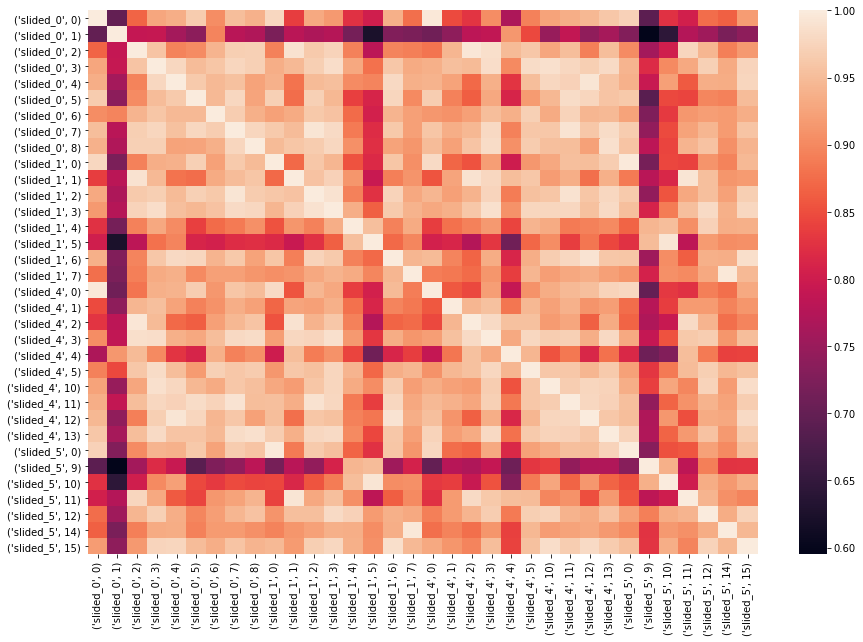

In [102]:
mpl.rcParams['figure.figsize'] = (15,10)
combSpec.plot_consensus_similarity()
mpl.rcParams['figure.figsize'] = (6,4)

It can already be seen that some classes are more similar to each other, than others.

Now the single slide/region clusters are reclustered.

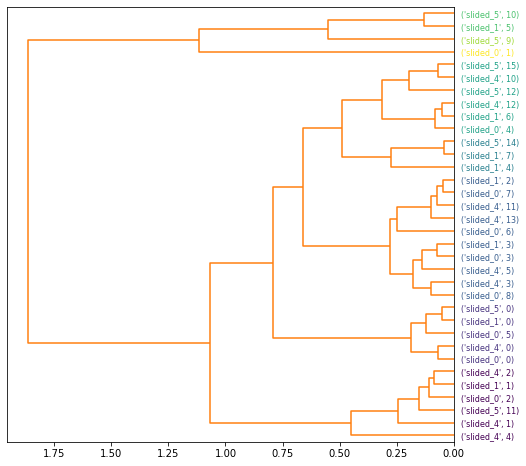

In [103]:
combSpec.cluster_concensus_spectra(number_of_clusters=8)

A detailed print out of the newly assigned cluster for each slide, region.

In [104]:
combSpec.region_cluster2cluster

{('slided_0', 0): 2,
 ('slided_0', 1): 8,
 ('slided_0', 2): 1,
 ('slided_0', 3): 3,
 ('slided_0', 4): 5,
 ('slided_0', 5): 2,
 ('slided_0', 6): 3,
 ('slided_0', 7): 3,
 ('slided_0', 8): 3,
 ('slided_1', 0): 2,
 ('slided_1', 1): 1,
 ('slided_1', 2): 3,
 ('slided_1', 3): 3,
 ('slided_1', 4): 4,
 ('slided_1', 5): 6,
 ('slided_1', 6): 5,
 ('slided_1', 7): 4,
 ('slided_4', 0): 2,
 ('slided_4', 1): 1,
 ('slided_4', 2): 1,
 ('slided_4', 3): 3,
 ('slided_4', 4): 1,
 ('slided_4', 5): 3,
 ('slided_4', 10): 5,
 ('slided_4', 11): 3,
 ('slided_4', 12): 5,
 ('slided_4', 13): 3,
 ('slided_5', 0): 2,
 ('slided_5', 9): 7,
 ('slided_5', 10): 6,
 ('slided_5', 11): 1,
 ('slided_5', 12): 5,
 ('slided_5', 14): 4,
 ('slided_5', 15): 5}

{0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10, 11.0: 11, 12.0: 12, 13.0: 13, 14.0: 14, 15.0: 15}


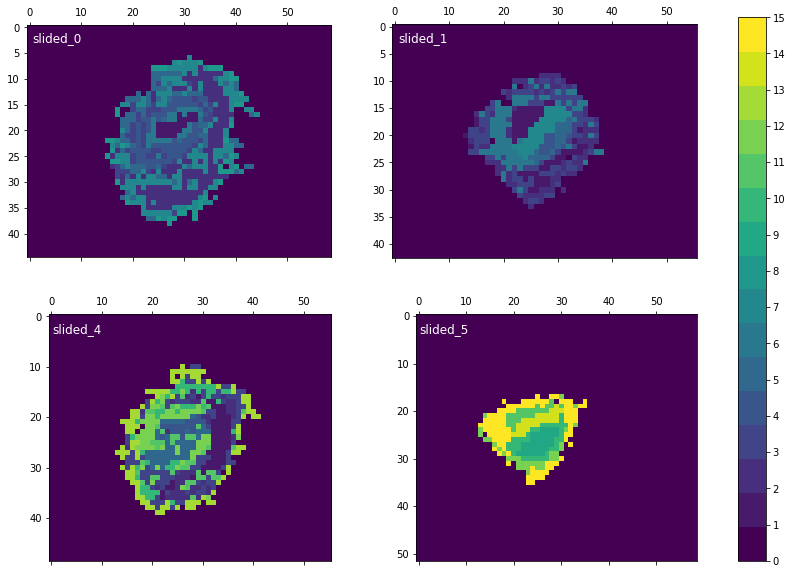

In [105]:
mpl.rcParams['figure.figsize'] = (15,10)
combSpec.plot_segments()
mpl.rcParams['figure.figsize'] = (6,4)

The new assignment can also be plotted:

{0: 2, 1: 8, 2: 1, 3: 3, 4: 5, 5: 2, 6: 3, 7: 3, 8: 3}
{0: 2, 1: 1, 2: 3, 3: 3, 4: 4, 5: 6, 6: 5, 7: 4}
{0: 2, 1: 1, 2: 1, 3: 3, 4: 1, 5: 3, 10: 5, 11: 3, 12: 5, 13: 3}
{0: 2, 9: 7, 10: 6, 11: 1, 12: 5, 14: 4, 15: 5}
{1.0: 1.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 5.0: 5.0, 6.0: 6.0, 7.0: 7.0, 8.0: 8.0}


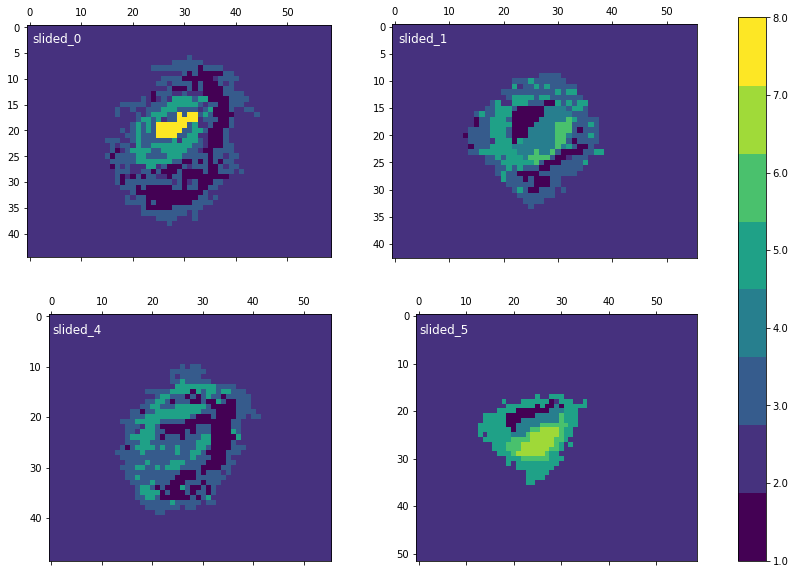

In [107]:
mpl.rcParams['figure.figsize'] = (15,10)
combSpec.plot_common_segments()
mpl.rcParams['figure.figsize'] = (6,4)

And of course, interpreted.

Slide 1 and Slide 5 appear to be similar, and slide 0 and slide 4.



{0: 2, 1: 8, 2: 1, 3: 3, 4: 5, 5: 2, 6: 3, 7: 3, 8: 3}
{0: 2, 1: 1, 2: 3, 3: 3, 4: 4, 5: 6, 6: 5, 7: 4}
{0: 2, 1: 1, 2: 1, 3: 3, 4: 1, 5: 3, 10: 5, 11: 3, 12: 5, 13: 3}
{0: 2, 9: 7, 10: 6, 11: 1, 12: 5, 14: 4, 15: 5}
{1.0: 1.0, 2.0: 2.0}


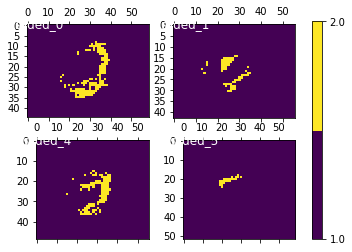

In [108]:
combSpec.plot_common_segments(highlight=(1))

In [109]:
pw.get_protein_from_mass(14954)

[('Ifitm3', 14954.185999999994), ('Tnfrsf12a', 14952.97469999999)]

Similar to a normal SpectraRegion, also specific masses can be plotted. Here we can see that mass 14954 (Ifitm3/Tnfrsf12a) is not present in slides 1 and 5!

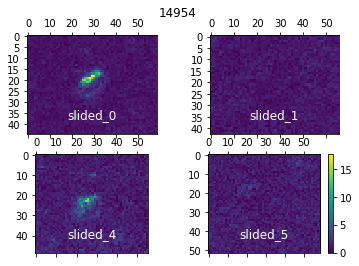

In [110]:
_ = combSpec.mass_heatmap(14954)

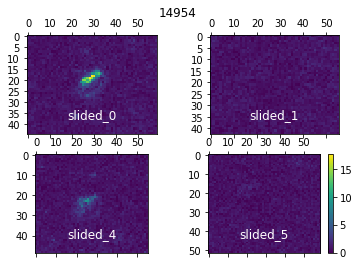

In [111]:
_ = combSpec.mass_heatmap(14954, scaled=True )

## A first DE Analysis: Tunica Media

Slide 0 cluster 2 and slide 4 cluster 1 seem to be very similar. We now want to see whether some differences can be observed.

For this, we suspect that slides 0 and 4 are disease-samples, and slides 1 and 5 are corresponding controls.

We now compare the outer regions of both samples:

['slided_0', 'slided_1', 'slided_4', 'slided_5']


100% |########################################################################|


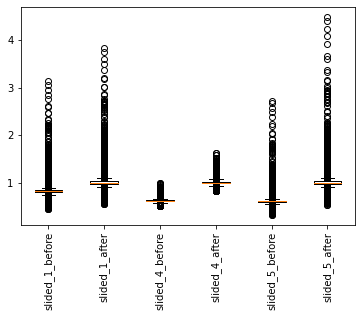

In [112]:
combSpec.get_internormed_regions()

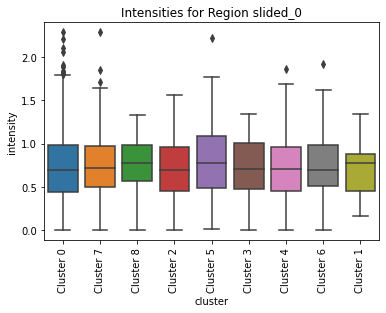

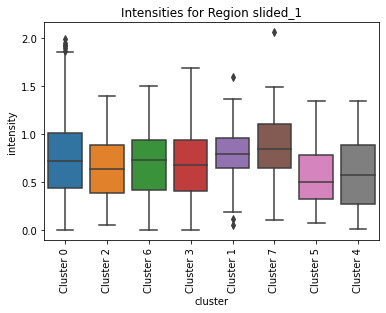

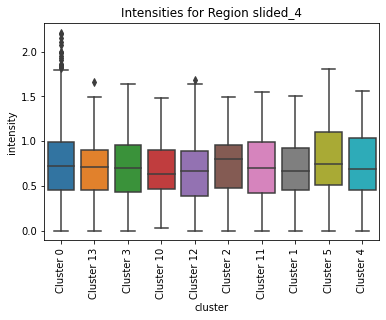

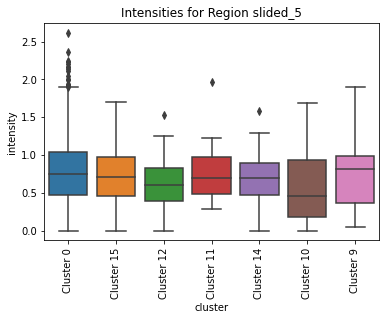

In [113]:
_ = combSpec.mass_intensity(12476, scaled=True )

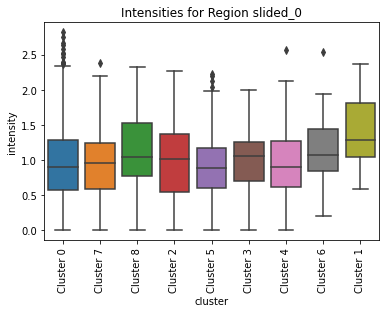

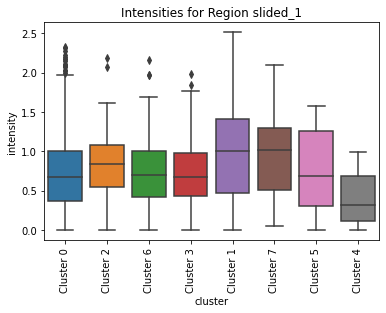

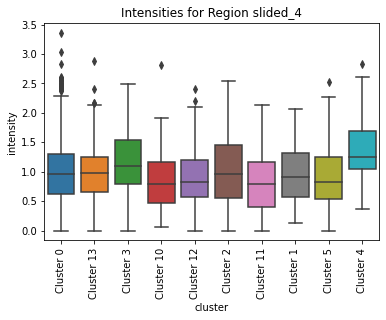

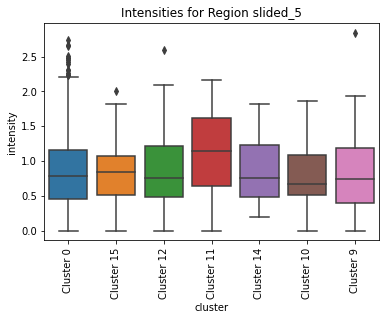

In [114]:
_ = combSpec.mass_intensity(14195, scaled=True )

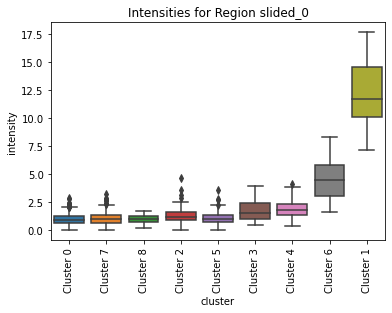

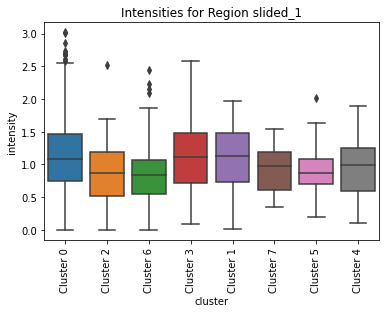

In [115]:
combSpec.mass_intensity(14954, regions=["slided_0", "slided_1"], scaled=False)

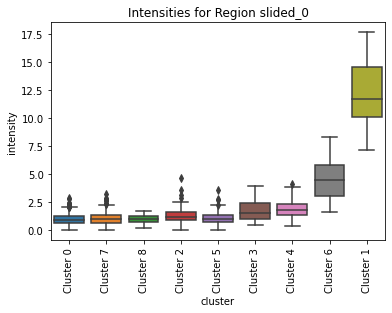

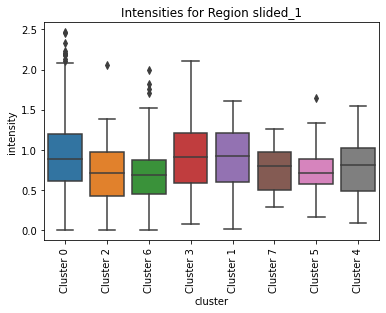

In [116]:
combSpec.mass_intensity(14954, regions=["slided_0", "slided_1"], scaled=True)

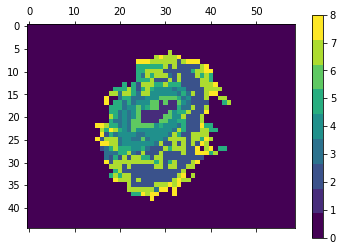

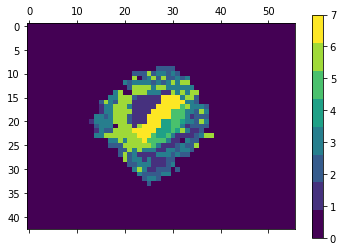

In [117]:
combSpec.regions["slided_0"].plot_segments()
combSpec.regions["slided_1"].plot_segments()

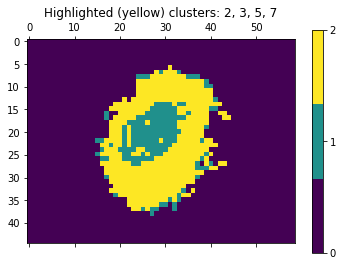

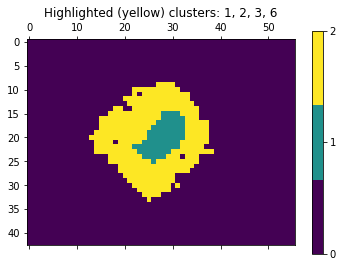

In [118]:
combSpec.regions["slided_0"].plot_segments(highlight=[2, 3, 5, 7])
combSpec.regions["slided_1"].plot_segments(highlight=[1, 2, 3, 6])

In [119]:
slided_0_vessel = [("slided_0", x) for x in [2, 3, 5, 7]]

In [120]:
slided_1_vessel = [("slided_1", x) for x in [1, 2, 3, 6]]

In [122]:
resdf, expr, pdata = combSpec.find_markers(slided_0_vessel, slided_1_vessel, pw, scaled=True, use_methods=["ttest"])

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In order to plot a volcano plot for the differential masses/proteins, the result DF is subset to only have masses displayed that have a mean intensity of at least 2.

In [121]:
vessel_key = tuple(list(combSpec.to_region_cluster_input(slided_0_vessel)[0]) + list(combSpec.to_region_cluster_input(slided_1_vessel)[0]))

In [123]:
mydf_vessel = resdf["ttest"][vessel_key]
mydf_vessel.to_csv("slide.d.vessel.tsv", sep="\t")
mydf_vessel

clusterID               gene_ident     gene_mass     gene  \
0    slided_0_2_3_5_7  mass_3159_0843011034667   3159.084301    Apoc1   
1    slided_0_2_3_5_7   mass_3160_593434316791   3160.593434    Apoc1   
2    slided_0_2_3_5_7  mass_3168_1391003834124   3168.139100  Gm37419   
3    slided_0_2_3_5_7  mass_3344_7076863423495   3344.707686    Anxa3   
4    slided_0_2_3_5_7  mass_3346_2168195556737   3346.216820    Anxa3   
..                ...                      ...           ...      ...   
606  slided_0_2_3_5_7   mass_18710_70206440987  18710.702064      Lep   
607  slided_0_2_3_5_7  mass_18712_211197623197  18712.211198   Gm8879   
608  slided_0_2_3_5_7  mass_18712_211197623197  18712.211198     Cfl2   
609  slided_0_2_3_5_7   mass_18713_72033083652  18713.720331  Gm11569   
610  slided_0_2_3_5_7   mass_18713_72033083652  18713.720331  Dnajc5g   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
0       3160.8824   0.643106  1.341435e-14  443   433  0.960969  0.832218   
1       3160.8824   0.586717  2.108304e-09  443   443  0.690115  0.507539   
2       3170.2332  -0.533914  4.866616e-17  443   443  2.262040  2.118569   
3       3347.6387  -0.745564  7.013787e-40  443   442  2.822322  2.785057   
4       3347.6387  -0.873291  3.386833e-58  443   443  3.666538  3.459385   
..            ...        ...           ...  ...   ...       ...       ...   
606    18708.4055  -0.568902  7.140742e-16  443   442  1.309449  1.091056   
607    18710.0595  -0.544498  5.944563e-15  443   442  1.234513  1.032077   
608    18709.3611  -0.544498  5.944563e-15  443   442  1.234513  1.032077   
609    18715.3232  -0.506910  1.038608e-13  443   443  1.165494  0.992988   
610    18716.2973  -0.506910  1.038608e-13  443   443  1.165494  0.992988   

     num_bg  anum_bg   mean_bg  median_bg  
0       316      315  1.500733   1.397297  
1       316      316  1.036433   0.895306  
2       316      315  1.562342   1.394354  
3       316      311  1.683330   1.665188  
4       316      316  2.001565   1.962595  
..      ...      ...       ...        ...  
606     316      312  0.882739   0.805873  
607     316      313  0.846420   0.767054  
608     316      313  0.846420   0.767054  
609     316      311  0.820190   0.756105  
610     316      311  0.820190   0.756105  

[611 rows x 15 columns]

In [124]:
print("DE masses", len(set(mydf_vessel.gene_mass)))
print("DE up masses", len(set(mydf_vessel.loc[mydf_vessel.avg_logFC > 0].gene_mass)))
print("DE down masses", len(set(mydf_vessel.loc[mydf_vessel.avg_logFC < 0].gene_mass)))
print("DE gene", len(set(mydf_vessel.gene)))

DE masses 259
DE up masses 46
DE down masses 213
DE gene 186


In [126]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [141]:
def make_volcano_plot( inputDF, highlights ):
    plt.figure(figsize=(15,8))
    xydots = [(x,y) for x,y in zip(list(inputDF["avg_logFC"]), list(-np.log10(inputDF["qvalue"])))]
    dotgene = list(inputDF["gene"])
    texts = []
    seenProts = set()

    for i in range(len(xydots)):
        x = xydots[i][0]
        y = xydots[i][1]
        plt.plot(x, y, 'bo')

    for i in range(len(xydots)):
        x = xydots[i][0]
        y = xydots[i][1]
        if dotgene[i] in highlights:
            t = plt.text(x, y , dotgene[i], fontsize=10)
            t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='blue'))
            texts.append(t)
            plt.plot(x, y, 'ro')
            seenProts.add(dotgene[i])

    adjust_text(texts, force_points=1.0, force_text=1.5, expand_points=(1.5, 1.5), expand_text=(1.0, 1.0), arrowprops=dict(arrowstyle="->", color='black', lw=0.5))

    plt.xlabel("$log_2$FC", fontsize=12)
    plt.ylabel("-$log_{10}$(q-value)", fontsize=12)

    plt.show()

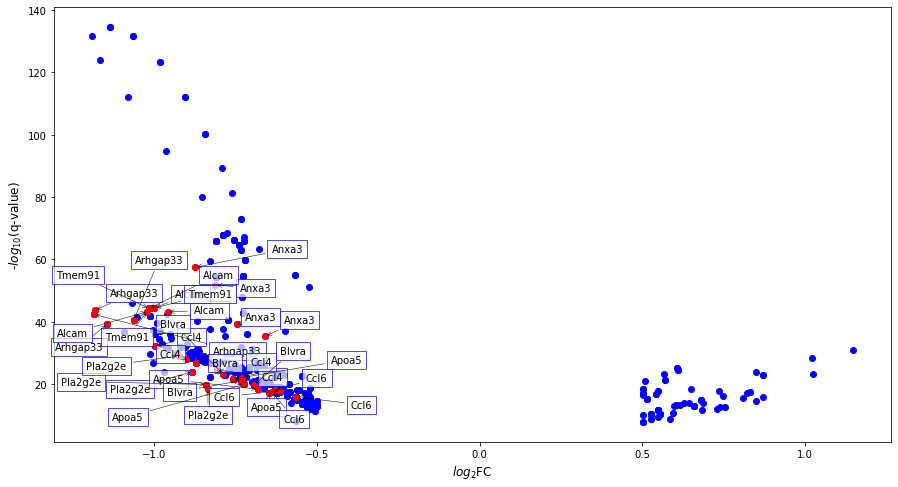

In [142]:
make_volcano_plot(mydf_vessel, ["Pla2g2e", "Ccl4", "Ccl6", "Apoa5", "Tmem91", "Alcam", "Blvra", "Arhgap33", "Anxa3", "Igf1"])

In [143]:
pw.get_masses_for_protein("Ccl4")

{10167.716399999996}

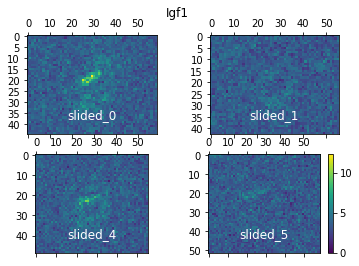

Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []


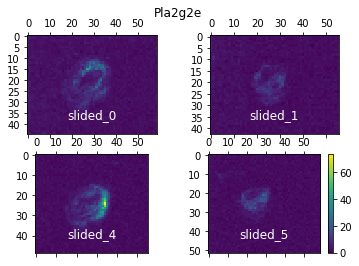

           clusterID              gene_ident    gene_mass     gene  \
56  slided_0_2_3_5_7  mass_8424_450082391777  8424.450082  Pla2g2e   
57  slided_0_2_3_5_7  mass_8425_959215605102  8425.959216  Pla2g2e   
59  slided_0_2_3_5_7  mass_8427_468348818427  8427.468349  Pla2g2e   
64  slided_0_2_3_5_7   mass_8428_97748203175  8428.977482  Pla2g2e   

    protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
56     8426.7026  -0.835053  5.316729e-19  443   443  6.665220  4.992400   
57     8426.7026  -0.840820  1.590234e-20  443   443  5.651176  4.352082   
59     8426.7026  -0.883181  1.189801e-24  443   443  5.435240  4.317104   
64     8426.7026  -0.925130  1.166401e-29  443   443  5.812032  4.720183   

    num_bg  anum_bg   mean_bg  median_bg  
56     316      315  3.736275   2.624589  
57     316      314  3.155199   2.327937  
59     316      313  2.946829   2.346610  
64     316      315  3.060809   2.562911  


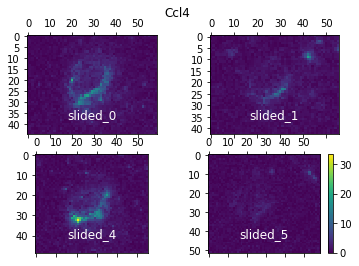

            clusterID               gene_ident     gene_mass  gene  \
227  slided_0_2_3_5_7  mass_10165_989810567964  10165.989811  Ccl4   
229  slided_0_2_3_5_7  mass_10167_498943781287  10167.498944  Ccl4   
233  slided_0_2_3_5_7   mass_10169_00807699461  10169.008077  Ccl4   
237  slided_0_2_3_5_7  mass_10170_517210207936  10170.517210  Ccl4   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
227    10167.7164  -0.998870  7.714476e-33  443   443  5.444276  4.287327   
229    10167.7164  -0.901157  1.411265e-28  443   443  4.958446  3.863115   
233    10167.7164  -0.806584  3.484229e-25  443   443  4.261620  3.335701   
237    10167.7164  -0.728652  1.802976e-22  443   443  3.534296  2.816573   

     num_bg  anum_bg   mean_bg  median_bg  
227     316      316  2.724269   2.146680  
229     316      316  2.655037   2.101104  
233     316      316  2.436512   1.946483  
237     316      316  2.132833   1.757771  


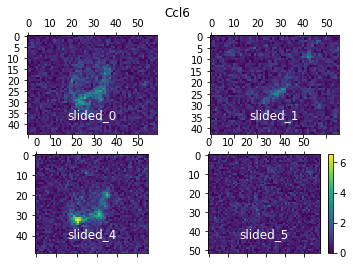

            clusterID               gene_ident     gene_mass  gene  \
277  slided_0_2_3_5_7  mass_12982_032386631015  12982.032387  Ccl6   
279  slided_0_2_3_5_7  mass_12983_541519844339  12983.541520  Ccl6   
284  slided_0_2_3_5_7  mass_12985_050653057664  12985.050653  Ccl6   
287  slided_0_2_3_5_7  mass_12986_559786270987  12986.559786  Ccl6   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
277     12983.868  -0.637911  3.673801e-18  443   442  1.369790  1.161473   
279     12983.868  -0.629713  8.717657e-19  443   442  1.329828  1.141130   
284     12983.868  -0.612690  1.686640e-18  443   441  1.279388  1.114558   
287     12983.868  -0.565322  1.380649e-16  443   440  1.199139  1.071091   

     num_bg  anum_bg   mean_bg  median_bg  
277     316      308  0.880286   0.800855  
279     316      314  0.859475   0.766122  
284     316      312  0.836690   0.775023  
287     316      310  0.810384   0.759489  


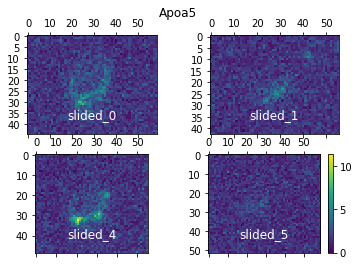

            clusterID               gene_ident     gene_mass   gene  \
267  slided_0_2_3_5_7  mass_12975_995853777718  12975.995854  Apoa5   
268  slided_0_2_3_5_7  mass_12977_504986991042  12977.504987  Apoa5   
273  slided_0_2_3_5_7  mass_12979_014120204367  12979.014120  Apoa5   
276  slided_0_2_3_5_7   mass_12980_52325341769  12980.523253  Apoa5   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
267    12977.6348  -0.758797  2.905672e-22  443   443  1.768569  1.452701   
268    12977.6348  -0.723447  1.426154e-20  443   443  1.686594  1.415017   
273    12977.6348  -0.681208  4.962347e-19  443   441  1.605987  1.368653   
276    12977.6348  -0.645870  6.021602e-18  443   441  1.476000  1.245229   

     num_bg  anum_bg   mean_bg  median_bg  
267     316      314  1.045205   0.896426  
268     316      314  1.021483   0.879931  
273     316      315  1.001562   0.871320  
276     316      309  0.943322   0.852022  


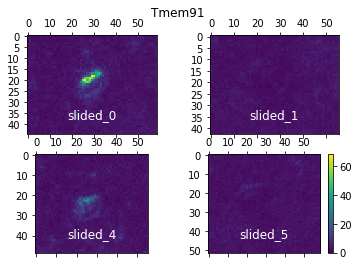

            clusterID               gene_ident     gene_mass    gene  \
335  slided_0_2_3_5_7  mass_14974_088228219027  14974.088228  Tmem91   
337  slided_0_2_3_5_7   mass_14975_59736143235  14975.597361  Tmem91   
343  slided_0_2_3_5_7  mass_14977_106494645675  14977.106495  Tmem91   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
335    14975.6003  -0.999996  4.503674e-45  443   443  3.387263  2.728120   
337    14975.6003  -1.016247  5.840727e-45  443   443  3.750112  3.022549   
343    14975.6003  -1.021479  6.075005e-44  443   443  4.096347  3.280383   

     num_bg  anum_bg   mean_bg  median_bg  
335     316      316  1.693637   1.607578  
337     316      316  1.854059   1.755224  
343     316      316  2.017907   1.902623  


In [144]:
for protid in ["Igf1", "Pla2g2e", "Ccl4", "Ccl6", "Apoa5", "Tmem91"]: #"Il11", "Cst3", "Tnfrsf12a", "Bcl7c", 
    _ = combSpec.mass_heatmap(pw.get_masses_for_protein(protid), scaled=True, title=protid )
    print(mydf_vessel.loc[mydf_vessel.gene == protid,])

![title](https://medicalartlibrary.com/wp-content/uploads/atherosclerosis-renal.jpg)

In this comparison the tunica media of atherosclerotic (slided_0) and control (slided_1) aorta was compared.
It must be noted, that the selected regions are considerably thicker in slided_1 compared to slided_0, but it is a known phenomenon that "The media underlying intimal athero- sclerotic plaque is considerably thinner" (Milutinović, A., Šuput, D., & Zorc-Pleskovič, R. (2020). Pathogenesis of atherosclerosis in the tunica intima, media, and adventitia of coronary arteries: An updated review. In Bosnian Journal of Basic Medical Sciences (Vol. 20, Issue 1, pp. 21–30). Association of Basic Medical Sciences of FBIH. https://doi.org/10.17305/bjbms.2019.4320 ).

However, due to the proximity to the background tissue (liver), for each mass it should be checked whether this mass is not also prevalent in the background tissue and therefore is present in the cluster due to diffusion, bad clustering, or other reasons. The mass_heatmap-function give a good and fast overview!

#### Tmsb4x -
First it is very interesting to see a difference in Tmsb4x between the (suspected) control and disease aortas.
The diseased-aorta-media has significantly less Tmsb4x (-0.5).
This is not surprising, but was already found 5 years ago ( Zaima, N., Sasaki, T., Tanaka, H., Cheng, X. W., Onoue, K., Hayasaka, T., Goto-Inoue, N., Enomoto, H., Unno, N., Kuzuya, M., & Setou, M. (2011). Imaging mass spectrometry-based histopathologic examination of atherosclerotic lesions. Atherosclerosis, 217(2), 427–432. https://doi.org/10.1016/j.atherosclerosis.2011.03.044 ). Indeed, this can be seen as proof-of-concept.

#### Ptges3 + // no

On the contrary, there are other proteins, which are up-regulated in the atherosclerotic aorta.
Among these is Ptges3 (+1.25), which was shown to be involved in the inflammatory response of bovine endometrial epithelial cells.
Almughlliq, F. B., Koh, Y. Q., Peiris, H. N., Vaswani, K., Arachchige, B. J., Reed, S., & Mitchell, M. D. (2018). Eicosanoid pathway expression in bovine endometrial epithelial and stromal cells in response to lipopolysaccharide, interleukin 1 beta, and tumor necrosis factor alpha. Reproductive Biology, 18(4), 390–396. https://doi.org/10.1016/j.repbio.2018.10.001

Further proteins of interest include

#### Chchd4 + // no
Chchd4 was already identified as a biomarker for chronic obstructive pulmonary disease (COPD), a chronic inflammatory disease - in such, maybe? comparable to atherosclerosis.
Chchd4 affects the mitochondrial metabolism, being named in the p53-axis controlling tumor proliferation.

Maghsoudloo, M., Azimzadeh Jamalkandi, S., Najafi, A., & Masoudi-Nejad, A. (2020). An efficient hybrid feature selection method to identify potential biomarkers in common chronic lung inflammatory diseases. Genomics, 112(5), 3284–3293. https://doi.org/10.1016/j.ygeno.2020.06.010

#### Coa6 --

The respiratory metabolism appears to play an important role in atherosclerosis. Many regulated proteins fall into this category.
A Coa6 deficiency is known to be causing many disease phenotypes, including cardiomyopathy, encephalomyopathy, skeletal muscle myopathy, Leigh syndrome, metabolic acidosis and occasional hepatic failure.
In summary: Coa6 deficiency does not contribute to a healthy Aorta.

Ghosh, A., Trivedi, P. P., Timbalia, S. A., Griffin, A. T., Rahn, J. J., Chan, S. S. L., & Gohil, V. M. (2014). Copper supplementation restores cytochrome c oxidase assembly defect in a mitochondrial disease model of COA6 deficiency. Human Molecular Genetics, 23(13), 3596–3606. https://doi.org/10.1093/hmg/ddu069

#### Cst3 +

Serum Cystein3 is associated with subclinical atherosclerosis, which can also be seen in the middle of the IMS aorta. It also does not seem unlikely, that Cst3 is elsewhere upregulated in atherosclerotic aorta.

Chung, Y. K., Lee, Y. J., Kim, K. W., Cho, R. K., Chung, S. M., Moon, J. S., Yoon, J. S., Won, K. C., & Lee, H. W. (2018). Serum cystatin C is associated with subclinical atherosclerosis in patients with type 2 diabetes: A retrospective study. Diabetes and Vascular Disease Research, 15(1), 24–30. https://doi.org/10.1177/1479164117738156

#### Ndufa11 +, Cox7a2 -

This proteins is of interesting, and together with other identified proteins ( like Cox7a2 ), is part of the mitochondria.
Atherosclerosis therefore might have an effect on the energy metabolism, similar to an ischemic stroke: James, R., Searcy, J. L., Le Bihan, T., Martin, S. F., Gliddon, C. M., Povey, J., Deighton, R. F., Kerr, L. E., McCulloch, J., & Horsburgh, K. (2012). Proteomic analysis of mitochondria in APOE transgenic mice and in response to an ischemic challenge. Journal of Cerebral Blood Flow and Metabolism, 32(1), 164–176. https://doi.org/10.1038/jcbfm.2011.120 

#### Ndufb6 +

Ndufb6 was identified to being critical for the development of PM2.5-induced fibrosis in mouse lungs. Therefore it is likely related to inflammatory processes.

Han, X., Liu, H., Zhang, Z., Yang, W., Wu, C., Liu, X., Zhang, F., Sun, B., Zhao, Y., Jiang, G., Yang, Y. G., & Ding, W. (2020). Epitranscriptomic 5-Methylcytosine Profile in PM2.5-induced Mouse Pulmonary Fibrosis. Genomics, Proteomics and Bioinformatics, 18(1), 41–51. https://doi.org/10.1016/j.gpb.2019.11.005



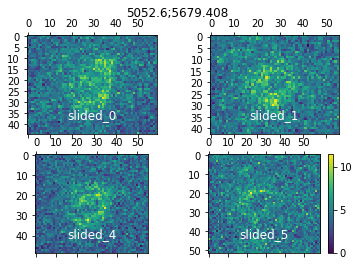

In [145]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Tmsb4x"), scaled=True)

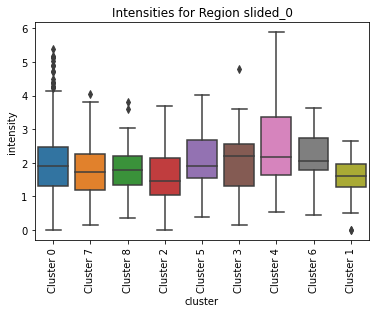

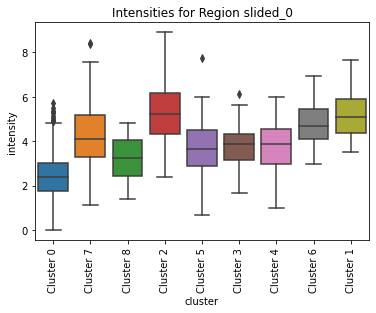

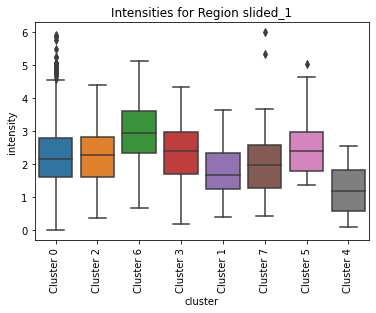

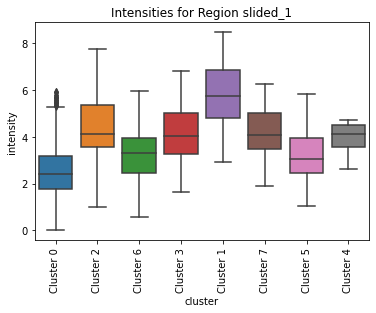

In [146]:
combSpec.mass_intensity(pw.protein2mass.get("Tmsb4x"), regions=["slided_0", "slided_1"], scaled=True)

In [158]:
slided_0_outer_regions = tuple(sorted([("slided_0", x) for x in np.unique(slided_0.segmented) if x > 0 and not x in [1,3,4,6,7,8]]))
slided_1_outer_regions = tuple(sorted([("slided_1", x) for x in np.unique(slided_1.segmented) if x > 0 and not x in [2,3,7,8,9]]))

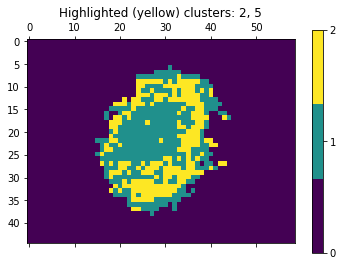

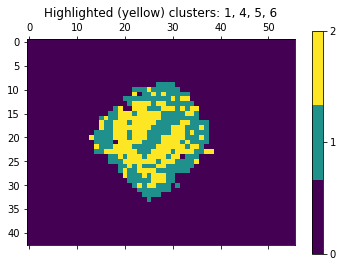

In [159]:
combSpec.regions["slided_0"].plot_segments(highlight=[x[1] for x in slided_0_outer_regions])
combSpec.regions["slided_1"].plot_segments(highlight=[x[1] for x in slided_1_outer_regions])

In [166]:
resdf_outer, expr, pdata = combSpec.find_markers(slided_0_outer_regions, slided_1_outer_regions, pw, scaled=True, use_methods=["ttest"])

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [170]:
outer_key = tuple(list(combSpec.to_region_cluster_input(slided_0_outer_regions)[0]) + list(combSpec.to_region_cluster_input(slided_1_outer_regions)[0]))

In [175]:
mydf_outer = resdf_outer["ttest"][outer_key]
mydf_outer.to_csv("slide.d.outer.tsv", sep="\t")
mydf_outer

clusterID               gene_ident     gene_mass     gene  \
0    slided_0_2_5   mass_3204_358297503194   3204.358298  Gm15517   
1    slided_0_2_5  mass_3205_8674307165184   3205.867431  Gm15517   
2    slided_0_2_5  mass_3344_7076863423495   3344.707686    Anxa3   
3    slided_0_2_5  mass_3346_2168195556737   3346.216820    Anxa3   
4    slided_0_2_5   mass_3347_725952768998   3347.725953    Anxa3   
..            ...                      ...           ...      ...   
980  slided_0_2_5   mass_18718_24773047649  18718.247730   Trarg1   
981  slided_0_2_5   mass_18718_24773047649  18718.247730  Ppp1r1a   
982  slided_0_2_5   mass_18718_24773047649  18718.247730  Tmem251   
983  slided_0_2_5   mass_18718_24773047649  18718.247730  Dnajc5g   
984  slided_0_2_5   mass_18718_24773047649  18718.247730  Gm11569   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
0       3206.7303   0.505301  2.502352e-04  237   229  0.841453  0.691377   
1       3206.7303   0.540010  5.197802e-05  237   237  0.751495  0.647818   
2       3347.6387  -0.555100  1.574476e-12  237   236  2.685396  2.588477   
3       3347.6387  -0.641244  6.384932e-19  237   237  3.473679  3.319837   
4       3347.6387  -0.572510  1.499272e-15  237   237  3.563976  3.371851   
..            ...        ...           ...  ...   ...       ...       ...   
980    18718.4288  -0.528463  1.247920e-09  237   236  0.889801  0.811811   
981    18717.5601  -0.528463  1.247920e-09  237   236  0.889801  0.811811   
982    18719.6954  -0.528463  1.247920e-09  237   236  0.889801  0.811811   
983    18716.2973  -0.528463  1.247920e-09  237   236  0.889801  0.811811   
984    18715.3232  -0.528463  1.247920e-09  237   236  0.889801  0.811811   

     num_bg  anum_bg   mean_bg  median_bg  
0       171      166  1.194376   1.065864  
1       171      171  1.092661   0.998200  
2       171      169  1.827707   1.785702  
3       171      171  2.227186   2.125112  
4       171      171  2.396582   2.295736  
..      ...      ...       ...        ...  
980     171      169  0.616892   0.561800  
981     171      169  0.616892   0.561800  
982     171      169  0.616892   0.561800  
983     171      169  0.616892   0.561800  
984     171      169  0.616892   0.561800  

[985 rows x 15 columns]

In [176]:
print("DE masses", len(set(mydf_outer.gene_mass)))
print("DE up masses", len(set(mydf_outer.loc[mydf_outer.avg_logFC > 0].gene_mass)))
print("DE down masses", len(set(mydf_outer.loc[mydf_outer.avg_logFC < 0].gene_mass)))
print("DE gene", len(set(mydf_outer.gene)))

DE masses 428
DE up masses 157
DE down masses 271
DE gene 314


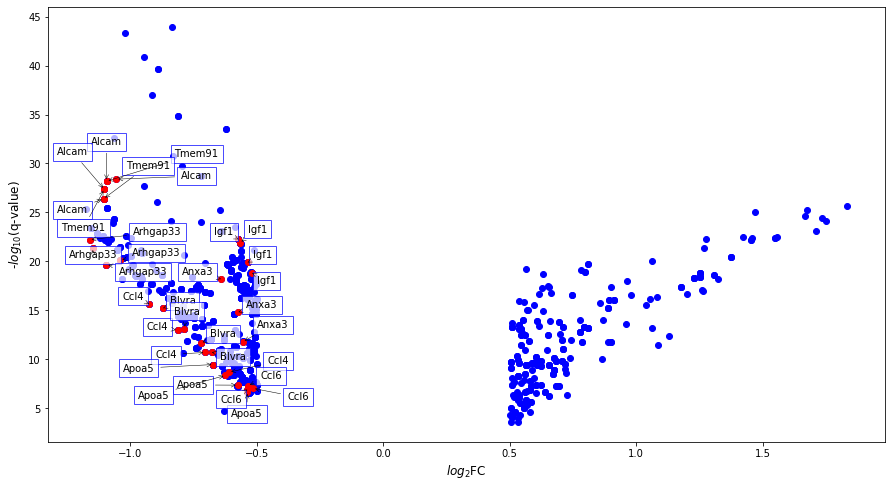

In [177]:
make_volcano_plot(mydf_outer, ["Pla2g2e", "Ccl4", "Ccl6", "Apoa5", "Tmem91", "Alcam", "Blvra", "Arhgap33", "Anxa3", "Igf1"])

## Another DE Analysis: whole Artery

Having spotted several differences between the Tunica media of atherosclerotic and suspected healthy aorta, a full comparison might also be of interest.

For this, all slided_0 and slided_1 regions are compared  - with the exception of the backgrounds.

In [178]:
slided_0_regions = tuple(sorted([(slided_0.name, x) for x in np.unique(slided_0.segmented) if x > 0]))
slided_1_regions = tuple(sorted([(slided_1.name, x) for x in np.unique(slided_1.segmented) if x > 0]))

In [179]:
print(slided_0_regions, slided_1_regions)

(('slided_0', 1), ('slided_0', 2), ('slided_0', 3), ('slided_0', 4), ('slided_0', 5), ('slided_0', 6), ('slided_0', 7), ('slided_0', 8)) (('slided_1', 1), ('slided_1', 2), ('slided_1', 3), ('slided_1', 4), ('slided_1', 5), ('slided_1', 6), ('slided_1', 7))


../pIMZ/regions.py:1154: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if showcopy[i,j] in highlight:


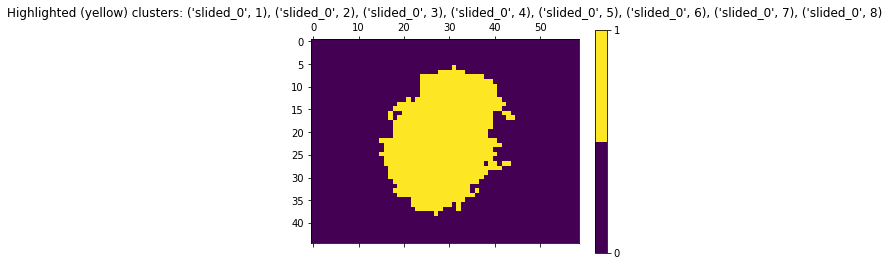

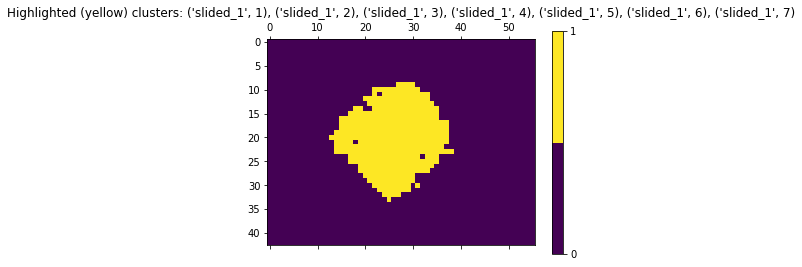

In [180]:
combSpec.regions["slided_0"].plot_segments(highlight=slided_0_regions)
combSpec.regions["slided_1"].plot_segments(highlight=slided_1_regions)

In [181]:
[x for x in combSpec.regions]

['slided_0', 'slided_1', 'slided_4', 'slided_5']

In [182]:
resdf_all, expr, pdata = combSpec.find_markers(slided_0_regions, slided_1_regions, pw, use_methods=["ttest"], scaled=True, )

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |##################################

In [184]:
combSpec.list_de_results()

[('ttest', ('slided_0', (2, 3, 5, 7), 'slided_1', (1, 2, 3, 6))),
 ('ttest', ('slided_0', (2, 5), 'slided_1', (1, 4, 5, 6))),
 ('ttest',
  ('slided_0', (1, 2, 3, 4, 5, 6, 7, 8), 'slided_1', (1, 2, 3, 4, 5, 6, 7)))]

In [185]:
all_key =tuple(list(combSpec.to_region_cluster_input(slided_0_regions)[0]) + list(combSpec.to_region_cluster_input(slided_1_regions)[0])) 

In [186]:
mydf_all = resdf_all["ttest"][all_key]
mydf_all.to_csv("slide.d.0.{}.1.{}.tsv".format("_".join([str(x) for x in slided_0_regions]), "_".join([str(x) for x in slided_1_regions])), sep="\t")
mydf_all

clusterID               gene_ident     gene_mass     gene  \
0    slided_0_1_2_3_4_5_6_7_8  mass_3159_0843011034667   3159.084301    Apoc1   
1    slided_0_1_2_3_4_5_6_7_8   mass_3160_593434316791   3160.593434    Apoc1   
2    slided_0_1_2_3_4_5_6_7_8  mass_3344_7076863423495   3344.707686    Anxa3   
3    slided_0_1_2_3_4_5_6_7_8  mass_3346_2168195556737   3346.216820    Anxa3   
4    slided_0_1_2_3_4_5_6_7_8   mass_3347_725952768998   3347.725953    Anxa3   
..                        ...                      ...           ...      ...   
919  slided_0_1_2_3_4_5_6_7_8   mass_18713_72033083652  18713.720331  Gm11569   
920  slided_0_1_2_3_4_5_6_7_8   mass_18713_72033083652  18713.720331  Dnajc5g   
921  slided_0_1_2_3_4_5_6_7_8  mass_18715_229464049844  18715.229464  Gm11569   
922  slided_0_1_2_3_4_5_6_7_8  mass_18715_229464049844  18715.229464  Dnajc5g   
923  slided_0_1_2_3_4_5_6_7_8  mass_18715_229464049844  18715.229464  Ppp1r1a   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
0       3160.8824   0.625024  1.403066e-17  609   596  0.973901  0.823568   
1       3160.8824   0.554428  1.296539e-10  609   609  0.700715  0.507712   
2       3347.6387  -0.884532  2.993079e-62  609   608  3.131949  2.965962   
3       3347.6387  -1.016701  1.936143e-80  609   609  4.121637  3.689316   
4       3347.6387  -0.945662  1.096852e-69  609   609  4.227552  3.813610   
..            ...        ...           ...  ...   ...       ...       ...   
919    18715.3232  -0.551754  9.798505e-18  609   606  1.124048  0.906013   
920    18716.2973  -0.551754  9.798505e-18  609   606  1.124048  0.906013   
921    18715.3232  -0.503417  8.618314e-16  609   604  1.057600  0.867161   
922    18716.2973  -0.503417  8.618314e-16  609   604  1.057600  0.867161   
923    18717.5601  -0.503417  8.618314e-16  609   604  1.057600  0.867161   

     num_bg  anum_bg   mean_bg  median_bg  
0       385      384  1.501985   1.399371  
1       385      385  1.029060   0.892041  
2       385      380  1.696461   1.664370  
3       385      385  2.037098   1.966332  
4       385      385  2.194909   2.115562  
..      ...      ...       ...        ...  
919     385      378  0.766815   0.705469  
920     385      378  0.766815   0.705469  
921     385      382  0.746067   0.679738  
922     385      382  0.746067   0.679738  
923     385      382  0.746067   0.679738  

[924 rows x 15 columns]

In [188]:
mydf_all_more = combSpec.deres_to_df(combSpec.de_results_all["ttest"][all_key], all_key, pw, mz_dist=3, mz_best=False, keepOnlyProteins=True, scaled=True, min_log2fc=0.25)

In [189]:
mydf_all_more.sort_values('qvalue')

clusterID               gene_ident     gene_mass  \
595   slided_0_1_2_3_4_5_6_7_8   mass_8563_290338017609   8563.290338   
596   slided_0_1_2_3_4_5_6_7_8   mass_8563_290338017609   8563.290338   
594   slided_0_1_2_3_4_5_6_7_8   mass_8561_781204804283   8561.781205   
598   slided_0_1_2_3_4_5_6_7_8   mass_8564_799471230934   8564.799471   
597   slided_0_1_2_3_4_5_6_7_8   mass_8564_799471230934   8564.799471   
...                        ...                      ...           ...   
2216  slided_0_1_2_3_4_5_6_7_8  mass_15567_177581055457  15567.177581   
2221  slided_0_1_2_3_4_5_6_7_8  mass_15567_177581055457  15567.177581   
2219  slided_0_1_2_3_4_5_6_7_8  mass_15567_177581055457  15567.177581   
2217  slided_0_1_2_3_4_5_6_7_8  mass_15567_177581055457  15567.177581   
266   slided_0_1_2_3_4_5_6_7_8   mass_7164_323849266028   7164.323849   

           gene  protein_mass  avg_logFC         qvalue  num  anum       mean  \
595     Gm12728     8560.5972  -1.068539  1.304960e-153  609   609  10.680195   
596       Mtmr2     8566.0632  -1.068539  1.304960e-153  609   609  10.680195   
594     Gm12728     8560.5972  -1.110313  5.406856e-153  609   609   7.697133   
598     Micos10     8566.8712  -1.003867  5.455075e-144  609   609  12.385445   
597       Mtmr2     8566.0632  -1.003867  5.455075e-144  609   609  12.385445   
...         ...           ...        ...            ...  ...   ...        ...   
2216     Smim41    15567.3853  -0.280538   4.585819e-03  609   586   0.729030   
2221       Pnkd    15569.6633  -0.280538   4.585819e-03  609   586   0.729030   
2219  Hist1h2bp    15564.9449  -0.280538   4.585819e-03  609   586   0.729030   
2217     Myocos    15567.4913  -0.280538   4.585819e-03  609   586   0.729030   
266        Rsu1     7166.9811   0.258186   7.863367e-03  609   543   0.558687   

         median  num_bg  anum_bg   mean_bg  median_bg  
595   10.528688     385      385  5.092335   4.806017  
596   10.528688     385      385  5.092335   4.806017  
594    7.532039     385      385  3.565263   3.366972  
598   12.233066     385      385  6.176148   5.882984  
597   12.233066     385      385  6.176148   5.882984  
...         ...     ...      ...       ...        ...  
2216   0.550330     385      369  0.600198   0.573055  
2221   0.550330     385      369  0.600198   0.573055  
2219   0.550330     385      369  0.600198   0.573055  
2217   0.550330     385      369  0.600198   0.573055  
266    0.458478     385      344  0.668175   0.576024  

[3028 rows x 15 columns]

In [190]:
print("DE masses", len(set(mydf_all.gene_mass)))
print("DE up masses", len(set(mydf_all.loc[mydf_all.avg_logFC > 0].gene_mass)))
print("DE down masses", len(set(mydf_all.loc[mydf_all.avg_logFC < 0].gene_mass)))
print("DE gene", len(set(mydf_all.gene)))

DE masses 368
DE up masses 62
DE down masses 306
DE gene 264


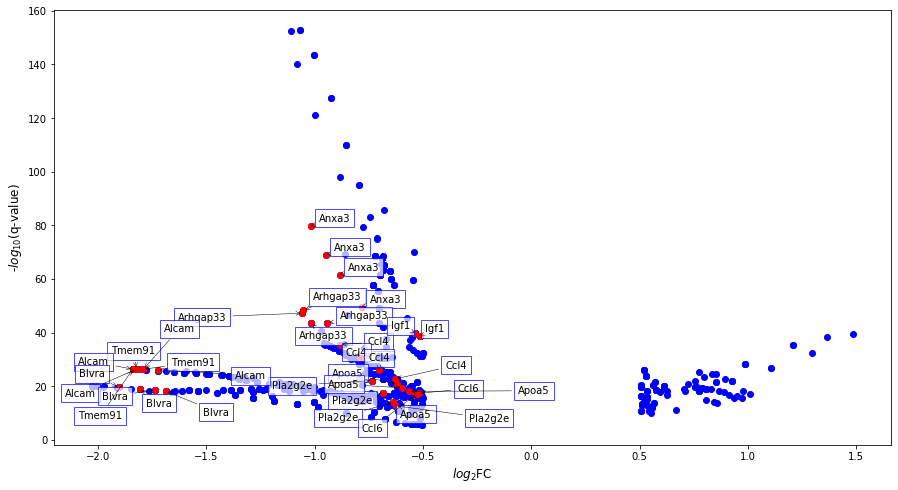

In [191]:
make_volcano_plot(mydf_all, ["Pla2g2e", "Ccl4", "Ccl6", "Apoa5", "Tmem91", "Alcam", "Blvra", "Arhgap33", "Anxa3", "Igf1"])

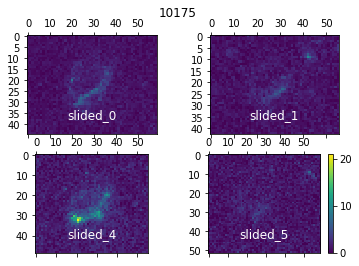

In [192]:
_=combSpec.mass_heatmap([10175])

In [193]:
pw.get_protein_from_mass(10161)

[('Arhgap33', 10161.222399999991)]

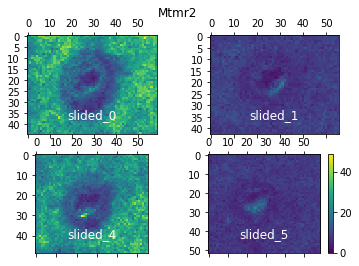

                    clusterID              gene_ident    gene_mass   gene  \
157  slided_0_1_2_3_4_5_6_7_8  mass_8563_290338017609  8563.290338  Mtmr2   
158  slided_0_1_2_3_4_5_6_7_8  mass_8564_799471230934  8564.799471  Mtmr2   
160  slided_0_1_2_3_4_5_6_7_8  mass_8566_308604444257  8566.308604  Mtmr2   
163  slided_0_1_2_3_4_5_6_7_8   mass_8567_81773765758  8567.817738  Mtmr2   

     protein_mass  avg_logFC         qvalue  num  anum       mean     median  \
157     8566.0632  -1.068539  1.304960e-153  609   609  10.680195  10.528688   
158     8566.0632  -1.003867  5.455075e-144  609   609  12.385445  12.233066   
160     8566.0632  -0.926562  4.275944e-128  609   609  12.874506  12.744179   
163     8566.0632  -0.854245  1.292639e-110  609   609  12.276417  12.060283   

     num_bg  anum_bg   mean_bg  median_bg  
157     385      385  5.092335   4.806017  
158     385      385  6.176148   5.882984  
160     385      385  6.773420   6.364260  
163     385      385  6.790763   6.36

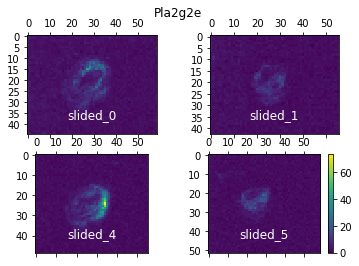

                   clusterID              gene_ident    gene_mass     gene  \
88  slided_0_1_2_3_4_5_6_7_8  mass_8424_450082391777  8424.450082  Pla2g2e   
89  slided_0_1_2_3_4_5_6_7_8  mass_8425_959215605102  8425.959216  Pla2g2e   
91  slided_0_1_2_3_4_5_6_7_8  mass_8427_468348818427  8427.468349  Pla2g2e   
96  slided_0_1_2_3_4_5_6_7_8   mass_8428_97748203175  8428.977482  Pla2g2e   

    protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
88     8426.7026  -0.626046  2.136392e-13  609   609  7.322958  5.278462   
89     8426.7026  -0.637939  1.188958e-14  609   609  6.170947  4.525155   
91     8426.7026  -0.685917  3.218729e-18  609   609  5.879921  4.494506   
96     8426.7026  -0.736979  7.633085e-23  609   609  6.237250  4.837576   

    num_bg  anum_bg   mean_bg  median_bg  
88     385      384  4.744907   3.280502  
89     385      383  3.965640   2.783824  
91     385      382  3.655024   2.679765  
96     385      384  3.742318   2.844751  


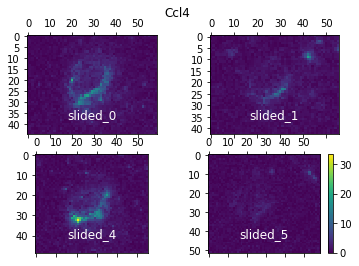

                    clusterID               gene_ident     gene_mass  gene  \
291  slided_0_1_2_3_4_5_6_7_8  mass_10165_989810567964  10165.989811  Ccl4   
293  slided_0_1_2_3_4_5_6_7_8  mass_10167_498943781287  10167.498944  Ccl4   
297  slided_0_1_2_3_4_5_6_7_8   mass_10169_00807699461  10169.008077  Ccl4   
301  slided_0_1_2_3_4_5_6_7_8  mass_10170_517210207936  10170.517210  Ccl4   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
291    10167.7164  -0.882433  3.163693e-36  609   609  5.003350  3.929174   
293    10167.7164  -0.790638  4.480258e-31  609   609  4.588844  3.664287   
297    10167.7164  -0.702756  7.114302e-27  609   609  3.970233  3.233619   
301    10167.7164  -0.628191  1.973777e-23  609   609  3.309215  2.684910   

     num_bg  anum_bg   mean_bg  median_bg  
291     385      385  2.714075   2.181060  
293     385      385  2.652758   2.128820  
297     385      385  2.439301   1.990003  
301     385      385  2.141019   1.792088  


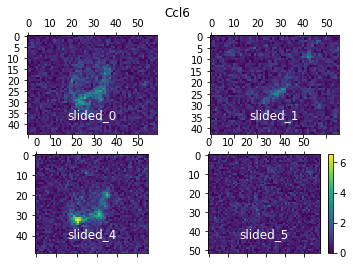

                    clusterID               gene_ident     gene_mass  gene  \
332  slided_0_1_2_3_4_5_6_7_8  mass_12982_032386631015  12982.032387  Ccl6   
334  slided_0_1_2_3_4_5_6_7_8  mass_12983_541519844339  12983.541520  Ccl6   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
332     12983.868  -0.529612  6.847414e-18  609   608  1.287216  1.130620   
334     12983.868  -0.517835  4.204355e-18  609   607  1.249680  1.094167   

     num_bg  anum_bg   mean_bg  median_bg  
332     385      376  0.891707   0.810651  
334     385      382  0.872801   0.796945  


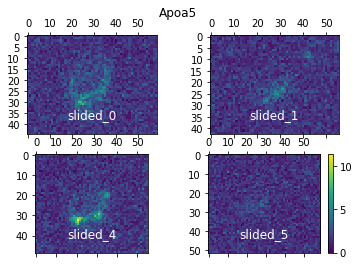

                    clusterID               gene_ident     gene_mass   gene  \
322  slided_0_1_2_3_4_5_6_7_8  mass_12975_995853777718  12975.995854  Apoa5   
323  slided_0_1_2_3_4_5_6_7_8  mass_12977_504986991042  12977.504987  Apoa5   
328  slided_0_1_2_3_4_5_6_7_8  mass_12979_014120204367  12979.014120  Apoa5   
331  slided_0_1_2_3_4_5_6_7_8   mass_12980_52325341769  12980.523253  Apoa5   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
322    12977.6348  -0.621104  1.548083e-21  609   609  1.626522  1.344313   
323    12977.6348  -0.596108  4.002163e-20  609   609  1.560509  1.303900   
328    12977.6348  -0.564890  8.521526e-19  609   607  1.494825  1.268766   
331    12977.6348  -0.537447  8.054453e-18  609   607  1.382642  1.204624   

     num_bg  anum_bg   mean_bg  median_bg  
322     385      383  1.057521   0.929143  
323     385      383  1.032334   0.900334  
328     385      384  1.010511   0.895864  
331     385      378  0.952624   0.879770 

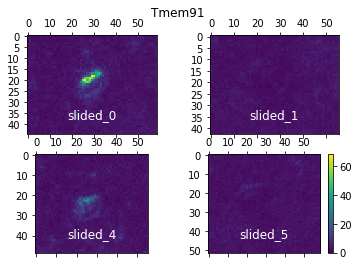

                    clusterID               gene_ident     gene_mass    gene  \
452  slided_0_1_2_3_4_5_6_7_8  mass_14974_088228219027  14974.088228  Tmem91   
454  slided_0_1_2_3_4_5_6_7_8   mass_14975_59736143235  14975.597361  Tmem91   
460  slided_0_1_2_3_4_5_6_7_8  mass_14977_106494645675  14977.106495  Tmem91   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
452    14975.6003  -1.791260  4.729918e-27  609   609  5.576148  3.124545   
454    14975.6003  -1.822422  4.424502e-27  609   609  6.212444  3.458629   
460    14975.6003  -1.839503  4.424502e-27  609   609  6.820620  3.773965   

     num_bg  anum_bg   mean_bg  median_bg  
452     385      385  1.611059   1.503611  
454     385      385  1.756545   1.617447  
460     385      385  1.905804   1.736142  


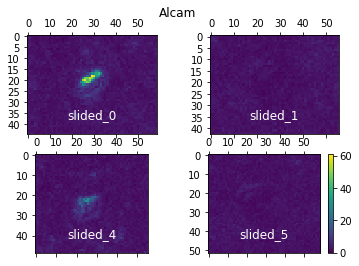

                    clusterID               gene_ident     gene_mass   gene  \
450  slided_0_1_2_3_4_5_6_7_8  mass_14972_579095005702  14972.579095  Alcam   
451  slided_0_1_2_3_4_5_6_7_8  mass_14974_088228219027  14974.088228  Alcam   
455  slided_0_1_2_3_4_5_6_7_8   mass_14975_59736143235  14975.597361  Alcam   
461  slided_0_1_2_3_4_5_6_7_8  mass_14977_106494645675  14977.106495  Alcam   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
450    14974.2307  -1.725587  6.777513e-27  609   609  4.696977  2.680670   
451    14974.2307  -1.791260  4.729918e-27  609   609  5.576148  3.124545   
455    14974.2307  -1.822422  4.424502e-27  609   609  6.212444  3.458629   
461    14974.2307  -1.839503  4.424502e-27  609   609  6.820620  3.773965   

     num_bg  anum_bg   mean_bg  median_bg  
450     385      383  1.420251   1.333938  
451     385      385  1.611059   1.503611  
455     385      385  1.756545   1.617447  
461     385      385  1.905804   1.736142 

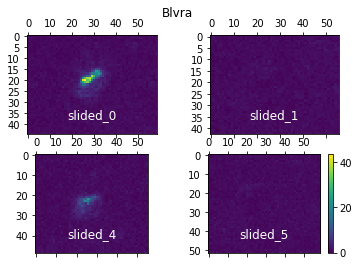

                    clusterID               gene_ident     gene_mass   gene  \
652  slided_0_1_2_3_4_5_6_7_8   mass_15621_50637673513  15621.506377  Blvra   
655  slided_0_1_2_3_4_5_6_7_8  mass_15623_015509948455  15623.015510  Blvra   
660  slided_0_1_2_3_4_5_6_7_8  mass_15624_524643161778  15624.524643  Blvra   
663  slided_0_1_2_3_4_5_6_7_8  mass_15626_033776375103  15626.033776  Blvra   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
652    15623.5841  -1.905700  2.541757e-20  609   608  3.572015  1.698552   
655    15623.5841  -1.805337  9.407847e-20  609   608  3.208385  1.529585   
660    15623.5841  -1.735413  2.595735e-19  609   608  2.950561  1.443420   
663    15623.5841  -1.687653  6.178117e-19  609   607  2.693090  1.322438   

     num_bg  anum_bg   mean_bg  median_bg  
652     385      384  0.953324   0.912347  
655     385      382  0.917964   0.871814  
660     385      382  0.886123   0.870165  
663     385      380  0.836020   0.820388 

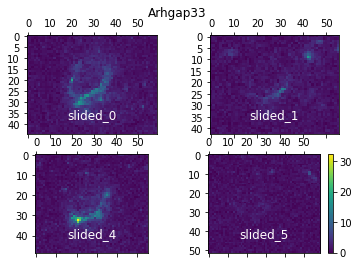

                    clusterID               gene_ident     gene_mass  \
281  slided_0_1_2_3_4_5_6_7_8  mass_10158_444144501342  10158.444145   
282  slided_0_1_2_3_4_5_6_7_8  mass_10159_953277714667  10159.953278   
283  slided_0_1_2_3_4_5_6_7_8   mass_10161_46241092799  10161.462411   
286  slided_0_1_2_3_4_5_6_7_8  mass_10162_971544141314  10162.971544   

         gene  protein_mass  avg_logFC        qvalue  num  anum      mean  \
281  Arhgap33    10161.2224  -0.941516  3.382317e-44  609   609  2.407058   
282  Arhgap33    10161.2224  -1.051934  4.556424e-49  609   609  3.251319   
283  Arhgap33    10161.2224  -1.056738  6.047560e-48  609   609  4.155373   
286  Arhgap33    10161.2224  -1.017893  2.231811e-44  609   609  4.844238   

       median  num_bg  anum_bg   mean_bg  median_bg  
281  2.062794     385      380  1.253320   1.129740  
282  2.651257     385      381  1.568181   1.393429  
283  3.315275     385      383  1.997561   1.658074  
286  3.791472     385      383  2.392

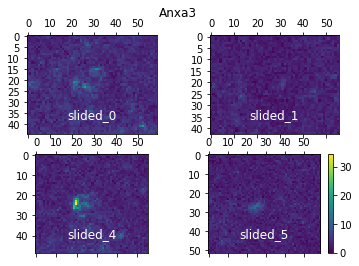

                  clusterID               gene_ident    gene_mass   gene  \
2  slided_0_1_2_3_4_5_6_7_8  mass_3344_7076863423495  3344.707686  Anxa3   
3  slided_0_1_2_3_4_5_6_7_8  mass_3346_2168195556737  3346.216820  Anxa3   
4  slided_0_1_2_3_4_5_6_7_8   mass_3347_725952768998  3347.725953  Anxa3   
5  slided_0_1_2_3_4_5_6_7_8  mass_3349_2350859823223  3349.235086  Anxa3   

   protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
2     3347.6387  -0.884532  2.993079e-62  609   608  3.131949  2.965962   
3     3347.6387  -1.016701  1.936143e-80  609   609  4.121637  3.689316   
4     3347.6387  -0.945662  1.096852e-69  609   609  4.227552  3.813610   
5     3347.6387  -0.783525  2.439816e-50  609   609  3.684931  3.300750   

   num_bg  anum_bg   mean_bg  median_bg  
2     385      380  1.696461   1.664370  
3     385      385  2.037098   1.966332  
4     385      385  2.194909   2.115562  
5     385      384  2.140744   2.025972  


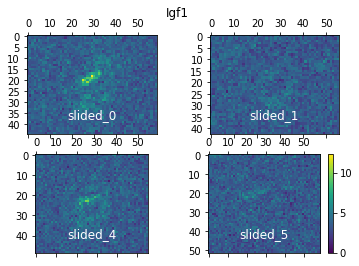

                    clusterID               gene_ident     gene_mass  gene  \
570  slided_0_1_2_3_4_5_6_7_8  mass_15194_421677364367  15194.421677  Igf1   
573  slided_0_1_2_3_4_5_6_7_8   mass_15195_93081057769  15195.930811  Igf1   

     protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
570    15196.5068  -0.537348  1.524620e-40  609   609  2.672643  2.477474   
573    15196.5068  -0.512016  2.261951e-39  609   609  2.692250  2.523374   

     num_bg  anum_bg   mean_bg  median_bg  
570     385      384  1.841547   1.831013  
573     385      384  1.887919   1.882425  


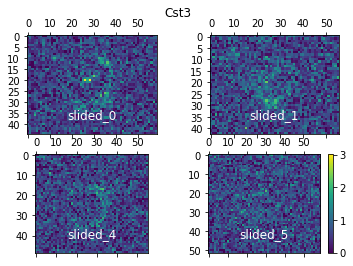

Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []


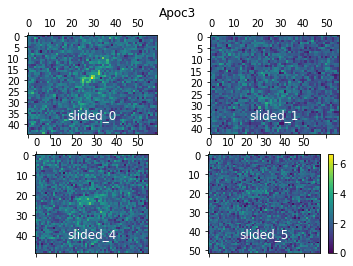

Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []


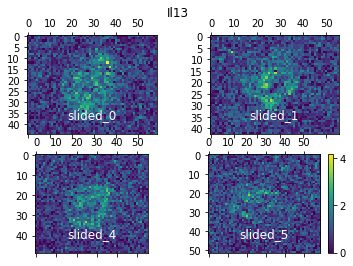

Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []


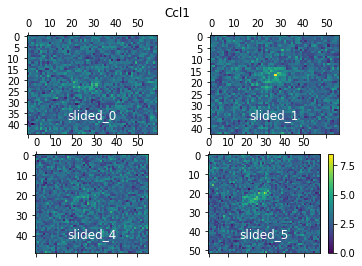

Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []


In [194]:
for protid in ["Mtmr2", "Pla2g2e", "Ccl4", "Ccl6", "Apoa5", "Tmem91", "Alcam", "Blvra", "Arhgap33", "Anxa3", "Igf1", "Cst3", "Apoc3", "Il13", "Ccl1"]: #"Il11", "Cst3", "Tnfrsf12a", "Bcl7c", 
    _ = combSpec.mass_heatmap(pw.get_masses_for_protein(protid), scaled=True, title=protid )
    print(mydf_all.loc[mydf_all.gene == protid,])

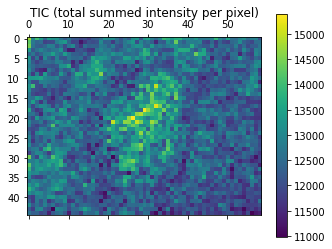

In [195]:
imze.plot_tic(spectra0_intra)

The comparison of both aorta results again in several differential proteins.

Again, several proteins involved in the respiratory metabolism are listed, like Ndufc2, Ndufa11.

Of interest here are Ifitm3, Ccdc126 and Ubl5, which are all located in the inner part of the aorta.

#### Ifitm3

Known gene involved in the innate immune system (T cells): Yánez, D. C., Ross, S., & Crompton, T. (2020). The IFITM protein family in adaptive immunity. In Immunology (Vol. 159, Issue 4, pp. 365–372). Blackwell Publishing Ltd. https://doi.org/10.1111/imm.13163

Ifitm3 is involved in the plaque uptake in Alzheimer's disease: Hur, J. Y., Frost, G. R., Wu, X., Crump, C., Pan, S. J., Wong, E., Barros, M., Li, T., Nie, P., Zhai, Y., Wang, J. C., Tcw, J., Guo, L., McKenzie, A., Ming, C., Zhou, X., Wang, M., Sagi, Y., Renton, A. E., … Li, Y. M. (2020). The innate immunity protein IFITM3 modulates γ-secretase in Alzheimer’s disease. Nature, 1–6. https://doi.org/10.1038/s41586-020-2681-2


#### Mrps14

Mrps14 effects the mitochondrial translation. 
Hence, again, a disturbation of mitochondrial work can be observed.

Jackson, C. B., Huemer, M., Bolognini, R., Martin, F., Szinnai, G., Donner, B. C., Richter, U., Battersby, B. J., Nuoffer, J. M., Suomalainen, A., & Schaller, A. (2019). A variant in MRPS14 (uS14m) causes perinatal hypertrophic cardiomyopathy with neonatal lactic acidosis, growth retardation, dysmorphic features and neurological involvement. Human Molecular Genetics, 28(4), 639–649. https://doi.org/10.1093/hmg/ddy374

#### Acot13

In chicken it was observed that an Acot13 decreases works as inhibitor during Preadipocytes Differentiation.
Hence, an upregulation of Acot13 leads to an increase in preadipocyte differentiation, which also plays a role in plaque formation.


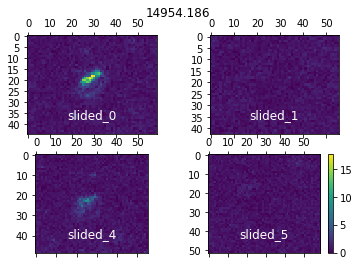

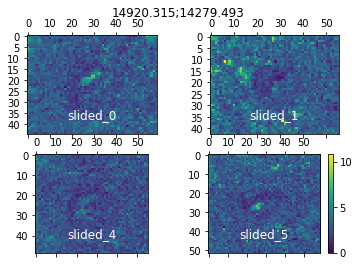

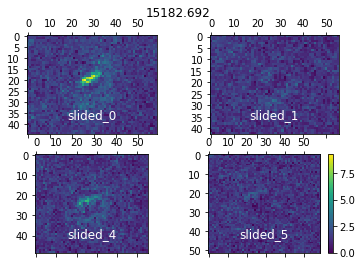

In [196]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Ifitm3"), scaled=True)
_ = combSpec.mass_heatmap(pw.protein2mass.get("Mrps14"), scaled=True)
_ = combSpec.mass_heatmap(pw.protein2mass.get("Acot13"), scaled=True)

In [198]:
#for x in set(mydf_all["gene"]):
#    print(x)
#    _ = combSpec.mass_heatmap(pw.protein2mass.get(x), scaled=True)

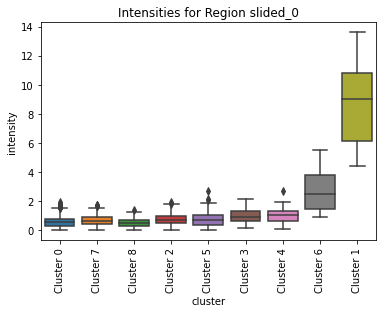

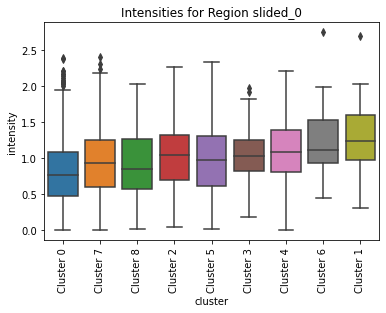

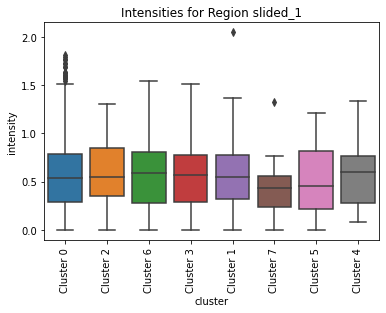

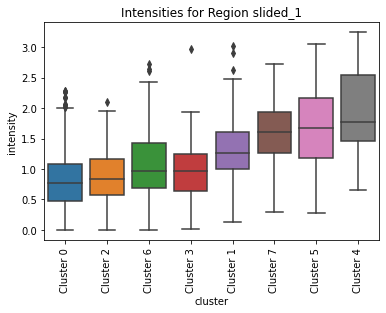

In [199]:
combSpec.mass_intensity(pw.protein2mass.get("Ccdc126"), regions=["slided_0", "slided_1"], scaled=True)

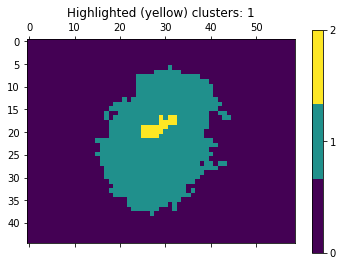

In [200]:
combSpec.regions["slided_0"].plot_segments(highlight=1)

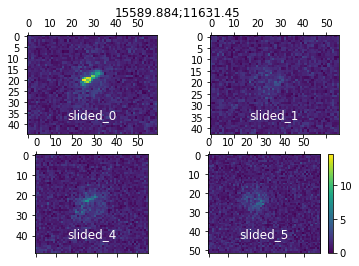

In [201]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Ccdc126"), scaled=True)

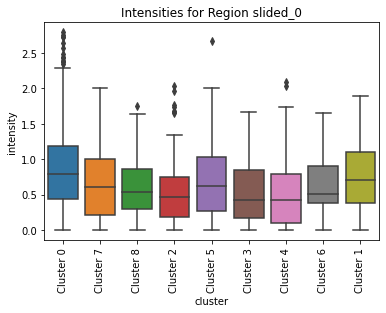

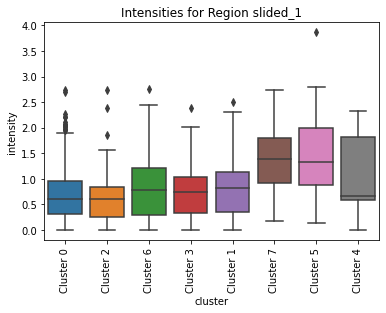

In [202]:
combSpec.mass_intensity(pw.protein2mass.get("Hsbp1"), regions=["slided_0", "slided_1"], scaled=True)

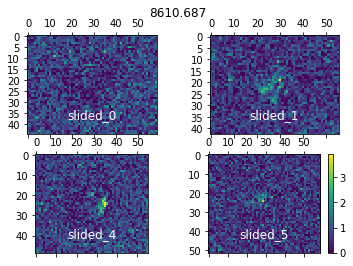

In [203]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Hsbp1"), scaled=True)

## The core DE

In [211]:
slided_0_inner_regions = tuple([1,3,4,6])
slided_1_inner_regions = tuple([4,5,6,7])

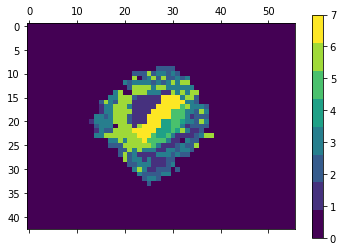

In [208]:
slided_1.plot_segments()

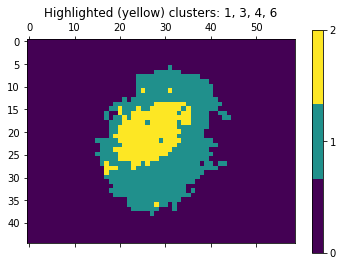

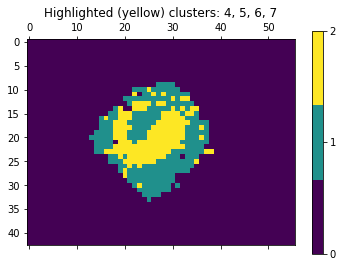

In [215]:
combSpec.regions["slided_0"].plot_segments(highlight=slided_0_inner_regions)
combSpec.regions["slided_1"].plot_segments(highlight=slided_1_inner_regions)

In [216]:
slided_0_inner_regions_de = tuple(sorted([(slided_0.name, x) for x in slided_0_inner_regions]))
slided_1_inner_regions_de = tuple(sorted([(slided_1.name, x) for x in slided_1_inner_regions]))

In [217]:
resdf_inner, expr, pdata = combSpec.find_markers(slided_0_inner_regions_de, slided_1_inner_regions_de, pw, scaled=True)

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [218]:
inner_key =tuple(list(combSpec.to_region_cluster_input(slided_0_inner_regions_de)[0]) + list(combSpec.to_region_cluster_input(slided_1_inner_regions_de)[0])) 

In [219]:
mydf_inner = resdf_inner["ttest"][inner_key]
mydf_inner.to_csv("slide.d.0.{}.1.{}.tsv".format("_".join([str(x) for x in slided_0_inner_regions]), "_".join([str(x) for x in slided_1_inner_regions])), sep="\t")
mydf_inner

clusterID               gene_ident     gene_mass     gene  \
0     slided_0_1_3_4_6  mass_3159_0843011034667   3159.084301    Apoc1   
1     slided_0_1_3_4_6   mass_3204_358297503194   3204.358298  Gm15517   
2     slided_0_1_3_4_6  mass_3337_1620202757285   3337.162020   Zfp787   
3     slided_0_1_3_4_6  mass_3344_7076863423495   3344.707686    Anxa3   
4     slided_0_1_3_4_6  mass_3346_2168195556737   3346.216820    Anxa3   
...                ...                      ...           ...      ...   
1623  slided_0_1_3_4_6  mass_15843_348959093795  15843.348959     Rbp1   
1624  slided_0_1_3_4_6  mass_15843_348959093795  15843.348959  Slc31a2   
1625  slided_0_1_3_4_6  mass_15844_858092307119  15844.858092     Rbp1   
1626  slided_0_1_3_4_6  mass_15844_858092307119  15844.858092     Nxt1   
1627  slided_0_1_3_4_6  mass_15844_858092307119  15844.858092   Zfp850   

      protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
0        3160.8824   0.565882  1.189570e-05  168   165  1.035535  0.905855   
1        3206.7303   0.550377  6.119935e-04  168   164  0.831380  0.719590   
2        3338.5922   0.600819  2.084799e-05  168   168  0.843367  0.726076   
3        3347.6387  -1.246998  6.051929e-36  168   168  4.251864  3.979503   
4        3347.6387  -1.405971  4.124418e-41  168   168  5.837720  5.430145   
...            ...        ...           ...  ...   ...       ...       ...   
1623    15845.9437  -0.590996  8.011495e-07  168   168  2.078880  1.611344   
1624    15840.4194  -0.590996  8.011495e-07  168   168  2.078880  1.611344   
1625    15845.9437  -0.526646  3.653572e-06  168   168  2.104842  1.678758   
1626    15846.6449  -0.526646  3.653572e-06  168   168  2.104842  1.678758   
1627    15841.9461  -0.526646  3.653572e-06  168   168  2.104842  1.678758   

      num_bg  anum_bg   mean_bg  median_bg  
0        149      148  1.532895   1.391833  
1        149      143  1.217531   1.055306  
2        149      149  1.279030   1.125822  
3        149      148  1.791412   1.741012  
4        149      149  2.202945   2.136439  
...      ...      ...       ...        ...  
1623     149      149  1.380136   1.175010  
1624     149      149  1.380136   1.175010  
1625     149      149  1.461111   1.260601  
1626     149      149  1.461111   1.260601  
1627     149      149  1.461111   1.260601  

[1628 rows x 15 columns]

In [221]:
print("DE masses", len(set(mydf_inner.gene_mass)))
print("DE up masses", len(set(mydf_inner.loc[mydf_inner.avg_logFC > 0].gene_mass)))
print("DE down masses", len(set(mydf_inner.loc[mydf_inner.avg_logFC < 0].gene_mass)))
print("DE gene", len(set(mydf_inner.gene)))

DE masses 629
DE up masses 111
DE down masses 518
DE gene 465


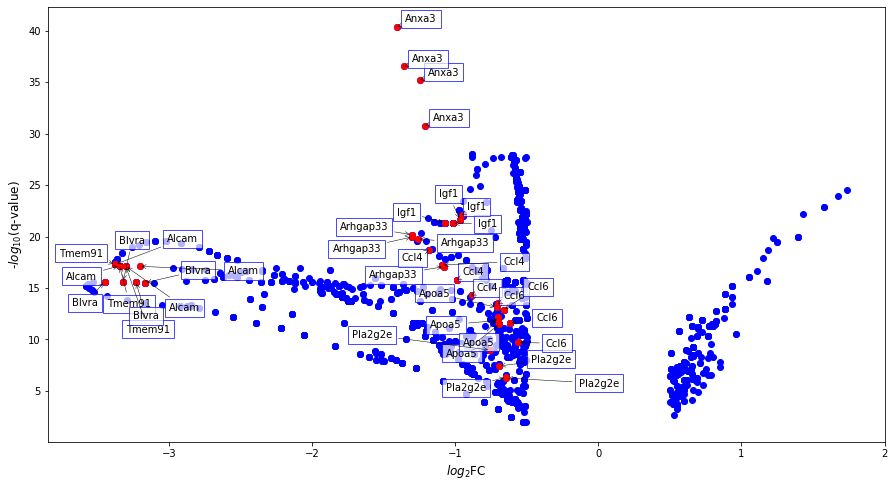

In [222]:
make_volcano_plot(mydf_inner, ["Pla2g2e", "Ccl4", "Ccl6", "Apoa5", "Tmem91", "Alcam", "Blvra", "Arhgap33", "Anxa3", "Igf1"])

Again the same candidates as previously shown can be seen.

Mrps14, Ccdc126, Ndufa11 - which mostly relate to mitochondrial activity.


#### Timm8b
Likewise is Timm8b significantly upregulated.

Timm8b is found to be upregulated in colon mucosa cardinogenesis of diabetes type 2 patients, and is associated with mitochondrial dysfunction.
A similar pattern might be observable in atherosclerosis as well.

Del Puerto-Nevado, L., Santiago-Hernandez, A., Solanes-Casado, S., Gonzalez, N., Ricote, M., Corton, M., Prieto, I., Mas, S., Sanz, A. B., Aguilera, O., Gomez-Guerrero, C., Ayuso, C., Ortiz, A., Rojo, F., Egido, J., Garcia-Foncillas, J., Minguez, P., & Alvarez-Llamas, G. (2019). Diabetes-mediated promotion of colon mucosa carcinogenesis is associated with mitochondrial dysfunction. Molecular Oncology, 13(9), 1887–1897. https://doi.org/10.1002/1878-0261.12531

## GO analysis for plaque-DE experiment

In [ ]:
! wget http://ftp.ebi.ac.uk//pub/databases/GO/goa/HUMAN/goa_human.gaf.gz

In [ ]:
! wget 'http://purl.obolibrary.org/obo/go/go-basic.obo'

In [223]:
import gzip
import Bio.UniProt.GOA as GOA
from goatools.go_enrichment import GOEnrichmentStudy
from goatools import obo_parser

goa_human = "goa_human.gaf.gz"

# File is a gunzip file, so we need to open it in this way
with gzip.open(goa_human, 'rt') as arab_gaf_fp:
    human_funcs = {}  # Initialise the dictionary of functions
    
    # Iterate on each function using Bio.UniProt.GOA library.
    for entry in GOA.gafiterator(arab_gaf_fp):
        uniprot_id = entry.pop('DB_Object_Symbol')
        human_funcs[uniprot_id] = entry

        
go = obo_parser.GODag("go-basic.obo")


go-basic.obo: fmt(1.2) rel(2020-09-10) 47,314 GO Terms


In [224]:

pop = [x.upper() for x in pw_theo.protein2mass]
assoc = {}

for x in human_funcs:
    if x not in assoc:
        assoc[x] = set()
    assoc[x].add(str(human_funcs[x]['GO_ID']))

methods = ["bonferroni", "fdr"]



In [228]:
for elemdf in [mydf_all, mydf_vessel, mydf_inner, mydf_outer]:
    study = list(set([x.upper() for x in elemdf["gene"]])) #mydf_all

    g = GOEnrichmentStudy(pop, assoc, go,
                             propagate_counts=False,
                             alpha=0.05,
                             methods=['bonferroni', 'fdr_bh'])

    g_vessel = g.run_study(study)




Load GOEA Gene Ontology Analysis ...
 69%  5,014 of  7,283 population items found in association

Run GOEA Gene Ontology Analysis: current study set of 264 IDs ... 75%    198 of    264 study items found in association
100%    264 of    264 study items found in population(7283)
Calculating 2,054 uncorrected p-values using fisher
   2,054 GO terms are associated with  5,014 of  7,283 population items
     164 GO terms are associated with    198 of    264 study items
  METHOD bonferroni:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): local bonferroni
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Load GOEA Gene Ontology

In [230]:
for x in sorted(g_vessel, key=lambda x: (x.study_count, -x.p_uncorrected), reverse=True):
    if x.study_count > 10:
        print(x.study_count, x)

In [231]:
atheroGenes = ['ABCA1', 'APOA1', 'PON1', 'CRP', 'OLR1', 'PLA2G7', 'SCARB1', 'APOB', 'ABCG1', 'PCSK9', 'ADIPOQ', 'LPA', 'CETP', 'CD36', 'CCL2', 'PLTP', 'MPO', 'APOE', 'PON2', 'KLF2', 'CX3CR1', 'LDLR', 'VCAM1', 'NOS3', 'AGER', 'CX3CL1', 'AHSG', 'PPARD', 'FABP4', 'EDN1', 'ICAM1', 'LIPG', 'NR1H3', 'RETN', 'PTX3', 'TLR4', 'HSPD1', 'SELP', 'NR4A3', 'PPARG', 'F3', 'APOM', 'SREBF2', 'TNFRSF11B', 'APOC3', 'LCAT', 'PPARA', 'LPL', 'PAPPA', 'APOA5', 'CD40LG', 'SAA1', 'ALOX15', 'TOR2A', 'LEP', 'GGT1', 'CD40', 'PON3', 'ALOX15B', 'TXN', 'NLRP3', 'GP6', 'NOX1', 'ITGB2', 'CHIT1', 'LRP1', 'PLA2G2A', 'CDH5', 'PHACTR1', 'TFPI', 'NOX4', 'NR1H2', 'PDE4D', 'HMOX1', 'C5', 'USF1', 'CCR2', 'MMP8', 'APOA2', 'ACE2', 'ALOX5', 'ALOX5AP', 'THBD', 'KL', 'SIRT1', 'ITGAM', 'APLN', 'MSR1', 'AGTR2', 'TNF', 'IL6', 'STAT1', 'NR4A1', 'TNFSF4', 'MAPK14', 'CYBA', 'AGT', 'APOA4', 'NAMPT', 'MAPK8', 'LIPC', 'SERPINE1', 'PRKCB', 'MMP9', 'PRKAA1', 'RBP4', 'SELL', 'NFE2L2', 'NR1H4', 'SELE', 'CD14', 'ANGPTL4', 'ITLN1', 'GCKR', 'EDNRA', 'TLR2', 'IL33', 'TNFSF12', 'UCP2', 'SOST', 'PPARGC1A', 'PECAM1', 'FGB', 'CYBB', 'CXCR2', 'MIF', 'CST3', 'NFKB1', 'KLF4', 'NPPB', 'VWF', 'AGTR1', 'NPY', 'HMGB1', 'FGF23', 'CDKN2B', 'CCR7', 'SERPINF1', 'TIMP3', 'CAV1', 'IL18', 'GDF15', 'BSG', 'IL17A', 'DPP4',]

In [232]:
inflammationGenes = ['Abcc1', 'Abcd1', 'Abcd2', 'Abhd12', 'Abr', 'Ace', 'Acer3', 'Ackr1', 'Ackr1', 'Ackr2', 'Ackr2', 'Acod1', 'Acod1', 'Acp5', 'Ada', 'Ada', 'Ada', 'Ada', 'Ada', 'Adam8', 'Adam8', 'Adam8', 'Adam8', 'Adam8', 'Adam17', 'Adamts12', 'Adcy1', 'Adcy7', 'Adcy8', 'Adcyap1', 'Adcyap1', 'Adipoq', 'Adora1', 'Adora1', 'Adora2a', 'Adora2a', 'Adora2b', 'Adora3', 'Adora3', 'Adora3', 'Adora3', 'Adra2a', 'Adrb2', 'Afap1l2', 'Afap1l2', 'Ager', 'Ager', 'Ager', 'Ager', 'Ager', 'Ager', 'Ager', 'Agt', 'Agt', 'Agt', 'Agtr1a', 'Agtr1a', 'Agtr1b', 'Agtr1b', 'Agtr2', 'Agtr2', 'Agtr2', 'Ahcy', 'Ahsg', 'Ahsg', 'Aif1', 'Aim2', 'Aimp1', 'Ak7', 'Akna', 'Akt1', 'Aldh2', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5ap', 'Alox5ap', 'Alox15', 'Ankrd42', 'Ano6', 'Anxa1', 'Anxa1', 'Anxa1', 'Anxa1', 'Aoah', 'Aoah', 'Aoc3', 'Aoc3', 'Ap3b1', 'Apoa1', 'Apod', 'Apoe', 'App', 'App', 'App', 'App', 'Appl1', 'Appl2', 'Arel1', 'Ash1l', 'Ash1l', 'Atm', 'Atrn', 'Axl', 'B4galt1', 'Bap1', 'Bap1', 'Bcl6', 'Bcl6', 'Bcl6', 'Bcl6b', 'Bcr', 'Bdkrb1', 'Bdkrb2', 'Bst1', 'Btk', 'Btk', 'Btk', 'C1qa', 'C1qa', 'C1qtnf3', 'C1qtnf12', 'C2cd4a', 'C2cd4a', 'C2cd4b', 'C2cd4b', 'C3', 'C3', 'C3', 'C3ar1', 'C5ar1', 'C5ar1', 'C5ar1', 'C5ar2', 'Calca', 'Calcrl', 'Camk1d', 'Camk4', 'Camp', 'Casp1', 'Casp1', 'Casp1', 'Casp1', 'Casp4', 'Casp4', 'Casp4', 'Casp6', 'Casp12', 'Ccl1', 'Ccl1', 'Ccl2', 'Ccl2', 'Ccl3', 'Ccl3', 'Ccl4', 'Ccl4', 'Ccl5', 'Ccl5', 'Ccl5', 'Ccl5', 'Ccl6', 'Ccl7', 'Ccl8', 'Ccl9', 'Ccl11', 'Ccl12', 'Ccl12', 'Ccl12', 'Ccl17', 'Ccl19', 'Ccl20', 'Ccl21a', 'Ccl21b', 'Ccl21c', 'Ccl22', 'Ccl24', 'Ccl24', 'Ccl25', 'Ccl26', 'Ccn3', 'Ccn4', 'Ccr1', 'Ccr1', 'Ccr1l1', 'Ccr2', 'Ccr2', 'Ccr2', 'Ccr2', 'Ccr2', 'Ccr2', 'Ccr3', 'Ccr4', 'Ccr5', 'Ccr5', 'Ccr5', 'Ccr6', 'Ccr7', 'Ccr7', 'Ccr7', 'Ccrl2', 'Ccrl2', 'Cd5l', 'Cd6', 'Cd6', 'Cd14', 'Cd14', 'Cd24a', 'Cd24a', 'Cd24a', 'Cd24a', 'Cd24a', 'Cd28', 'Cd40', 'Cd40', 'Cd40lg', 'Cd44', 'Cd44', 'Cd44', 'Cd47', 'Cd47', 'Cd47', 'Cd68', 'Cd81', 'Cd96', 'Cd96', 'Cd163', 'Cd163', 'Cd180', 'Cd200', 'Cd200', 'Cd200', 'Cd200r1', 'Cd200r1', 'Cd200r2', 'Cd200r3', 'Cd200r4', 'Cd276', 'Cd300a', 'Cdh5', 'Cdk19', 'Cebpa', 'Cebpb', 'Cebpb', 'Cela1', 'Cers6', 'Cfh', 'Cfh', 'Cfh', 'Chia1', 'Chia1', 'Chid1', 'Chil1', 'Chil3', 'Chil4', 'Chrna7', 'Chrna7', 'Chst1', 'Chst2', 'Chst4', 'Ciita', 'Clcf1', 'Clec10a', 'Clec10a', 'Clock', 'Clu', 'Cma1', 'Cmklr1', 'Cnr1', 'Cnr1', 'Cnr2', 'Cnr2', 'Cntf', 'Cntf', 'Cr2', 'Crh', 'Crh', 'Crhbp', 'Crlf2', 'Crp', 'Csf1', 'Csf1r', 'Cspg4', 'Csrp3', 'Cst7', 'Cst7', 'Ctla2a', 'Ctnnbip1', 'Ctsc', 'Ctss', 'Cuedc2', 'Cuedc2', 'Cx3cl1', 'Cx3cl1', 'Cx3cl1', 'Cx3cl1', 'Cx3cr1', 'Cx3cr1', 'Cx3cr1', 'Cxcl1', 'Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl3', 'Cxcl5', 'Cxcl5', 'Cxcl9', 'Cxcl10', 'Cxcl13', 'Cxcl15', 'Cxcl15', 'Cxcl17', 'Cxcl17', 'Cxcr2', 'Cxcr3', 'Cxcr6', 'Cyba', 'Cybb', 'Cyld', 'Cyp19a1', 'Cyp26b1', 'Cysltr1', 'Cysltr1', 'Dab2ip', 'Dagla', 'Daglb', 'Ddt', 'Ddx3x', 'Dhx9', 'Dhx9', 'Dicer1', 'Dnase1', 'Dnase1l3', 'Dpep1', 'Drosha', 'Duoxa1', 'Duoxa2', 'Dusp10', 'Ecm1', 'Ednra', 'Ednrb', 'Egfr', 'Egfr', 'Eif2ak1', 'Elane', 'Elane', 'Elane', 'Elf3', 'Elf3', 'Enpp3', 'Epha2', 'Ephb6', 'Ephx2', 'Ephx2', 'Esr1', 'Ets1', 'Ets1', 'Ext1', 'F2', 'F2', 'F2r', 'F2r', 'F2rl1', 'F3', 'F8', 'F12', 'F12', 'F630003A18Rik', 'Fabp4', 'Fabp4', 'Fanca', 'Fancd2', 'Fcer1a', 'Fcer1g', 'Fcer1g', 'Fcer1g', 'Fcer1g', 'Fcer1g', 'Fcgr1', 'Fcgr1', 'Fcgr1', 'Fcgr1', 'Fcgr2b', 'Fcgr2b', 'Fcgr2b', 'Fcgr3', 'Fcgr3', 'Fcgr3', 'Fcgr3', 'Fcgr3', 'Fem1a', 'Fem1a', 'Fem1a', 'Fem1al', 'Ffar2', 'Ffar2', 'Ffar2', 'Ffar2', 'Ffar3', 'Ffar3', 'Ffar4', 'Ffar4', 'Fgfr1', 'Fn1', 'Fndc4', 'Fndc4', 'Foxf1', 'Foxp3', 'Foxp3', 'Foxp3', 'Fpr1', 'Fpr2', 'Fpr2', 'Fpr2', 'Fpr2', 'Fpr3', 'Fpr-rs3', 'Fpr-rs4', 'Fpr-rs6', 'Fpr-rs7', 'Fut7', 'Fut7', 'Fut7', 'Gal', 'Gata3', 'Gbp5', 'Gbp5', 'Ggt1', 'Ggt1', 'Ggt5', 'Ggt5', 'Ghrl', 'Ghrl', 'Ghsr', 'Gja1', 'Gm1987', 'Gm5849', 'Gm5849', 'Gper1', 'Gper1', 'Gpr4', 'Gpr17', 'Gpr17', 'Gpr31b', 'Gpr33', 'Gprc5b', 'Gps2', 'Gpsm3', 'Gpsm3', 'Gpsm3', 'Gpx1', 'Gpx2', 'Gpx4', 'Grn', 'Grn', 'Grn', 'Grn', 'Grn', 'Grn', 'Grn', 'Gsdmd', 'Gstp1', 'H2-T23', 'H2bc1', 'Hamp', 'Havcr2', 'Hc', 'Hc', 'Hck', 'Hdac5', 'Hdac7', 'Hdac9', 'Hgf', 'Hif1a', 'Hif1a', 'Hk1', 'Hmgb1', 'Hmgb2', 'Hmgb2', 'Hmox1', 'Hnrnpa0', 'Hp', 'Hp', 'Hps1', 'Hrh4', 'Hrh4', 'Hrh4', 'Hspd1', 'Hyal1', 'Hyal2', 'Hyal2', 'Hyal3', 'Icam1', 'Ido1', 'Ido1', 'Ido1', 'Ier3', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifngr1', 'Ifngr1', 'Ifngr1', 'Ifngr2', 'Igf1', 'Igh-7', 'Igh-7', 'Igh-8', 'Ighg1', 'Ighg1', 'Ighg1', 'Ighg2a', 'Ighg2a', 'Ighg2a', 'Ighg2b', 'Ighg2b', 'Il1a', 'Il1a', 'Il1a', 'Il1a', 'Il1b', 'Il1b', 'Il1b', 'Il1b', 'Il1b', 'Il1b', 'Il1f5', 'Il1f5', 'Il1f6', 'Il1f6', 'Il1f6', 'Il1f8', 'Il1f8', 'Il1f9', 'Il1f9', 'Il1f10', 'Il1f10', 'Il1r1', 'Il1r1', 'Il1r1', 'Il1r2', 'Il1rap', 'Il1rl1', 'Il1rl2', 'Il1rl2', 'Il1rl2', 'Il1rn', 'Il1rn', 'Il1rn', 'Il1rn', 'Il2', 'Il2ra', 'Il2ra', 'Il2ra', 'Il2ra', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4ra', 'Il5ra', 'Il6', 'Il6', 'Il6', 'Il6', 'Il10', 'Il10', 'Il10', 'Il10', 'Il12b', 'Il13', 'Il13', 'Il13', 'Il16', 'Il17a', 'Il17a', 'Il17a', 'Il17a', 'Il17a', 'Il17b', 'Il17b', 'Il17c', 'Il17c', 'Il17c', 'Il17d', 'Il17d', 'Il17f', 'Il17f', 'Il17f', 'Il17f', 'Il17ra', 'Il17ra', 'Il17ra', 'Il17rb', 'Il17rc', 'Il17rc', 'Il17re', 'Il18', 'Il18', 'Il18r1', 'Il18rap', 'Il20rb', 'Il20rb', 'Il22', 'Il22ra2', 'Il23a', 'Il23r', 'Il25', 'Il25', 'Il25', 'Il25', 'Il27', 'Il31ra', 'Il33', 'Il33', 'Il33', 'Il34', 'Ins2', 'Ins2', 'Ins2', 'Irak2', 'Irf3', 'Irf5', 'Isl1', 'Itga2', 'Itgam', 'Itgam', 'Itgam', 'Itgav', 'Itgb1', 'Itgb2', 'Itgb2l', 'Itgb6', 'Itgb6', 'Itih4', 'Jak2', 'Jak2', 'Jak2', 'Jam3', 'Jun', 'Kars', 'Kdm6b', 'Kit', 'Kl', 'Klk1b1', 'Klkb1', 'Klrh1', 'Kng1', 'Kpna6', 'Krt1', 'Krt1', 'Krt16', 'Lacc1', 'Lacc1', 'Lat', 'Lat', 'Lbp', 'Lbp', 'Lbp', 'Lbp', 'Ldlr', 'Ldlr', 'Ldlr', 'Lep', 'Lgals9', 'Lias', 'Lilra5', 'Lilrb4a', 'Lilrb4a', 'Lipa', 'Loxl3', 'Loxl3', 'Lpcat3', 'Lpl', 'Lrfn5', 'Lrp1', 'Lrrc19', 'Lrrk2', 'Lta', 'Lta', 'Ltb4r1', 'Ltb4r2', 'Lxn', 'Ly86', 'Ly96', 'Lyn', 'Lyn', 'Lyn', 'Macir', 'Macir', 'Macir', 'Macir', 'Map2k3', 'Mapk8', 'Mapk14', 'Mapkapk2', 'Mapkapk2', 'Mas1', 'Mas1', 'Mcph1', 'Mdk', 'Mdk', 'Mdk', 'Mdk', 'Mdk', 'Mecom', 'Mefv', 'Mefv', 'Mefv', 'Mep1b', 'Metrnl', 'Mfhas1', 'Mfhas1', 'Mfhas1', 'Mgll', 'Mif', 'Mif', 'Mir21a', 'Mir147', 'Mir155', 'Mir301', 'Mir324', 'Mir883b', 'Mir883b', 'Mir7116', 'Mir7116', 'Mir7578', 'Mmp8', 'Mmp8', 'Mmp8', 'Mmp8', 'Mmp25', 'Mrgpra3', 'Ms4a2', 'Msmp', 'Muc19', 'Muc19', 'Muc19', 'Muc19', 'Muc19', 'Mvk', 'Myd88', 'Myd88', 'Myd88', 'Myd88', 'Mylk3', 'Naip1', 'Naip2', 'Naip2', 'Naip5', 'Naip5', 'Naip6', 'Naip6', 'Naip7', 'Nampt', 'Napepld', 'Ncf1', 'Ndfip1', 'Ndst1', 'Ndufc2', 'Ndufs4', 'Nfe2l1', 'Nfe2l2', 'Nfkb1', 'Nfkbia', 'Nfkbid', 'Nfkbiz', 'Nfkbiz', 'Nlrc3', 'Nlrc3', 'Nlrc3', 'Nlrc4', 'Nlrc4', 'Nlrp1a', 'Nlrp1b', 'Nlrp1b', 'Nlrp3', 'Nlrp3', 'Nlrp3', 'Nlrp3', 'Nlrp3', 'Nlrp4a', 'Nlrp4b', 'Nlrp4c', 'Nlrp4e', 'Nlrp4f', 'Nlrp6', 'Nlrp6', 'Nlrp6', 'Nlrp6', 'Nlrp9a', 'Nlrp9b', 'Nlrp9c', 'Nlrp10', 'Nlrp10', 'Nlrp12', 'Nlrp12', 'Nlrx1', 'Nod2', 'Nod2', 'Nod2', 'Nod2', 'Nos2', 'Nos2', 'Nos2', 'Notch1', 'Notch2', 'Nppa', 'Npy5r', 'Npy5r', 'Nr1d1', 'Nr1d1', 'Nr1d1', 'Nr1d1', 'Nr1d2', 'Nr1d2', 'Nr1h3', 'Nr1h3', 'Nr1h4', 'Nr1h4', 'Nr1h4', 'Nrros', 'Nt5e', 'Nupr1', 'Nupr1', 'Odam', 'Olr1', 'Olr1', 'Orm1', 'Orm2', 'Osm', 'Otulin', 'Otulin', 'Otulin', 'P2rx1', 'P2rx7', 'P2rx7', 'Park7', 'Park7', 'Park7', 'Parp4', 'Pbk', 'Pdcd4', 'Pdcd4', 'Pdcd4', 'Pdcd4', 'Pde2a', 'Pde5a', 'Per1', 'Pf4', 'Pglyrp1', 'Pglyrp2', 'Pik3ap1', 'Pik3cd', 'Pik3cg', 'Pik3cg', 'Pja2', 'Pla2g2d', 'Pla2g2d', 'Pla2g2e', 'Pla2g3', 'Pla2g3', 'Pla2g3', 'Pla2g3', 'Pla2g3', 'Pla2g4a', 'Pla2g5', 'Pla2g7', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Plaa', 'Pld3', 'Pld3', 'Pld4', 'Pld4', 'Plgrkt', 'Plp1', 'Pmp22', 'Pnma1', 'Polb', 'Ppara', 'Ppara', 'Ppara', 'Ppard', 'Ppard', 'Pparg', 'Pparg', 'Pparg', 'Pparg', 'Pparg', 'Ppbp', 'Ppbp', 'Prcp', 'Prdx2', 'Prkca', 'Prkcq', 'Prkcz', 'Prkd1', 'Proc', 'Psen1', 'Psen1', 'Psma1', 'Psma1', 'Psmb4', 'Pstpip1', 'Ptafr', 'Ptgdr', 'Ptgdr', 'Ptger1', 'Ptger2', 'Ptger3', 'Ptger3', 'Ptger3', 'Ptger3', 'Ptger4', 'Ptger4', 'Ptger4', 'Ptger4', 'Ptger4', 'Ptger4', 'Ptges', 'Ptges', 'Ptgfr', 'Ptgir', 'Ptgis', 'Ptgs1', 'Ptgs2', 'Ptgs2', 'Ptgs2', 'Ptgs2', 'Ptn', 'Ptpn2', 'Pxk', 'Pycard', 'Pycard', 'Pycard', 'Pycard', 'Rabgef1', 'Rarres2', 'Rarres2', 'Rasgrp1', 'Rb1', 'Rbpj', 'Reg3a', 'Reg3a', 'Reg3b', 'Reg3b', 'Reg3g', 'Reg3g', 'Rel', 'Rela', 'Rela', 'Rela', 'Rela', 'Relb', 'Rhbdd3', 'Rictor', 'Ripk1', 'Ripk1', 'Ripk1', 'Rora', 'Rora', 'Rps6ka4', 'Rps6ka5', 'Rps19', 'Rps19', 'Rtn4', 'S1pr3', 'S100a7a', 'S100a7a', 'S100a8', 'S100a8', 'S100a8', 'S100a8', 'S100a8', 'S100a9', 'S100a9', 'S100a9', 'S100a9', 'S100a9', 'S100a9', 'Saa1', 'Saa2', 'Saa3', 'Saa4', 'Sbno2', 'Sbno2', 'Sbno2', 'Scgb1a1', 'Scn9a', 'Scyl1', 'Scyl1', 'Scyl3', 'Sdc1', 'Seh1l', 'Sele', 'Selenos', 'Selenos', 'Selp', 'Sema7a', 'Sema7a', 'Sema7a', 'Serpina1b', 'Serpina3n', 'Serpinb1a', 'Serpinb9', 'Serpine1', 'Serpine1', 'Serpinf1', 'Serpinf2', 'Setd6', 'Sgms1', 'Sharpin', 'Shpk', 'Sigirr', 'Siglece', 'Siglecg', 'Siglecg', 'Sirpa', 'Sirpa', 'Sirpa', 'Slamf1', 'Slamf8', 'Slamf8', 'Slc7a2', 'Slc7a2', 'Slc7a2', 'Slc11a1', 'Slit2', 'Smad3', 'Smo', 'Smpdl3b', 'Smpdl3b', 'Snap23', 'Snca', 'Snca', 'Snx4', 'Socs3', 'Socs5', 'Sod1', 'Spata2', 'Sphk1', 'Sphk1', 'Sphk1', 'Sphk1', 'Spn', 'Stab1', 'Stap1', 'Stard7', 'Stard7', 'Stat3', 'Stat3', 'Stat3', 'Stat5a', 'Stat5b', 'Stat5b', 'Sting1', 'Stk39', 'Sucnr1', 'Syk', 'Syt11', 'Tac1', 'Tac1', 'Tac1', 'Tac4', 'Tafa3', 'Tafa3', 'Tafa3', 'Tafa3', 'Tarm1', 'Tbc1d23', 'Tbxa2r', 'Tbxa2r', 'Tcirg1', 'Tff2', 'Tff2', 'Tgfb1', 'Tgfb1', 'Tgfb1', 'Tgm2', 'Thbs1', 'Thbs1', 'Themis2', 'Ticam1', 'Ticam1', 'Ticam1', 'Ticam2', 'Timp1', 'Tirap', 'Tlr1', 'Tlr1', 'Tlr2', 'Tlr2', 'Tlr2', 'Tlr2', 'Tlr2', 'Tlr3', 'Tlr3', 'Tlr3', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr5', 'Tlr6', 'Tlr6', 'Tlr6', 'Tlr6', 'Tlr6', 'Tlr7', 'Tlr8', 'Tlr8', 'Tlr9', 'Tlr9', 'Tlr9', 'Tlr9', 'Tlr11', 'Tlr12', 'Tlr13', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnfaip3', 'Tnfaip3', 'Tnfaip3', 'Tnfaip3', 'Tnfaip3', 'Tnfaip6', 'Tnfaip6', 'Tnfaip8l2', 'Tnfaip8l2', 'Tnfrsf1a', 'Tnfrsf1a', 'Tnfrsf1a', 'Tnfrsf1a', 'Tnfrsf1a', 'Tnfrsf1b', 'Tnfrsf1b', 'Tnfrsf1b', 'Tnfrsf1b', 'Tnfrsf1b', 'Tnfrsf4', 'Tnfrsf4', 'Tnfrsf4', 'Tnfrsf11a', 'Tnfsf4', 'Tnfsf4', 'Tnfsf4', 'Tnfsf4', 'Tnfsf4', 'Tnfsf11', 'Tnfsf18', 'Tnip1', 'Tnip1', 'Tnip1', 'Tnip2', 'Tollip', 'Tpsb2', 'Tradd', 'Traf3ip2', 'Trem1', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trex1', 'Trex1', 'Trex1', 'Trex1', 'Tril', 'Trim55', 'Trp73', 'Trpv1', 'Trpv1', 'Trpv4', 'Tslp', 'Tspan2', 'Ttbk1', 'Ttc39aos1', 'Tusc2', 'Tusc2', 'Tyro3', 'Tyrobp', 'Tyrobp', 'Tyrobp', 'Uaca', 'Ulk4', 'Umod', 'Unc13d', 'Usp18', 'Vamp7', 'Vamp8', 'Vnn1', 'Vnn1', 'Vnn1', 'Vps35', 'Wdr83', 'Wdr83', 'Wfdc1', 'Wnt5a', 'Xcl1', 'Xcl1', 'Xcl1', 'Ywhaz', 'Zbp1', 'Zbp1', 'Zc3h12a', 'Zc3h12a', 'Zfp35', 'Zfp36', 'Zfp36', 'Zfp36', 'Zfp580', 'Zp3', 'Zp3']
inflammationGenes = set([str(x).upper() for x in inflammationGenes])

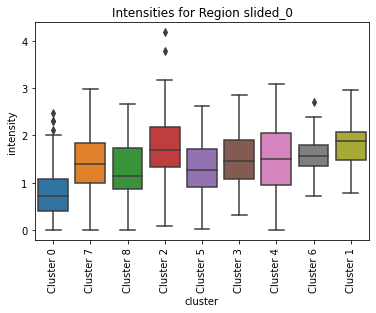

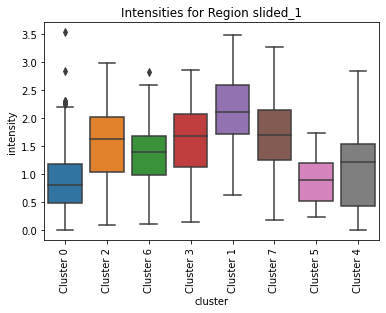

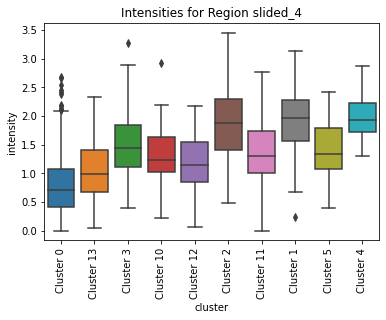

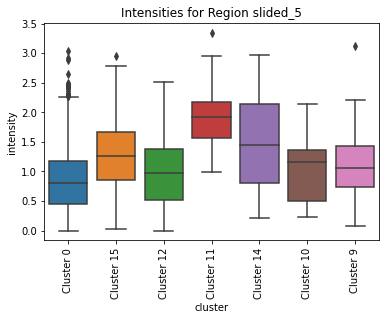

In [233]:
combSpec.mass_intensity(14109, scaled=True)

In [234]:
#myDFGenes_inner = set([str(x).upper() for x in mydf_all["gene"]])
myDFGenes_all = set([str(x).upper() for x in mydf_all["gene"]])
myDFGenes_outer = set([str(x).upper() for x in mydf_vessel["gene"]])

In [235]:
relgenes = set()
for descr, deGenes in [('outer', myDFGenes_outer), ('all', myDFGenes_all)]:
    
    print(descr, "atheroGenes", deGenes.intersection(atheroGenes))
    print(descr, "inflammationGenes", deGenes.intersection(inflammationGenes))
    
    relgenes = relgenes.union(deGenes.intersection(atheroGenes))
    relgenes = relgenes.union(deGenes.intersection(inflammationGenes))

outer atheroGenes {'APOA5', 'ALOX5AP', 'LEP'}
outer inflammationGenes {'PLA2G2E', 'CCL6', 'MSMP', 'CALCA', 'GHRL', 'HAMP', 'LEP', 'ALOX5AP', 'CCL4'}
all atheroGenes {'APOA5', 'ALOX5AP', 'LEP'}
all inflammationGenes {'PLA2G2E', 'CCL6', 'MSMP', 'CALCA', 'GHRL', 'HAMP', 'LEP', 'ALOX5AP', 'CCL4', 'IGF1'}


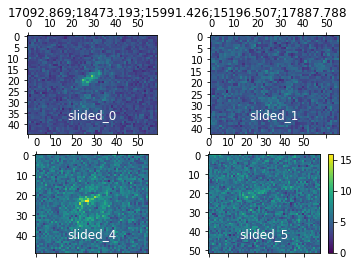

In [236]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Igf1"))

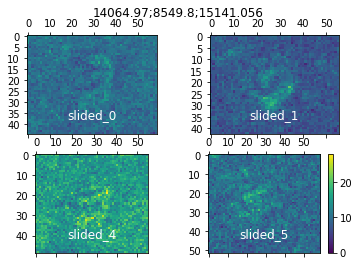

In [237]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Calca"))

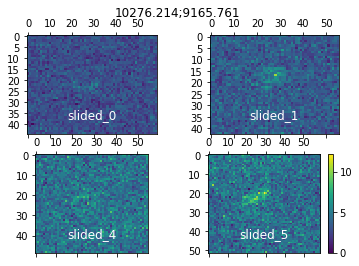

In [238]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl1"))

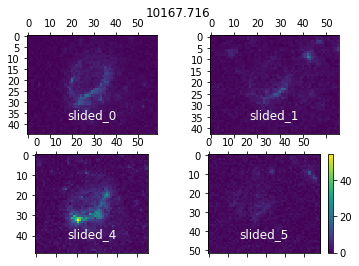

In [239]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl4"))

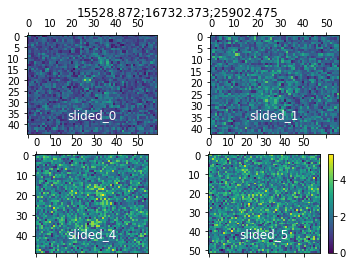

In [241]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl25"))

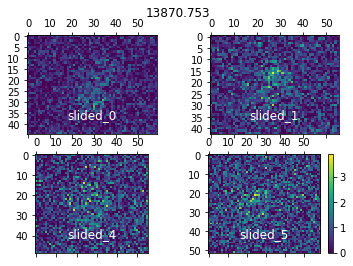

In [242]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl9"))

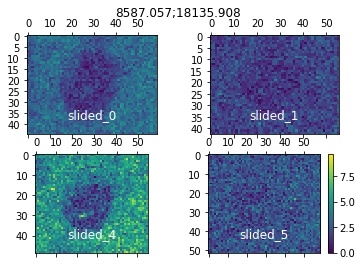

In [243]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Alox5ap"))

ALOX5AP


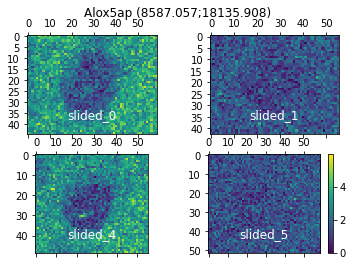

outer         clusterID              gene_ident    gene_mass     gene  protein_mass  \
219  slided_0_2_5  mass_8584_418203004148  8584.418203  Alox5ap     8587.0573   
221  slided_0_2_5  mass_8585_927336217472  8585.927336  Alox5ap     8587.0573   
222  slided_0_2_5  mass_8587_436469430797  8587.436469  Alox5ap     8587.0573   
224  slided_0_2_5  mass_8588_945602644122  8588.945603  Alox5ap     8587.0573   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
219  -0.573785  4.461582e-11  237   236  1.496515  1.442770     171      170   
221  -0.604641  1.450889e-11  237   234  1.363357  1.289210     171      167   
222  -0.650842  1.009294e-11  237   237  1.278017  1.210858     171      165   
224  -0.745556  4.680004e-14  237   237  1.218128  1.158466     171      164   

      mean_bg  median_bg  
219  1.005436   0.953709  
221  0.896591   0.855753  
222  0.813980   0.809374  
224  0.726538   0.655984  
inner Empty DataFrame
Columns: [clusterID, gene_iden

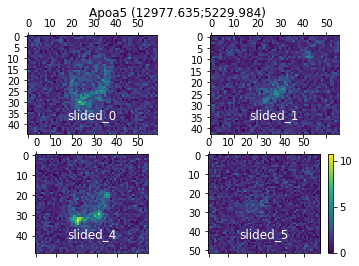

outer         clusterID               gene_ident     gene_mass   gene  protein_mass  \
445  slided_0_2_5  mass_12975_995853777718  12975.995854  Apoa5    12977.6348   
446  slided_0_2_5  mass_12977_504986991042  12977.504987  Apoa5    12977.6348   
451  slided_0_2_5  mass_12979_014120204367  12979.014120  Apoa5    12977.6348   
454  slided_0_2_5   mass_12980_52325341769  12980.523253  Apoa5    12977.6348   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
445  -0.671413  3.379089e-10  237   237  1.797013  1.504328     171      169   
446  -0.624199  4.358943e-09  237   237  1.706762  1.434386     171      170   
451  -0.575051  4.272472e-08  237   236  1.618400  1.406378     171      171   
454  -0.537307  2.071125e-07  237   236  1.479244  1.317589     171      167   

      mean_bg  median_bg  
445  1.128328   0.948269  
446  1.107313   0.928539  
451  1.086371   0.934805  
454  1.019282   0.893986  
inner             clusterID               gene_ident

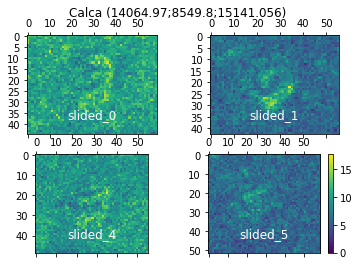

outer         clusterID              gene_ident    gene_mass   gene  protein_mass  \
183  slided_0_2_5  mass_8548_199005884366  8548.199006  Calca     8549.8001   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
183  -0.518731  2.416993e-15  237   237  2.577916  2.491883     171      171   

      mean_bg  median_bg  
183  1.799347   1.694248  
inner              clusterID               gene_ident     gene_mass   gene  \
286   slided_0_1_3_4_6   mass_8548_199005884366   8548.199006  Calca   
1104  slided_0_1_3_4_6   mass_15138_58374847137  15138.583748  Calca   
1105  slided_0_1_3_4_6  mass_15140_092881684694  15140.092882  Calca   
1108  slided_0_1_3_4_6  mass_15141_602014898019  15141.602015  Calca   
1111  slided_0_1_3_4_6  mass_15143_111148111342  15143.111148  Calca   

      protein_mass  avg_logFC        qvalue  num  anum      mean    median  \
286      8549.8001  -0.534705  9.981028e-15  168   168  2.730645  2.745264   
1104    15141.0556  -0.65

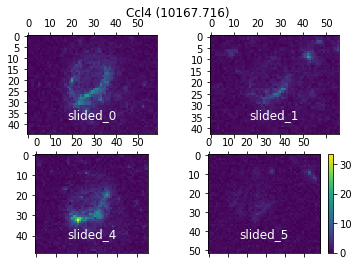

outer         clusterID               gene_ident     gene_mass  gene  protein_mass  \
379  slided_0_2_5  mass_10165_989810567964  10165.989811  Ccl4    10167.7164   
381  slided_0_2_5  mass_10167_498943781287  10167.498944  Ccl4    10167.7164   
385  slided_0_2_5   mass_10169_00807699461  10169.008077  Ccl4    10167.7164   
389  slided_0_2_5  mass_10170_517210207936  10170.517210  Ccl4    10167.7164   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
379  -0.925902  2.199904e-16  237   237  5.453224  4.512772     171      171   
381  -0.812530  1.076335e-13  237   237  4.944123  4.054958     171      171   
385  -0.703982  1.974712e-11  237   237  4.226425  3.388711     171      171   
389  -0.608954  2.030915e-09  237   237  3.485038  2.850953     171      171   

      mean_bg  median_bg  
379  2.870313   2.160934  
381  2.815096   2.105165  
385  2.594500   1.998253  
389  2.285042   1.822123  
inner             clusterID               gene_ident     

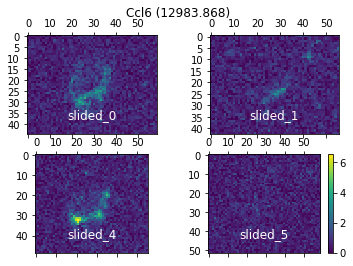

outer         clusterID               gene_ident     gene_mass  gene  protein_mass  \
455  slided_0_2_5  mass_12982_032386631015  12982.032387  Ccl6     12983.868   
457  slided_0_2_5  mass_12983_541519844339  12983.541520  Ccl6     12983.868   
462  slided_0_2_5  mass_12985_050653057664  12985.050653  Ccl6     12983.868   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
455  -0.536891  1.223886e-07  237   236  1.369418  1.188576     171      167   
457  -0.535252  4.742687e-08  237   236  1.329142  1.155425     171      170   
462  -0.514568  9.229012e-08  237   236  1.275982  1.137645     171      169   

      mean_bg  median_bg  
455  0.943878   0.810238  
457  0.917159   0.796945  
462  0.893191   0.799063  
inner             clusterID               gene_ident     gene_mass  gene  \
499  slided_0_1_3_4_6  mass_12982_032386631015  12982.032387  Ccl6   
501  slided_0_1_3_4_6  mass_12983_541519844339  12983.541520  Ccl6   
506  slided_0_1_3_4_6  mass_

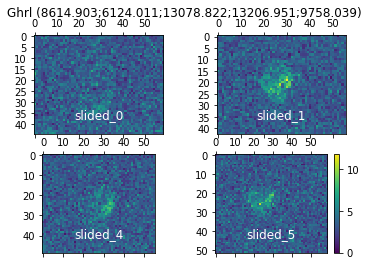

outer         clusterID              gene_ident    gene_mass  gene  protein_mass  \
88   slided_0_2_5  mass_6121_512798858971  6121.512799  Ghrl     6124.0109   
89   slided_0_2_5  mass_6123_021932072295  6123.021932  Ghrl     6124.0109   
91   slided_0_2_5  mass_6126_040198498944  6126.040198  Ghrl     6124.0109   
240  slided_0_2_5  mass_8613_091734057309  8613.091734  Ghrl     8614.9029   
242  slided_0_2_5  mass_8614_600867270634  8614.600867  Ghrl     8614.9029   
244  slided_0_2_5  mass_8616_110000483957  8616.110000  Ghrl     8614.9029   
245  slided_0_2_5   mass_8617_61913369728  8617.619134  Ghrl     8614.9029   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
88    0.721188  2.654183e-09  237   221  0.660654  0.514575     171      165   
89    0.532651  2.215081e-04  237   210  0.619275  0.434981     171      163   
91   -0.793181  2.195656e-11  237   234  1.336233  1.145902     171      161   
240   1.177858  3.974797e-18  237   223  0.720071

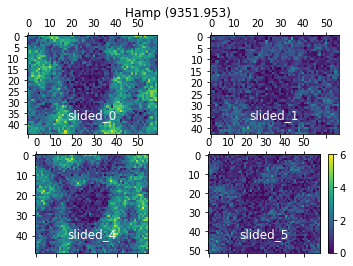

outer         clusterID              gene_ident    gene_mass  gene  protein_mass  \
342  slided_0_2_5  mass_9349_548742159543  9349.548742  Hamp     9351.9534   
344  slided_0_2_5  mass_9351_057875372868  9351.057875  Hamp     9351.9534   
347  slided_0_2_5  mass_9352_567008586193  9352.567009  Hamp     9351.9534   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
342  -0.615565  4.587307e-09  237   232  1.159548  1.112374     171      161   
344  -0.578171  4.691946e-08  237   233  1.142953  1.088222     171      161   
347  -0.529040  2.578676e-07  237   234  1.148340  1.050281     171      164   

      mean_bg  median_bg  
342  0.756806   0.751699  
344  0.765564   0.722661  
347  0.795818   0.730488  
inner Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
all                     clusterID              gene_ident    gene_mass  gen

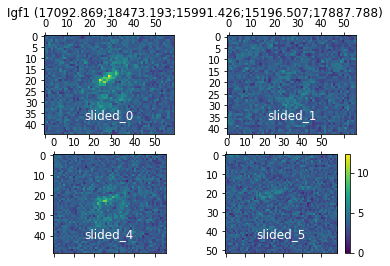

outer         clusterID               gene_ident     gene_mass  gene  protein_mass  \
700  slided_0_2_5  mass_15194_421677364367  15194.421677  Igf1    15196.5068   
703  slided_0_2_5   mass_15195_93081057769  15195.930811  Igf1    15196.5068   
711  slided_0_2_5  mass_15197_439943791014  15197.439944  Igf1    15196.5068   
716  slided_0_2_5   mass_15198_94907700434  15198.949077  Igf1    15196.5068   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
700  -0.572616  5.474473e-23  237   237  2.605039  2.527346     171      170   
703  -0.566764  1.242781e-22  237   237  2.659010  2.616152     171      170   
711  -0.535704  1.248280e-20  237   237  2.712438  2.694165     171      171   
716  -0.517954  1.533604e-19  237   237  2.734036  2.712358     171      171   

      mean_bg  median_bg  
700  1.751618   1.691763  
703  1.795177   1.780900  
711  1.871099   1.850768  
716  1.909347   1.900059  
inner              clusterID               gene_ident    

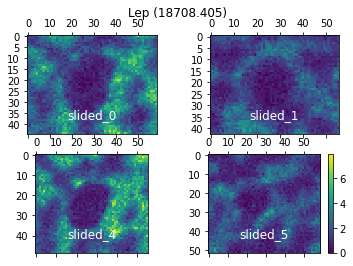

outer         clusterID               gene_ident     gene_mass gene  protein_mass  \
956  slided_0_2_5  mass_18706_174664769896  18706.174665  Lep    18708.4055   
957  slided_0_2_5   mass_18707_68379798322  18707.683798  Lep    18708.4055   
963  slided_0_2_5  mass_18709_192931196547  18709.192931  Lep    18708.4055   
967  slided_0_2_5   mass_18710_70206440987  18710.702064  Lep    18708.4055   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
956  -0.919313  1.945218e-18  237   237  1.377107  1.113972     171      168   
957  -0.873869  1.226516e-17  237   237  1.332002  1.052657     171      168   
963  -0.829334  6.442128e-17  237   237  1.286092  1.043444     171      169   
967  -0.791288  3.427786e-16  237   237  1.223284  1.014731     171      170   

      mean_bg  median_bg  
956  0.728159   0.685475  
957  0.726849   0.676992  
963  0.723798   0.669496  
967  0.706848   0.664554  
inner Empty DataFrame
Columns: [clusterID, gene_ident, gene_ma

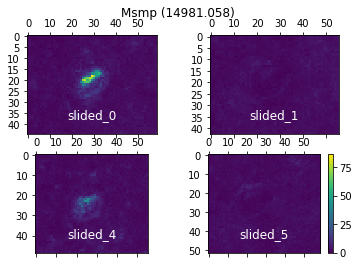

outer         clusterID               gene_ident     gene_mass  gene  protein_mass  \
621  slided_0_2_5  mass_14978_615627858999  14978.615628  Msmp    14981.0579   
623  slided_0_2_5  mass_14980_124761072322  14980.124761  Msmp    14981.0579   
625  slided_0_2_5  mass_14981_633894285647  14981.633894  Msmp    14981.0579   
627  slided_0_2_5   mass_14983_14302749897  14983.143027  Msmp    14981.0579   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
621  -1.092814  3.657327e-26  237   237  4.257897  3.391027     171      171   
623  -1.065577  4.555060e-25  237   237  4.450838  3.562186     171      171   
625  -1.015477  2.770577e-23  237   237  4.478722  3.567705     171      171   
627  -0.955037  1.350697e-21  237   237  4.290387  3.503992     171      171   

      mean_bg  median_bg  
621  1.996297   1.794334  
623  2.126528   1.933375  
625  2.215468   2.050802  
627  2.213104   2.060607  
inner             clusterID               gene_ident     

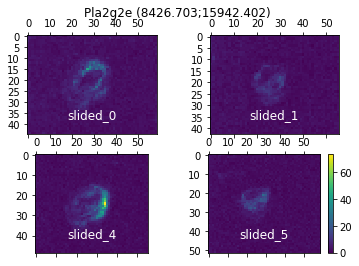

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner             clusterID              gene_ident    gene_mass     gene  \
203  slided_0_1_3_4_6  mass_8424_450082391777  8424.450082  Pla2g2e   
204  slided_0_1_3_4_6  mass_8425_959215605102  8425.959216  Pla2g2e   
206  slided_0_1_3_4_6  mass_8427_468348818427  8427.468349  Pla2g2e   
211  slided_0_1_3_4_6   mass_8428_97748203175  8428.977482  Pla2g2e   

     protein_mass  avg_logFC        qvalue  num  anum       mean    median  \
203     8426.7026  -0.644658  5.676020e-07  168   168  11.433812  8.832082   
204     8426.7026  -0.646057  4.592259e-07  168   168   9.436259  7.191807   
206     8426.7026  -0.695543  3.831166e-08  168   168   8.727208  6.760948   
211     8426.7026  -0.758279  1.079071e-09  168   168   8.994701  7.219791   

     num_bg  anum_bg   mean_bg  median_bg  
203     149      148  7.31

In [247]:
for gene in sorted(relgenes):
    
    print(gene)
    #_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein(gene.capitalize()), scaled=False)
    _ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein(gene.capitalize()), scaled=True, title=gene.capitalize() + " ({mz})")
    
    for rde, rdf in [('outer', mydf_outer), ("inner", mydf_inner), ("all", mydf_all)]:
        print(rde, rdf.loc[rdf.gene == gene.capitalize()])